### Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

### Load Data

In [2]:
train_data = pd.read_csv("../data/cleaned_train.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   object 
 18  YearRemo

In [4]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0   1          60       RL         65.0     8450   NaN      Reg         Lvl   
1   2          20       RL         80.0     9600   NaN      Reg         Lvl   
2   3          60       RL         68.0    11250   NaN      IR1         Lvl   
3   4          70       RL         60.0     9550   NaN      IR1         Lvl   
4   5          60       RL         84.0    14260   NaN      IR1         Lvl   

  LotConfig LandSlope  ... ScreenPorch PoolArea Fence MiscFeature MiscVal  \
0    Inside       Gtl  ...           0        0   NaN         NaN       0   
1       FR2       Gtl  ...           0        0   NaN         NaN       0   
2    Inside       Gtl  ...           0        0   NaN         NaN       0   
3    Corner       Gtl  ...           0        0   NaN         NaN       0   
4       FR2       Gtl  ...           0        0   NaN         NaN       0   

   MoSold      YrSold SaleType SaleCondition SalePrice  
0       2  2008-01-01       WD        Normal    208500  
1       5  2007-01-01       WD        Normal    181500  
2       9  2008-01-01       WD        Normal    223500  
3       2  2006-01-01       WD       Abnorml    140000  
4      12  2008-01-01       WD        Normal    250000  

[5 rows x 78 columns]

### Handling Missing Values

In [5]:
#checking for missing values
missing_values = train_data.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageFinish      81
GarageYrBlt       81
GarageQual        81
GarageCond        81
GarageType        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


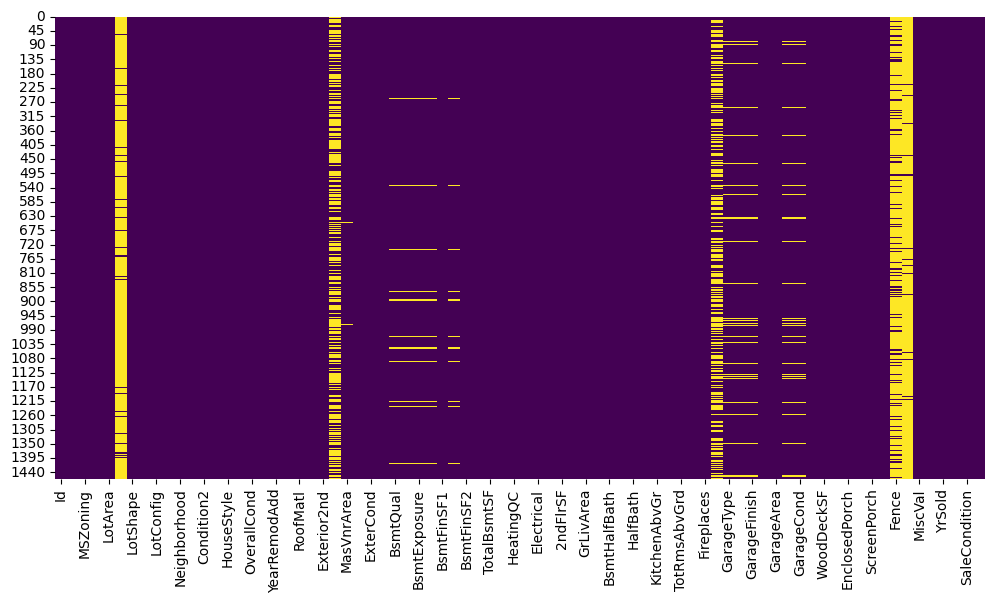

In [6]:
#visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.show()

The visualization above makes it clear that there are features within the dataset that are missing most of their values. The appropriate action to take here is to impute the missing values according to whether the feature is categorical or numerical. A numerical feature such as 'MasVnrArea' will me imputed with the median of the feature column.

In [7]:
#imputing missing values - dimensionality reduction will occur in preprocessing while features likely to be reduced will be noticed here
##categorical features
fill_values = {
    'MiscFeature':'None',
    'Alley':'None',
    'Fence':'None',
    'MasVnrType':'None',
    'FireplaceQu':'None',
    'GarageFinish':'None',
    'GarageQual':'None',
    'GarageCond':'None',
    'GarageType':'None',
    'BsmtExposure':'None',
    'BsmtFinType2':'None',
    'BsmtFinType1':'None',
    'BsmtCond':'None',
    'BsmtQual':'None',
    'Electrical': train_data['Electrical'].mode()[0]
}
train_data.fillna(value=fill_values, inplace=True)

##numerical features
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median(), inplace=True)
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median(), inplace=True)

C:\Users\aless\AppData\Local\Temp\ipykernel_21704\3802198114.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median(), inplace=True)
C:\Users\aless\AppData\Local\Temp\ipykernel_21704\3802198114.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [8]:
#rechecking for missing values
missing_values = train_data.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

Series([], dtype: int64)


### Univariate Analysis

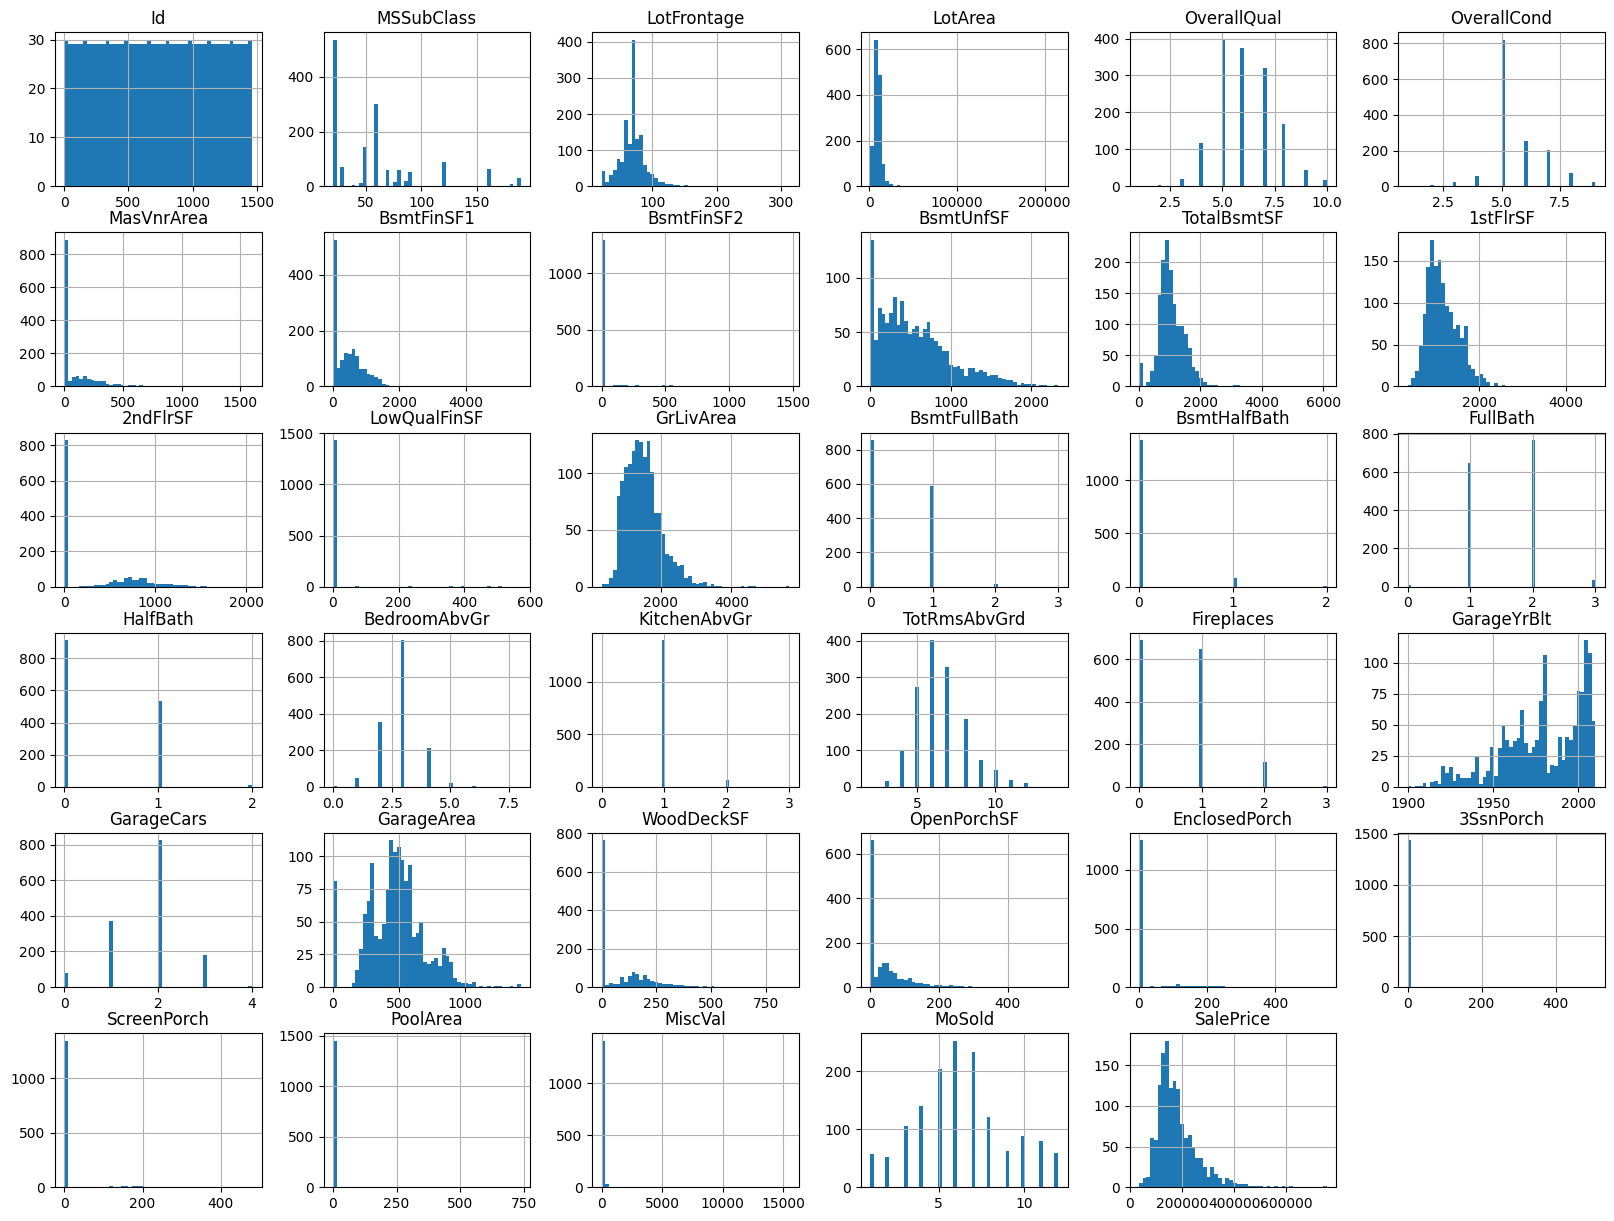

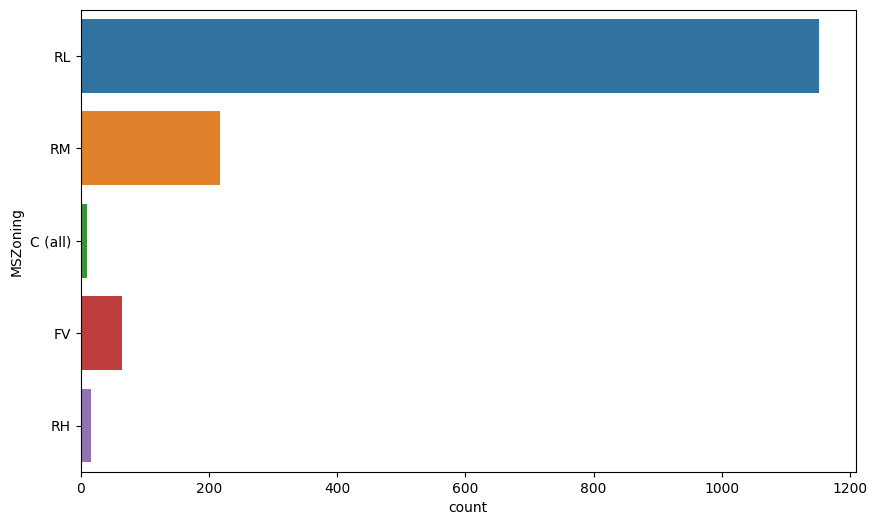

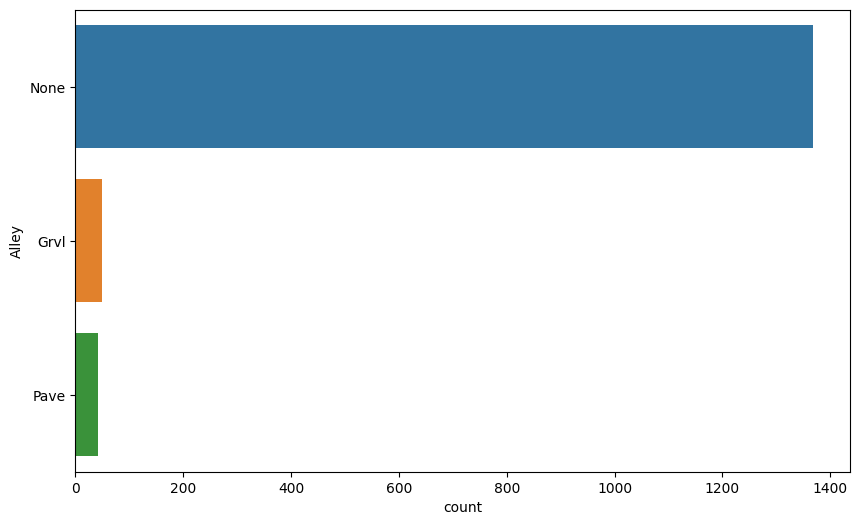

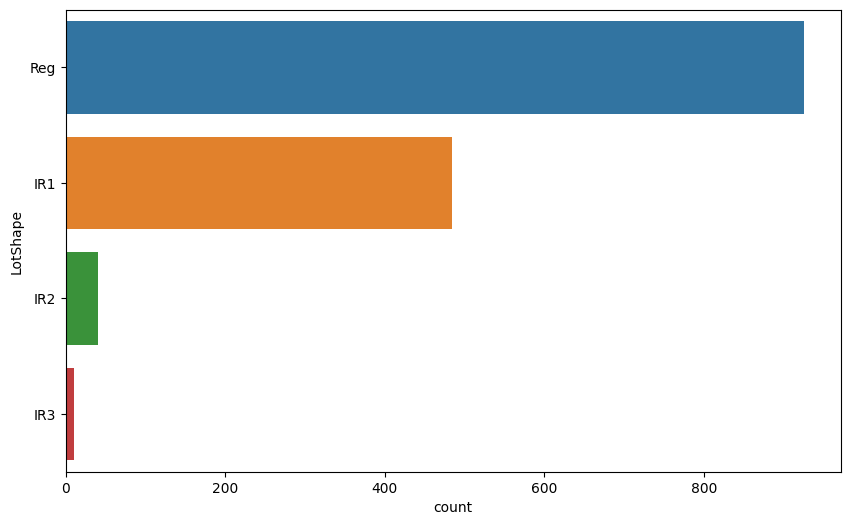

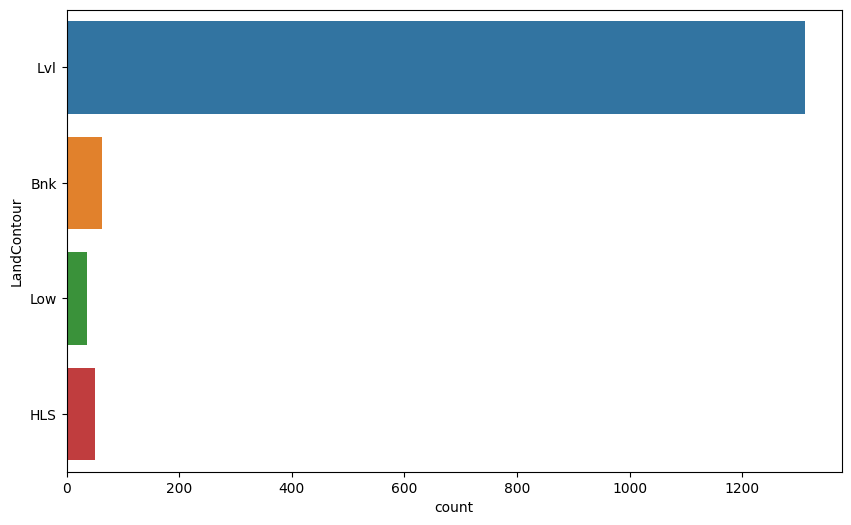

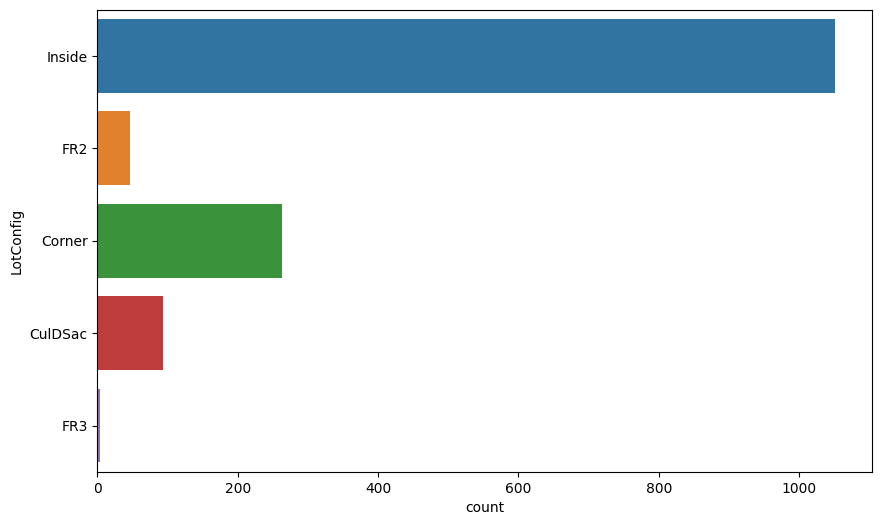

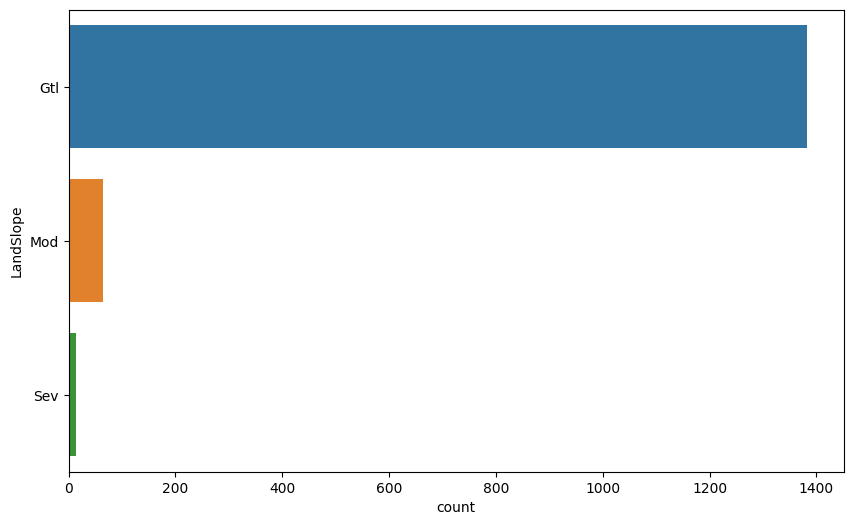

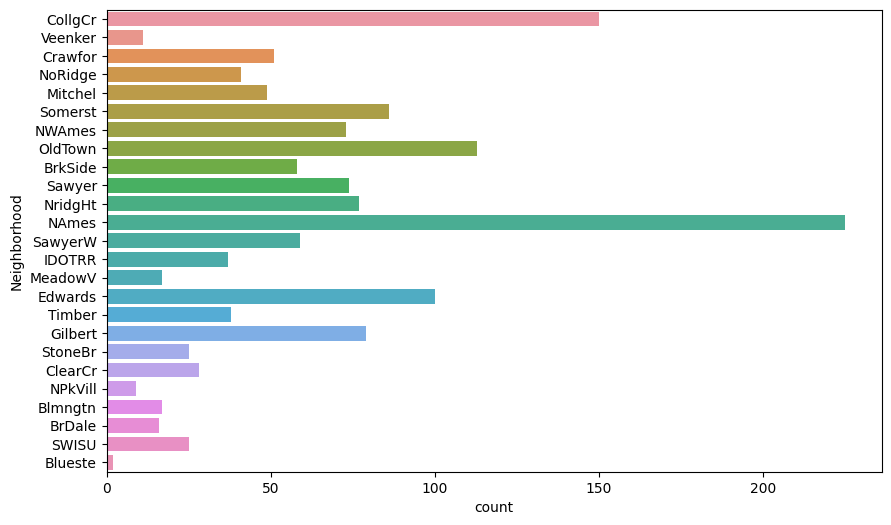

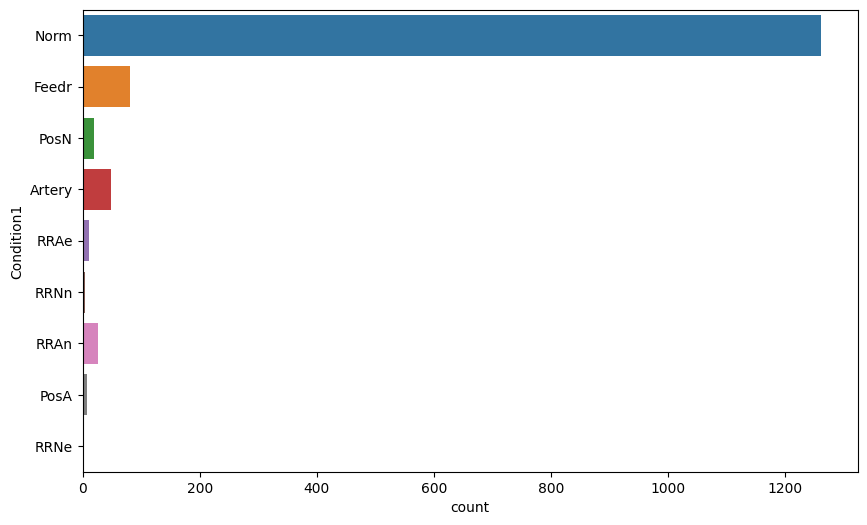

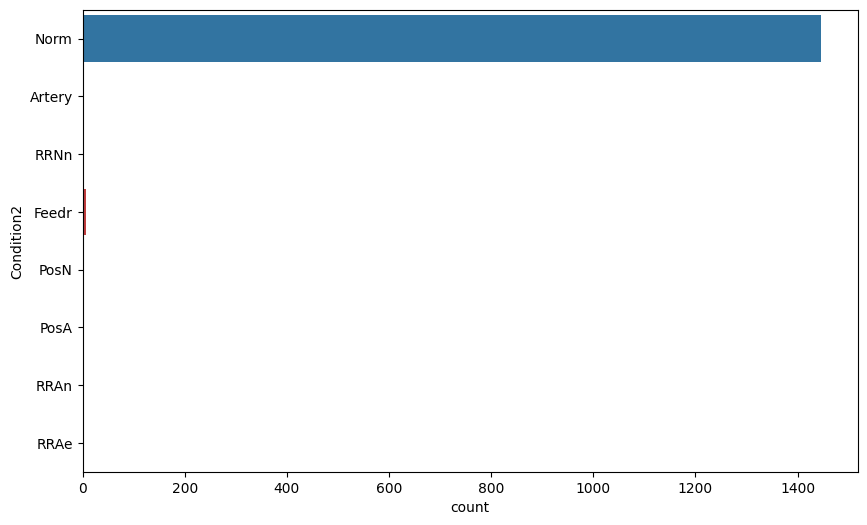

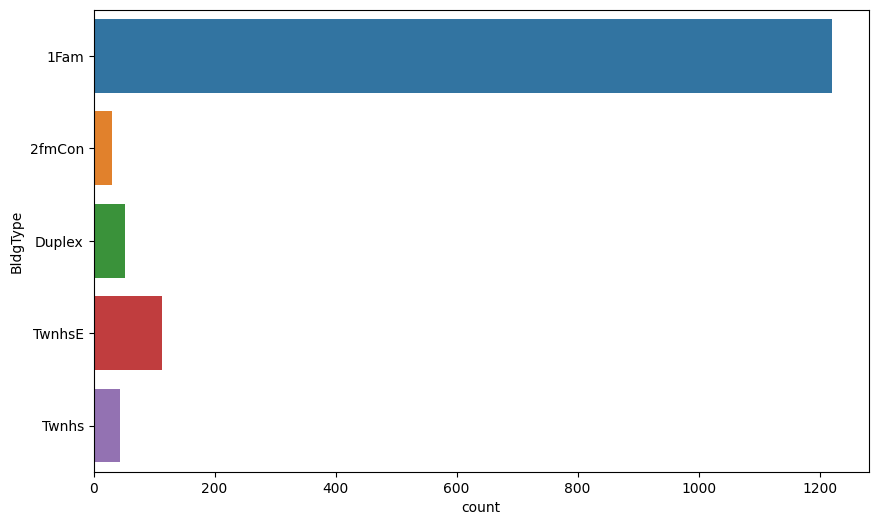

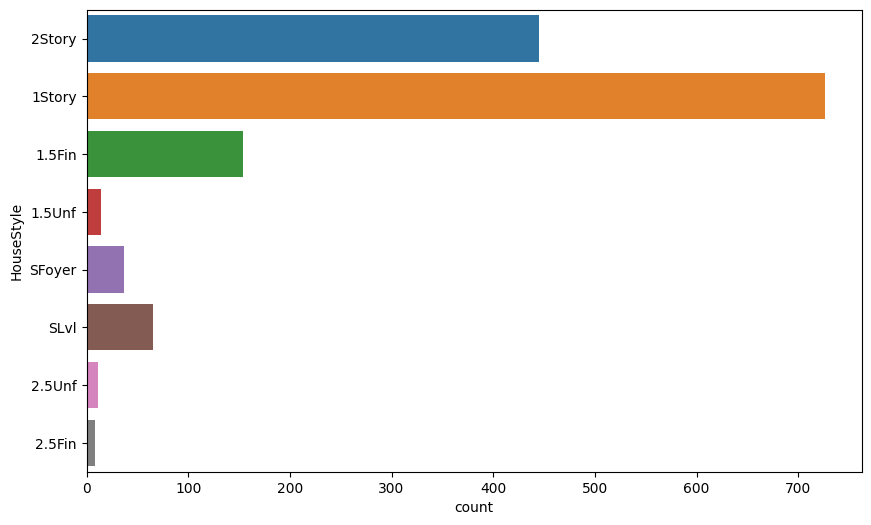

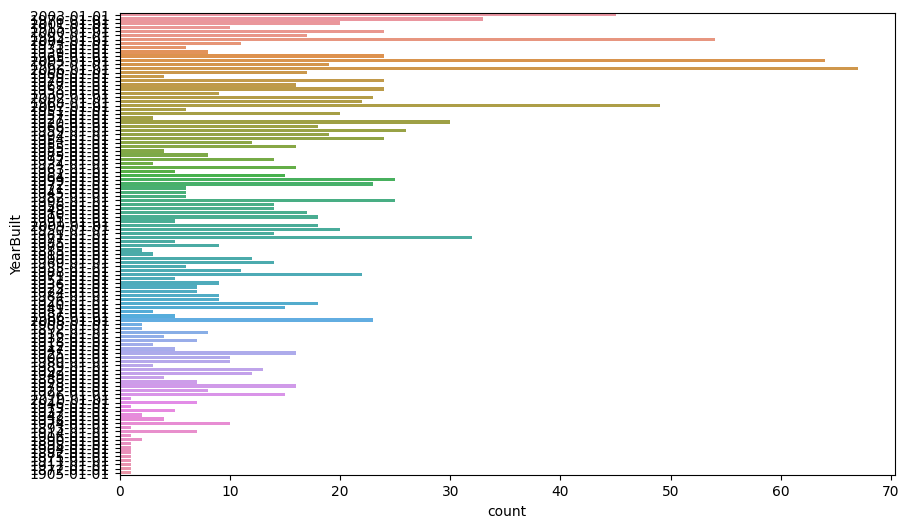

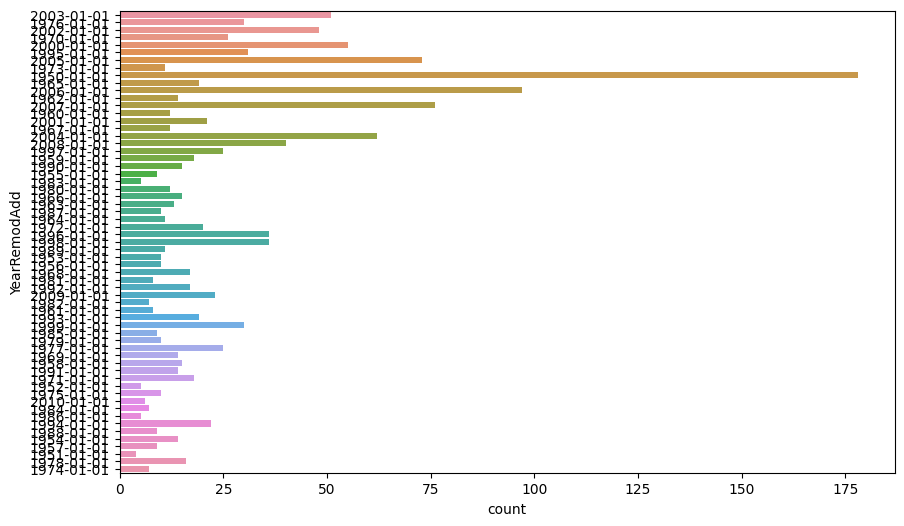

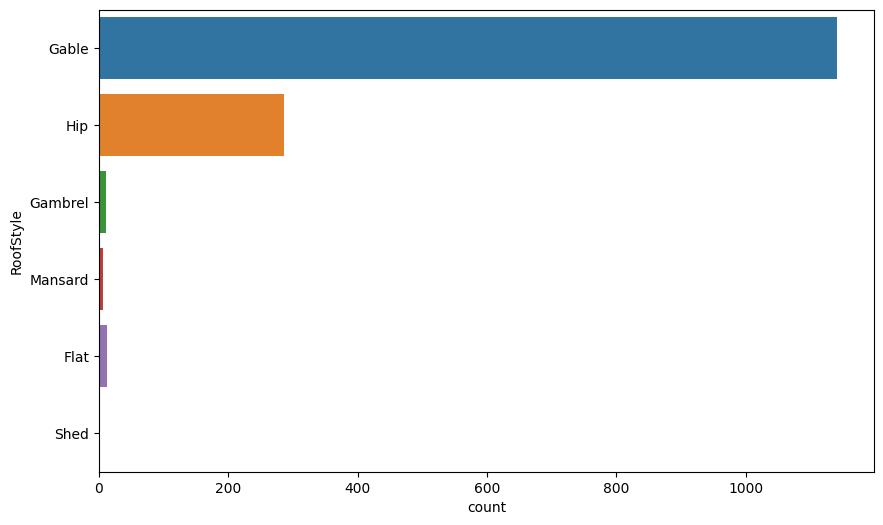

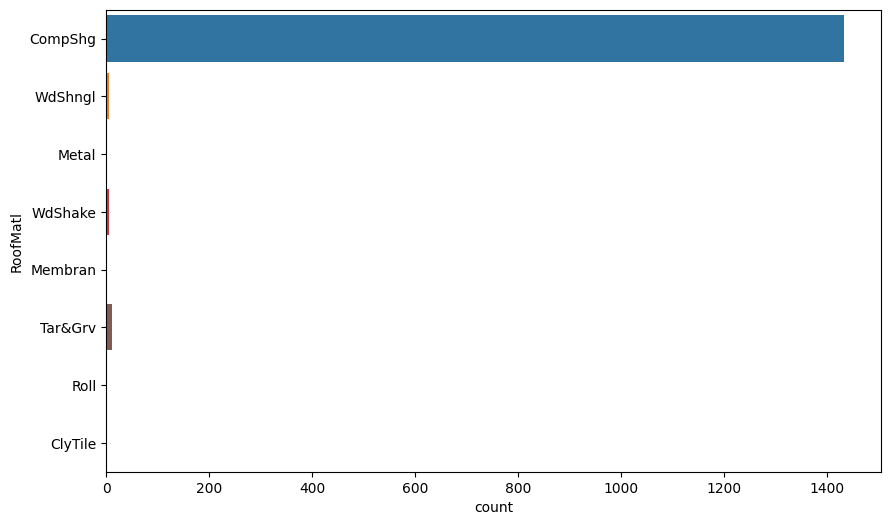

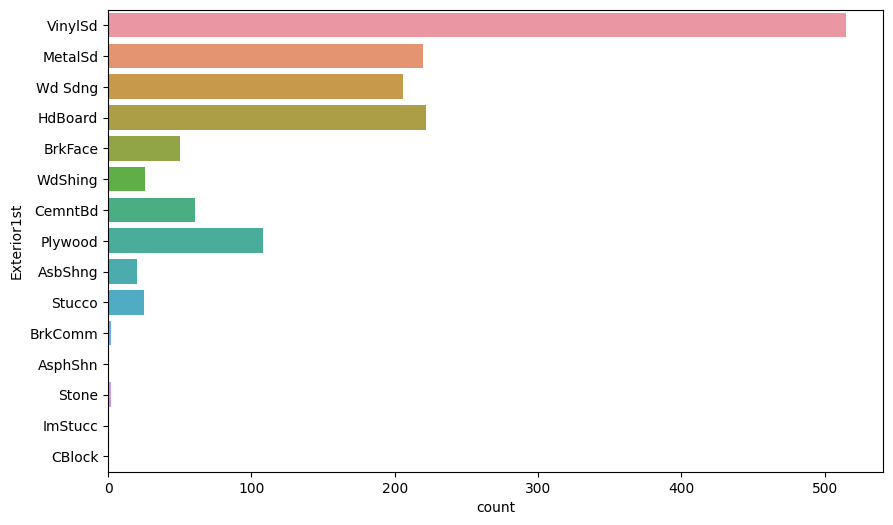

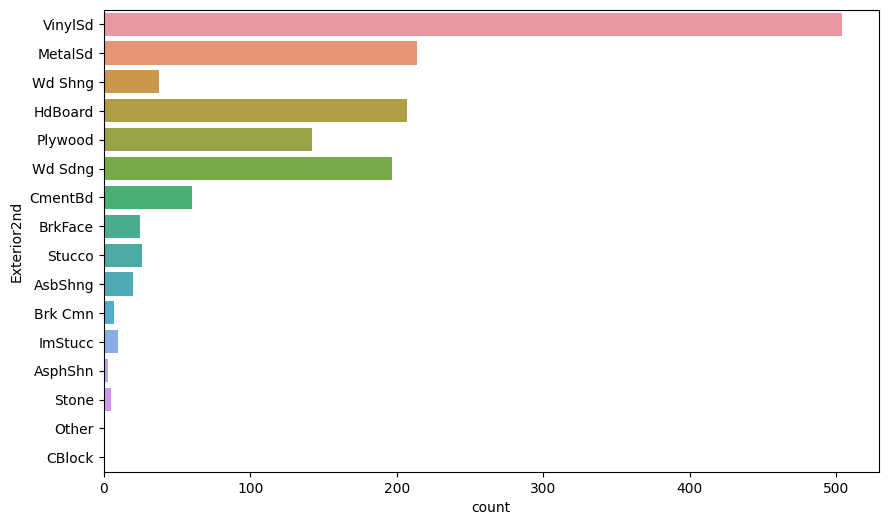

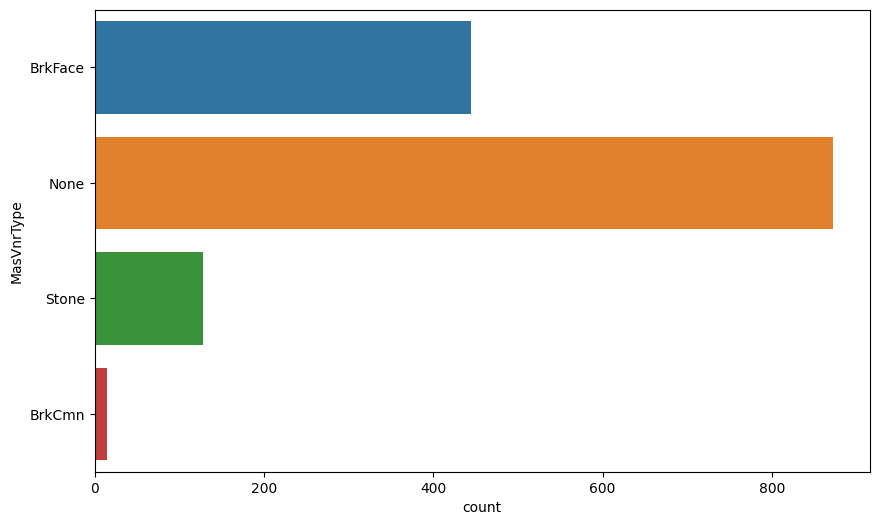

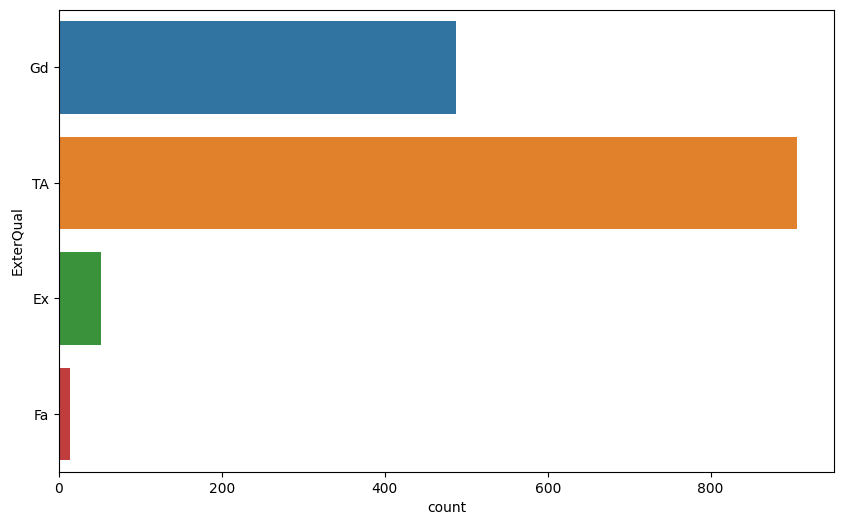

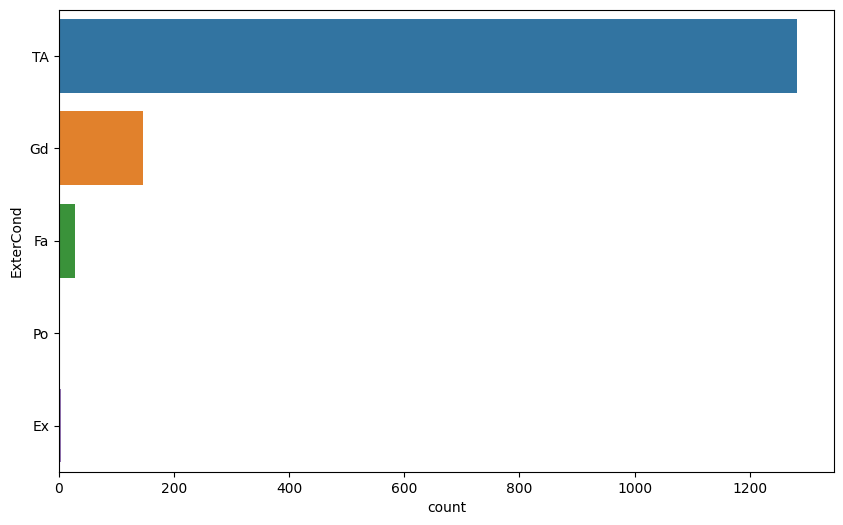

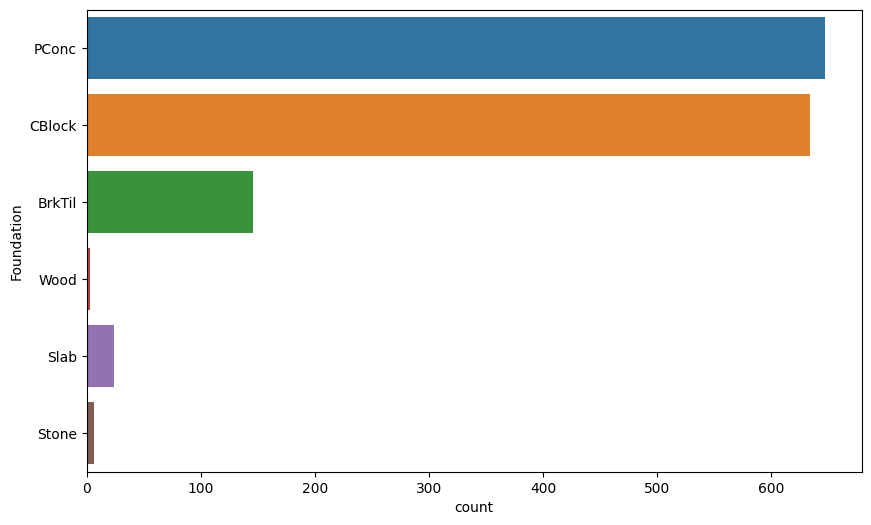

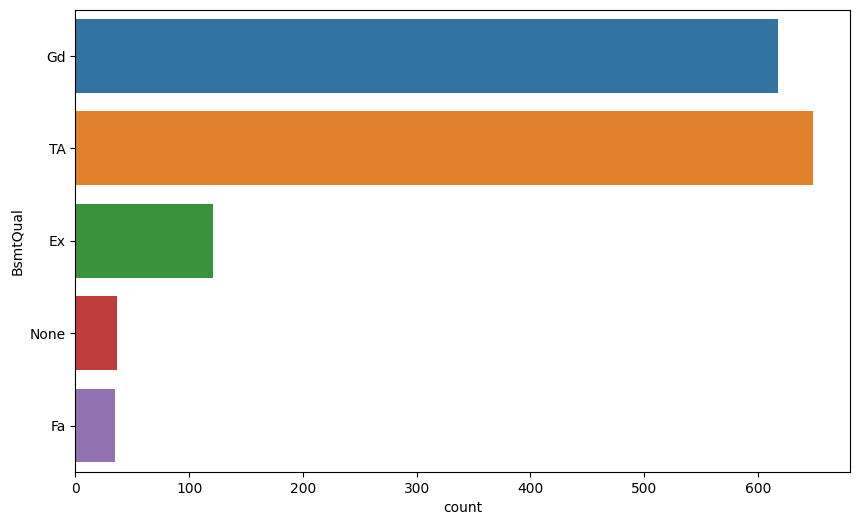

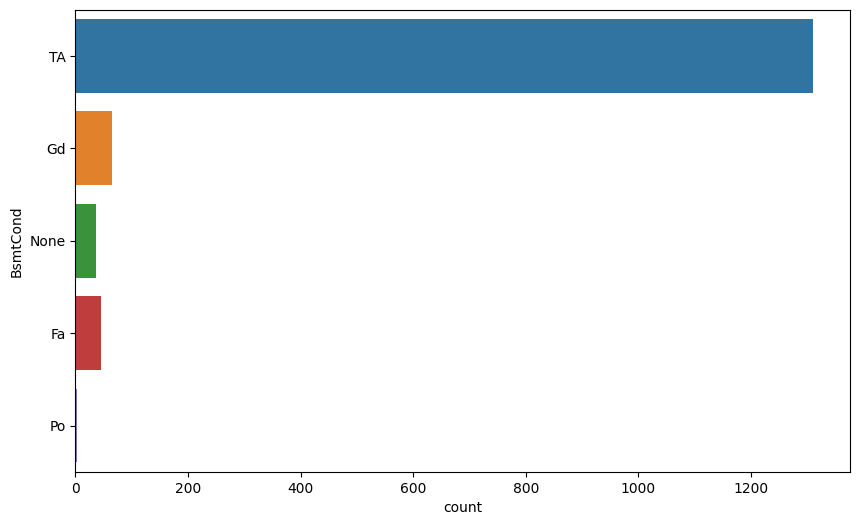

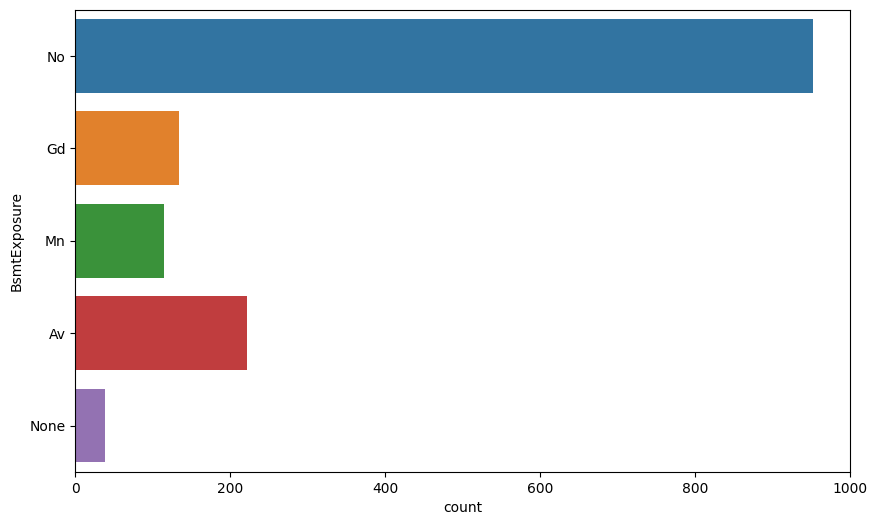

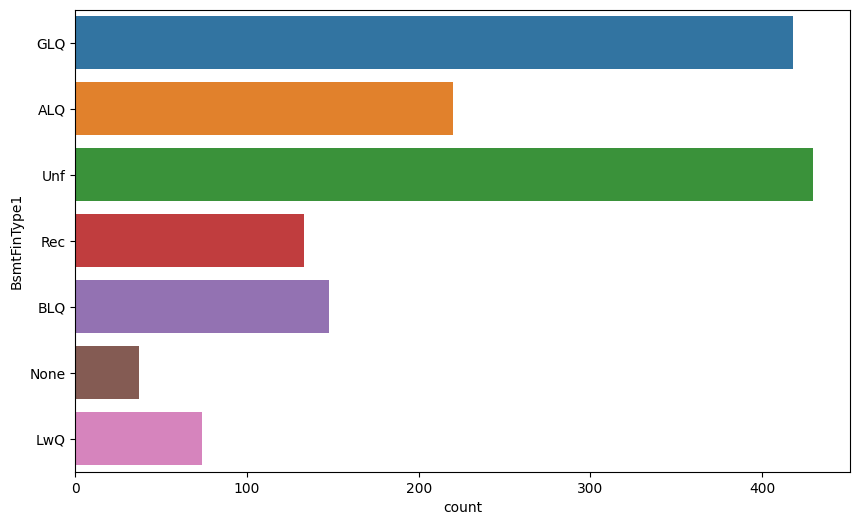

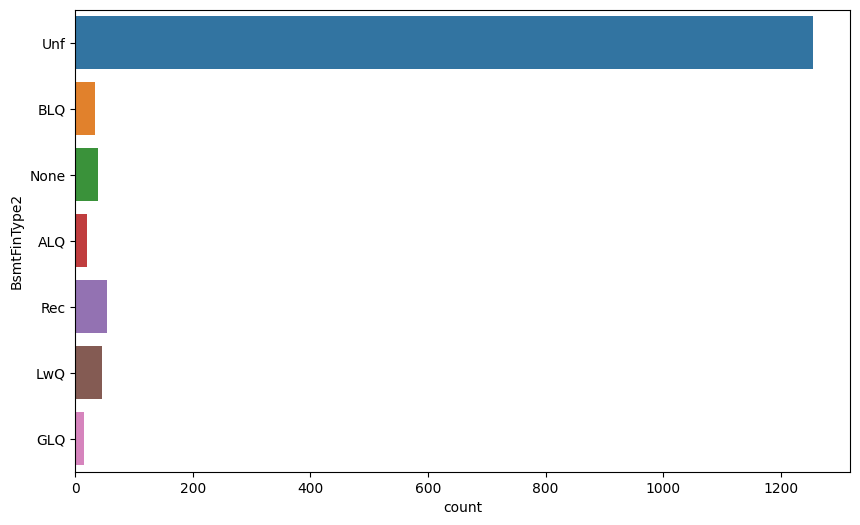

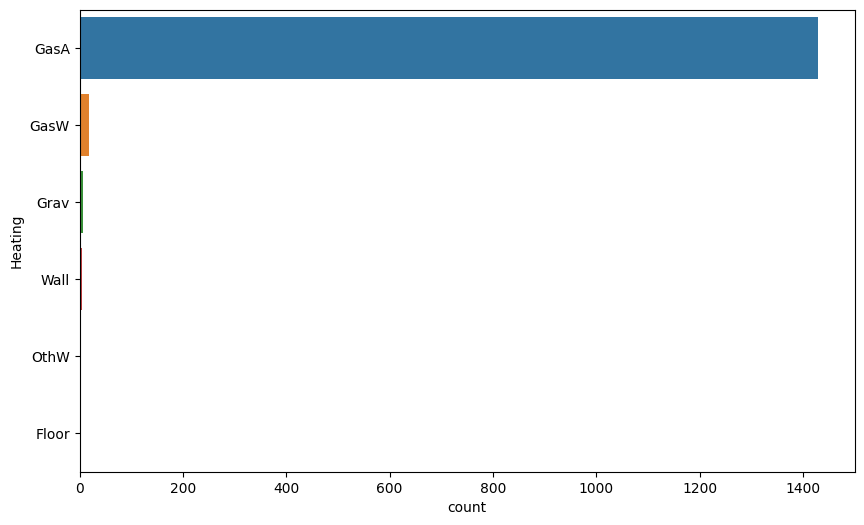

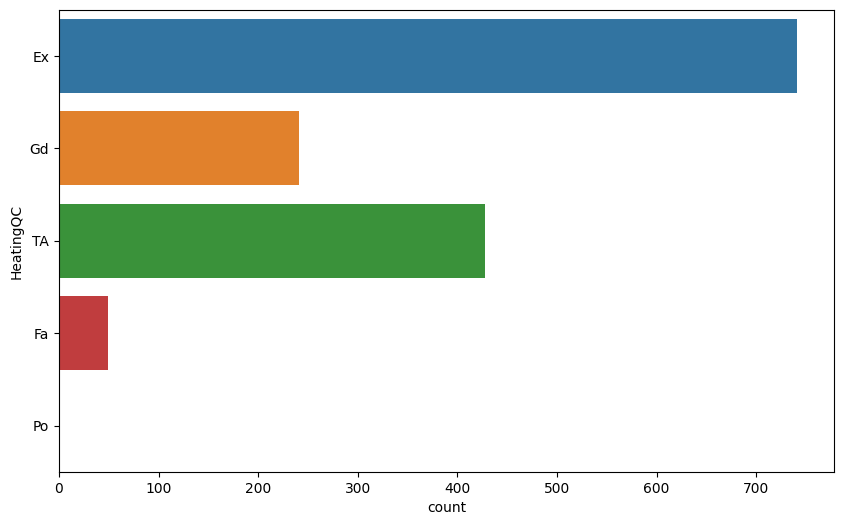

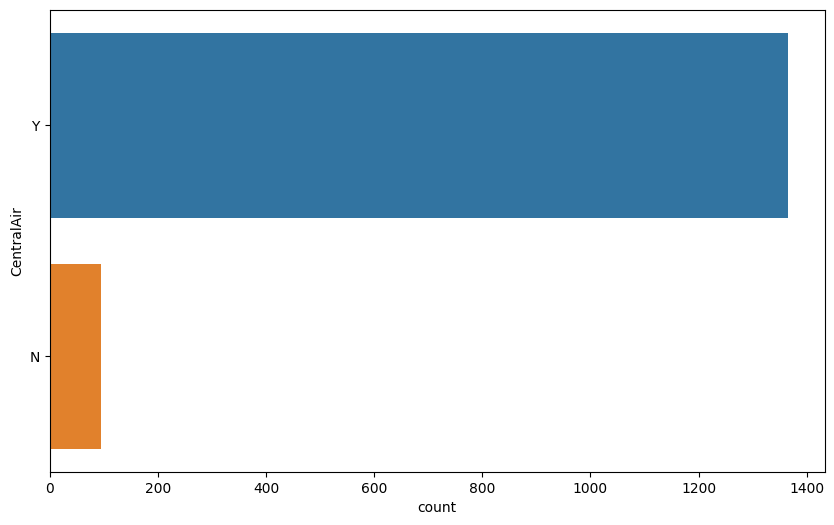

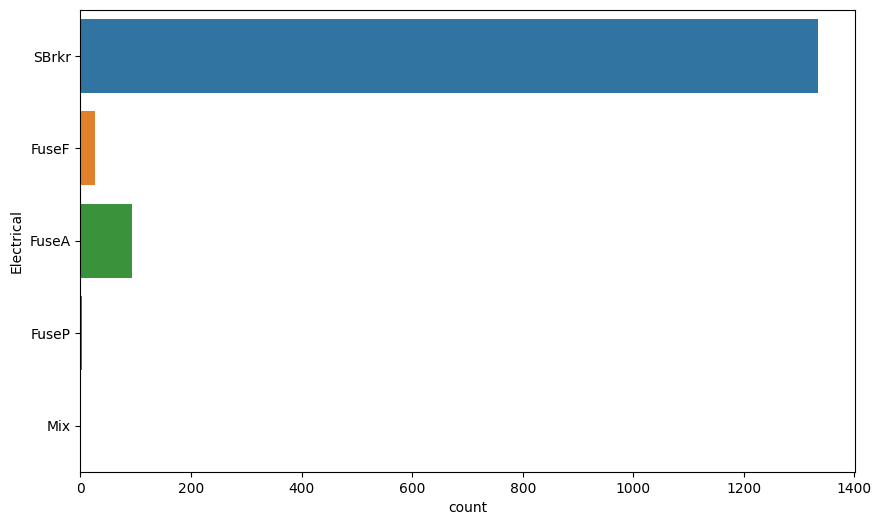

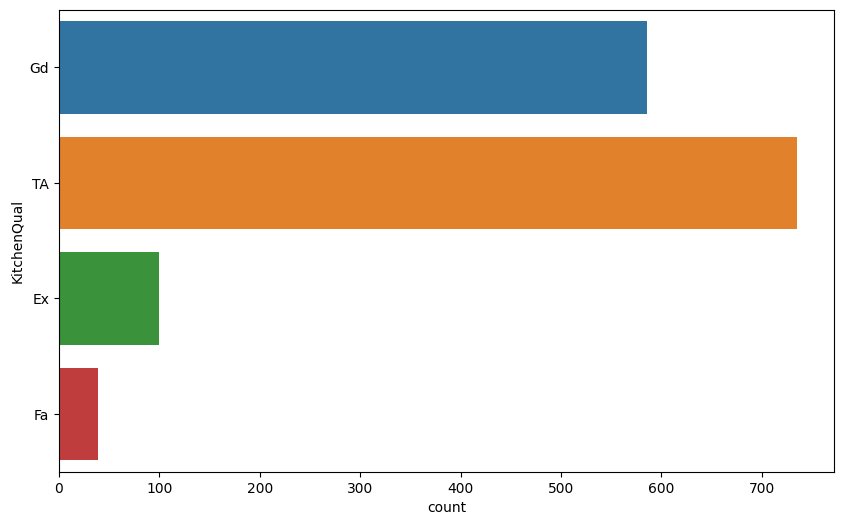

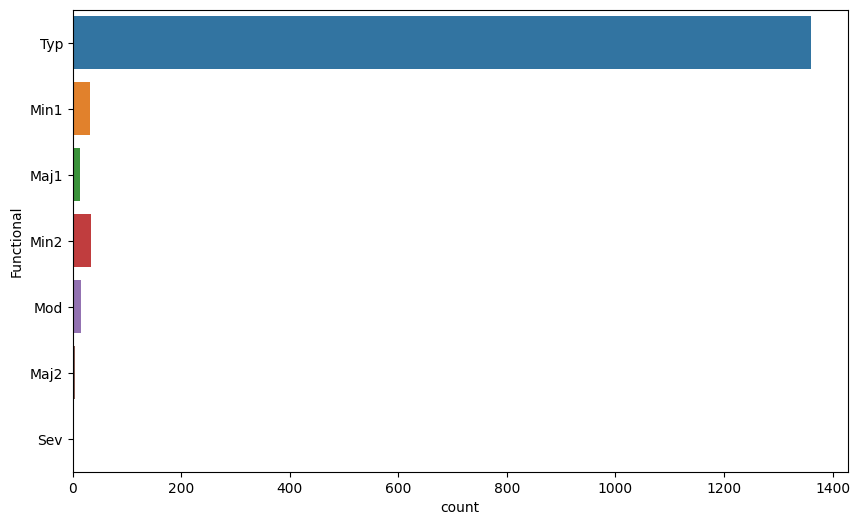

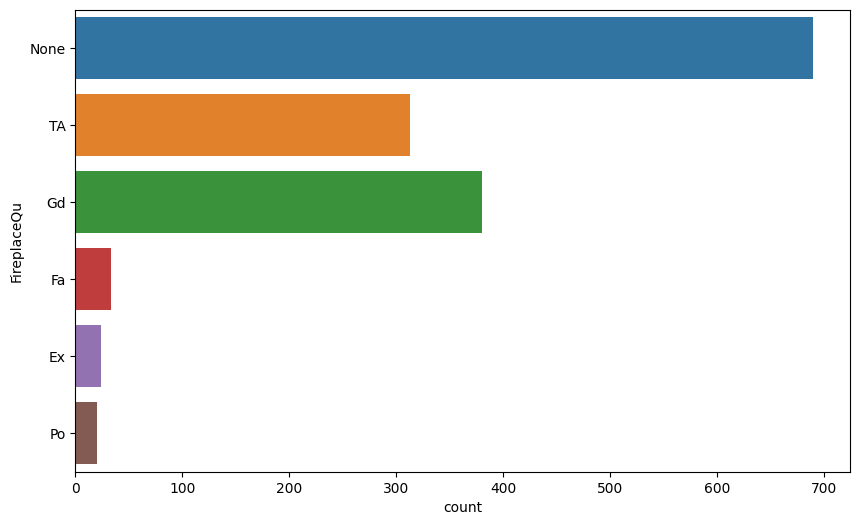

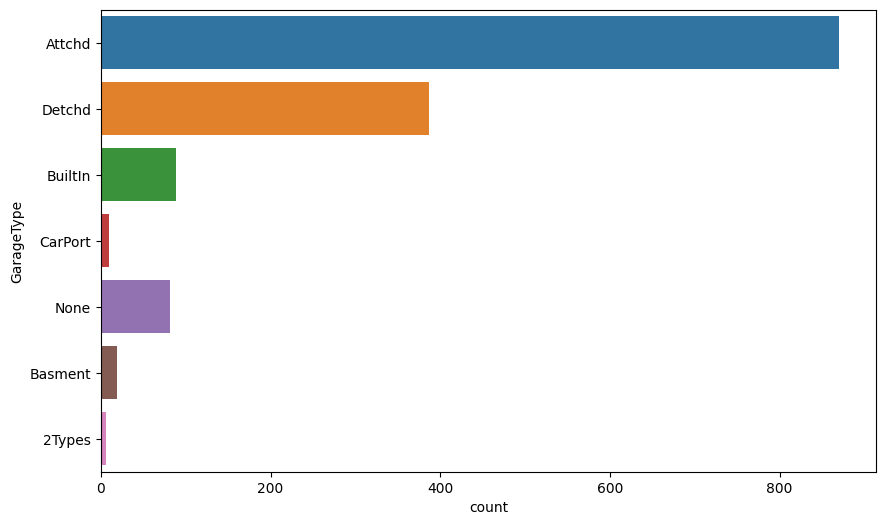

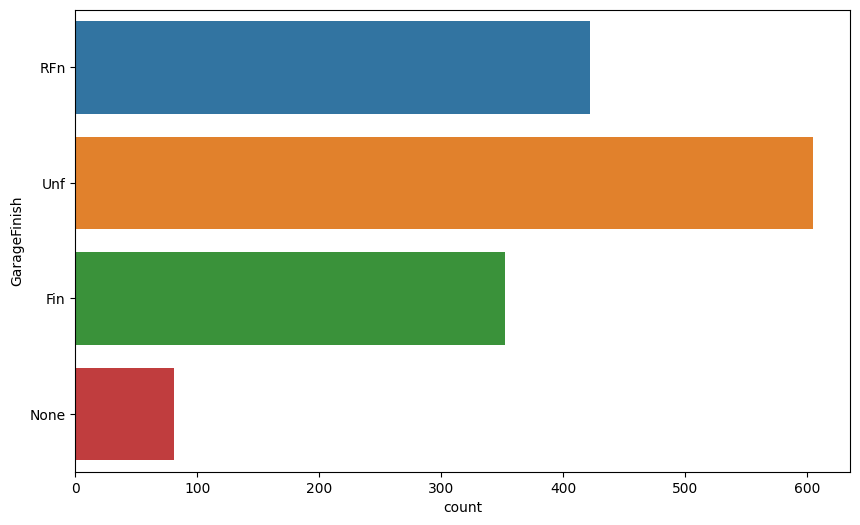

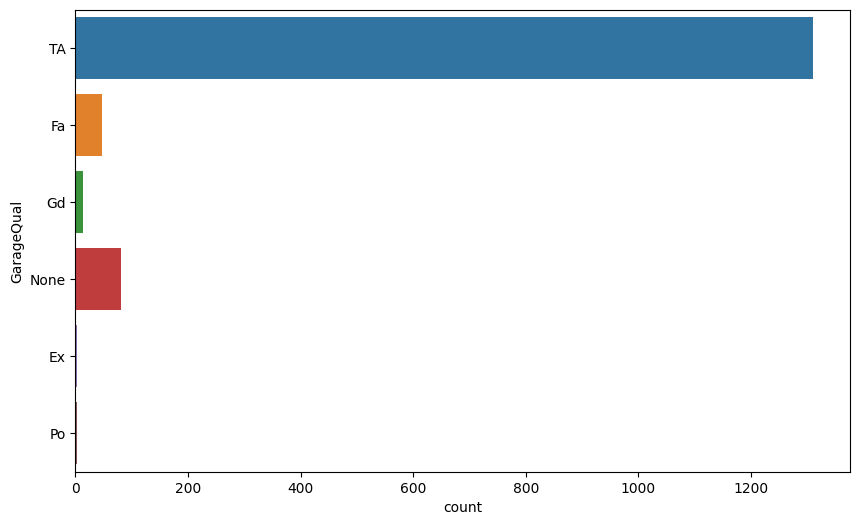

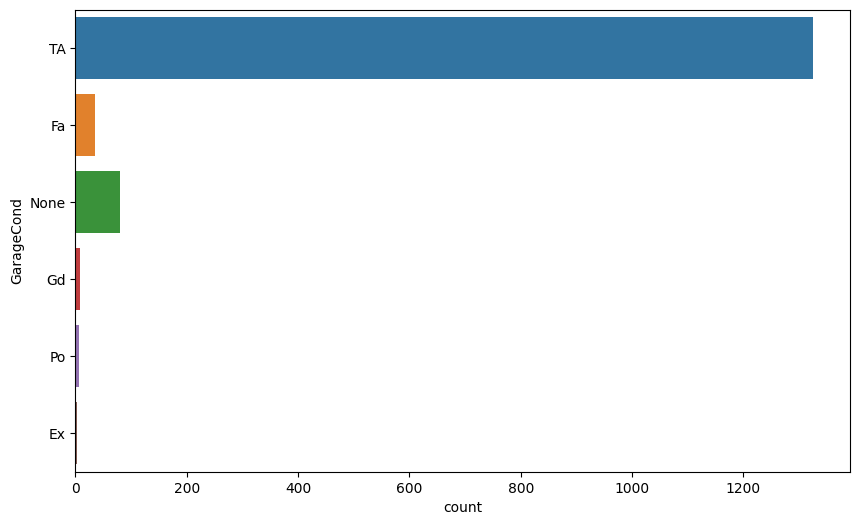

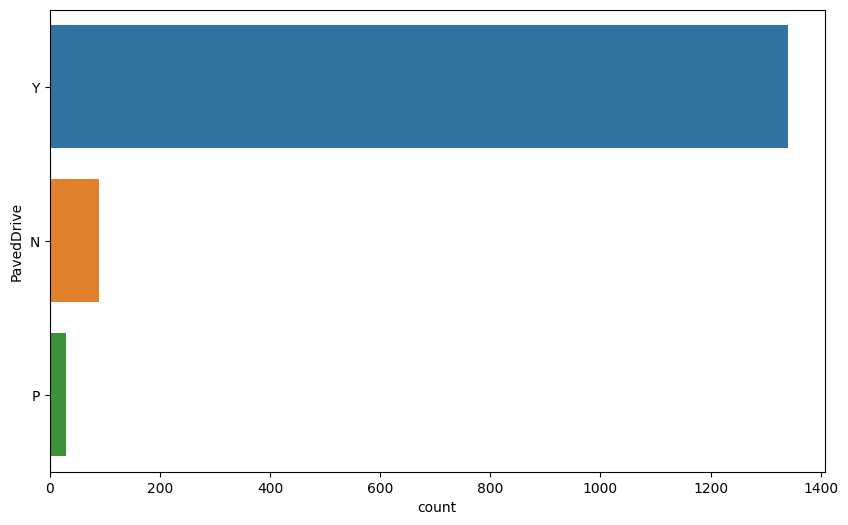

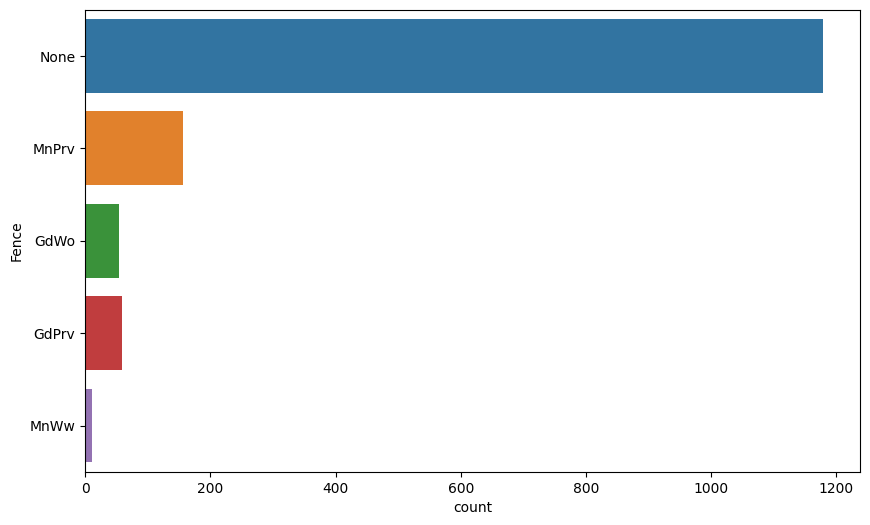

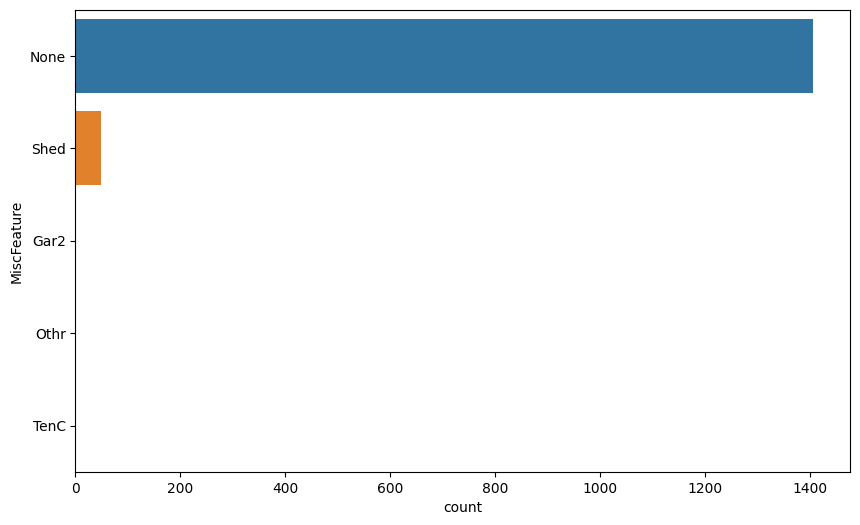

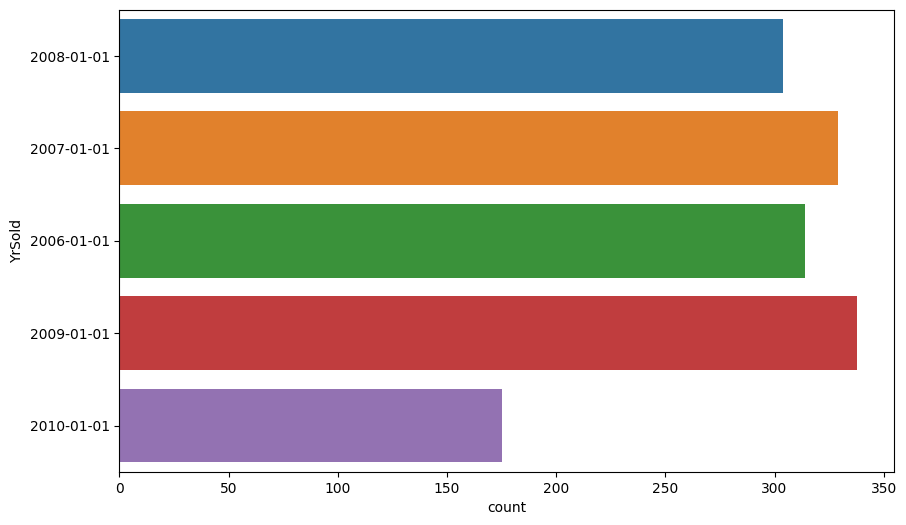

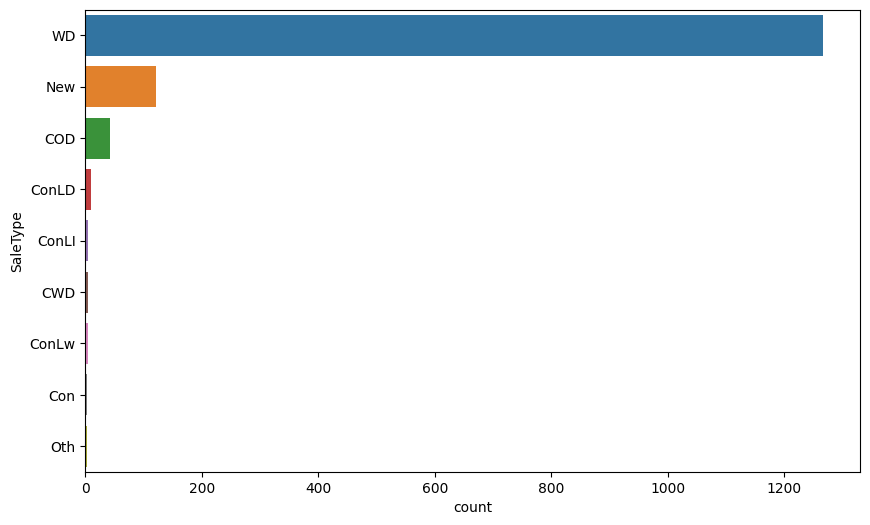

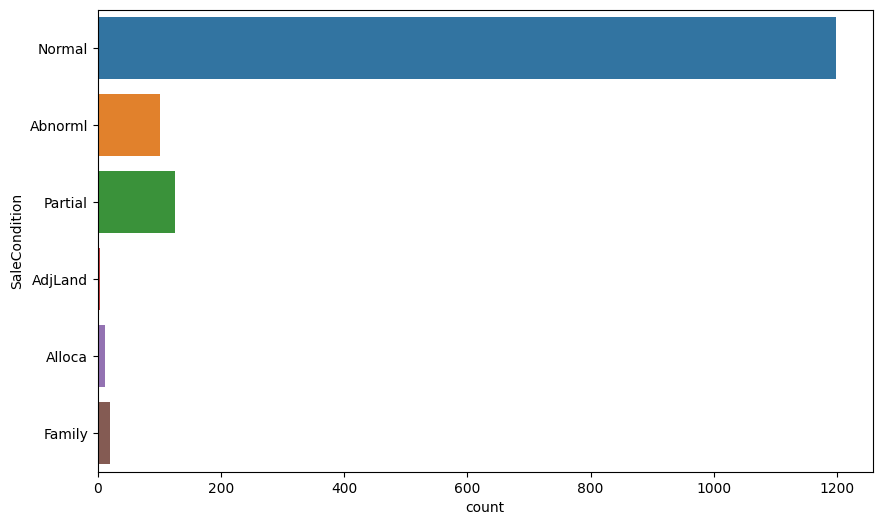

In [9]:
#numerical features
train_data.hist(bins=50, figsize=(20, 15))
plt.show()

#categorical features
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=train_data)
    plt.show()

The plethora of visualizations above is the product of conducting a univariate analyis that uses histograms and barplots to visualize the distributions of single features. The subplotted histograms display the frequency distribution among the numerical features in the data which is useful for identifying any outliers in the data. As for the categorical features being represented by the bar plots, this is also helpful for observing the distributions and getting an idea of which features have overwhelming focus on a specific value. A good example of this is the barplot for 'BldgType' which confirms to us that most of the properties in the dataset are indeed single-family homes.

### Bivariate Analysis

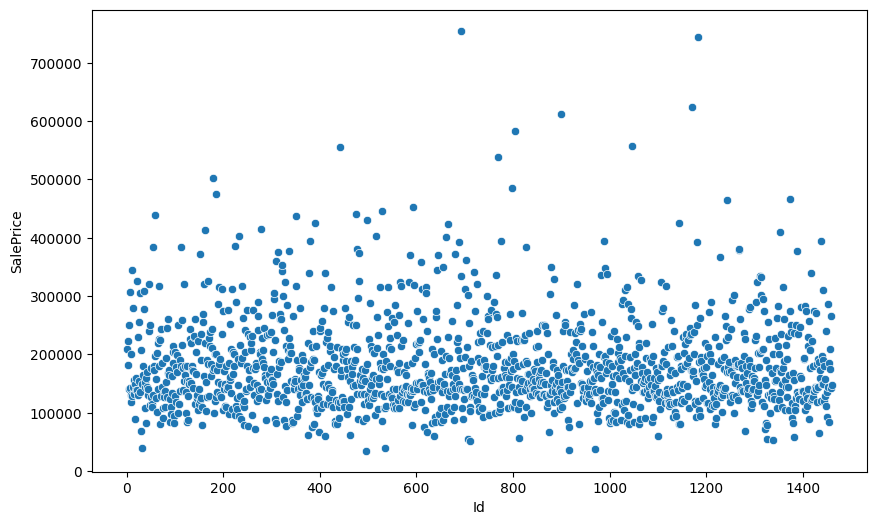

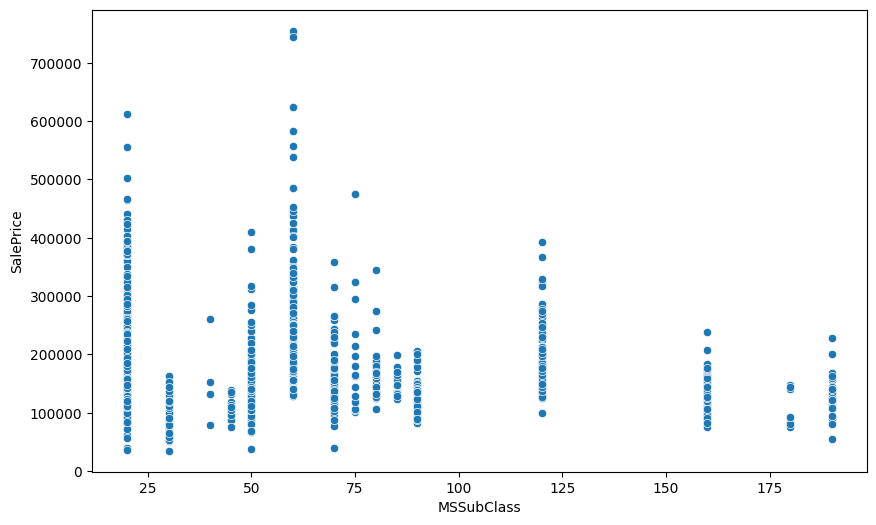

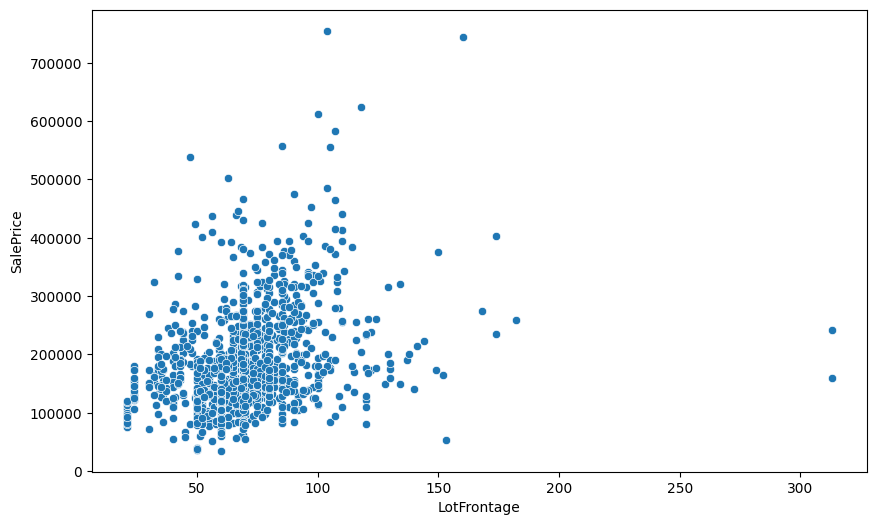

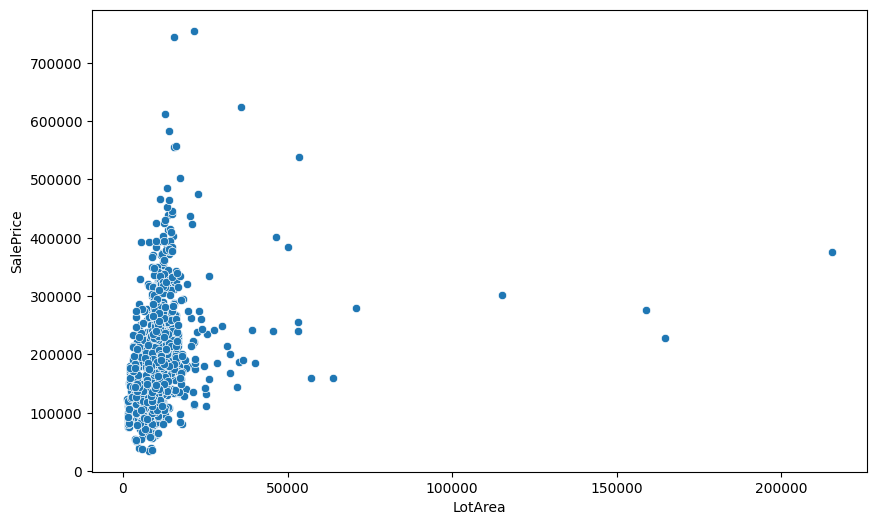

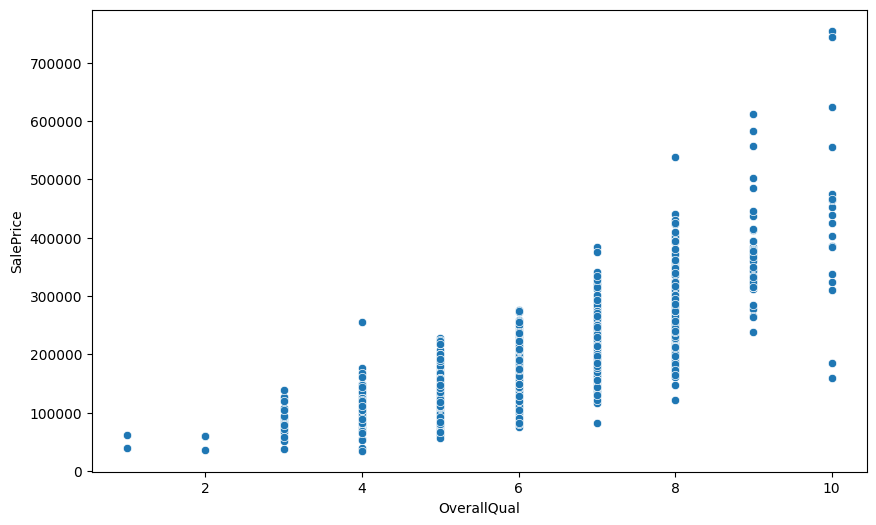

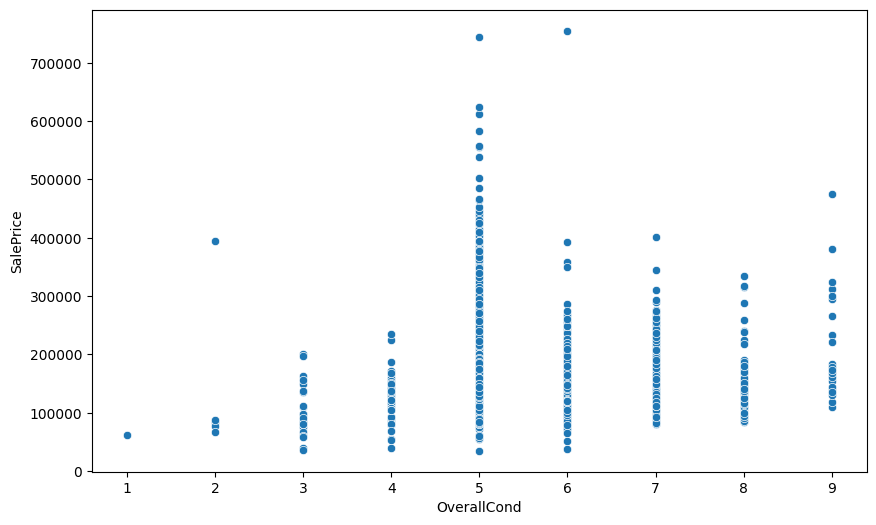

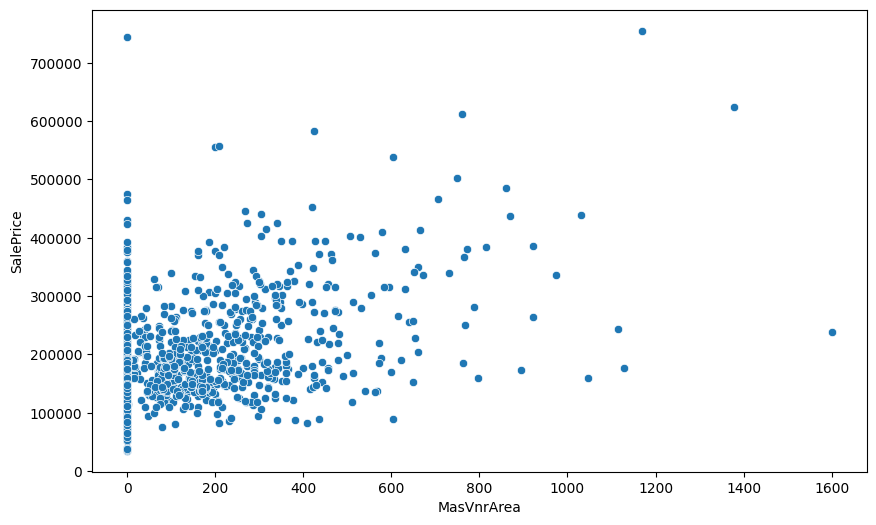

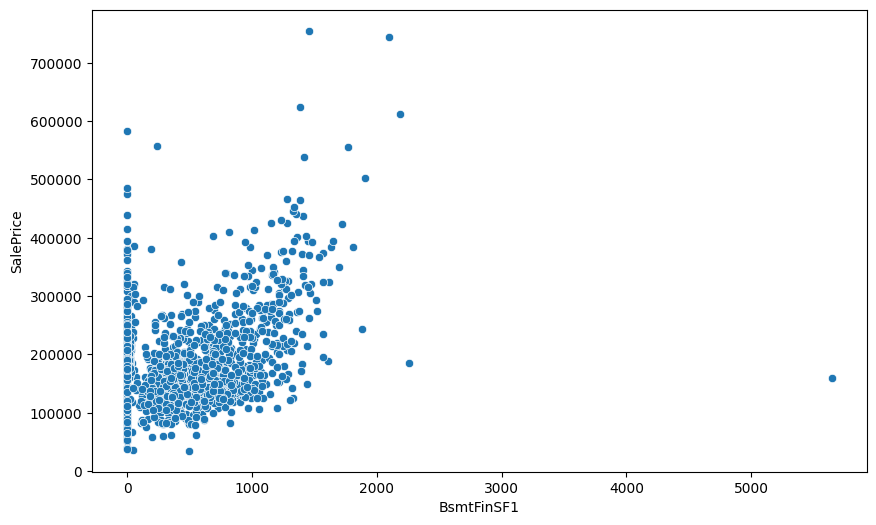

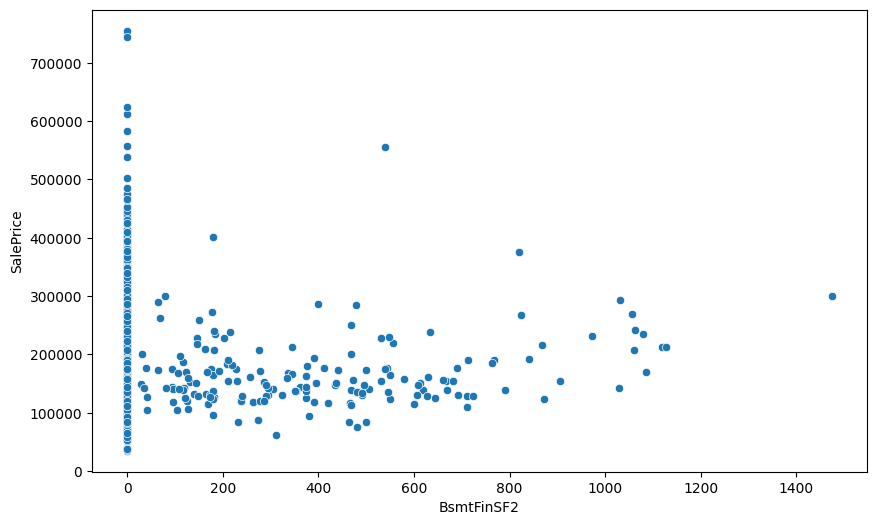

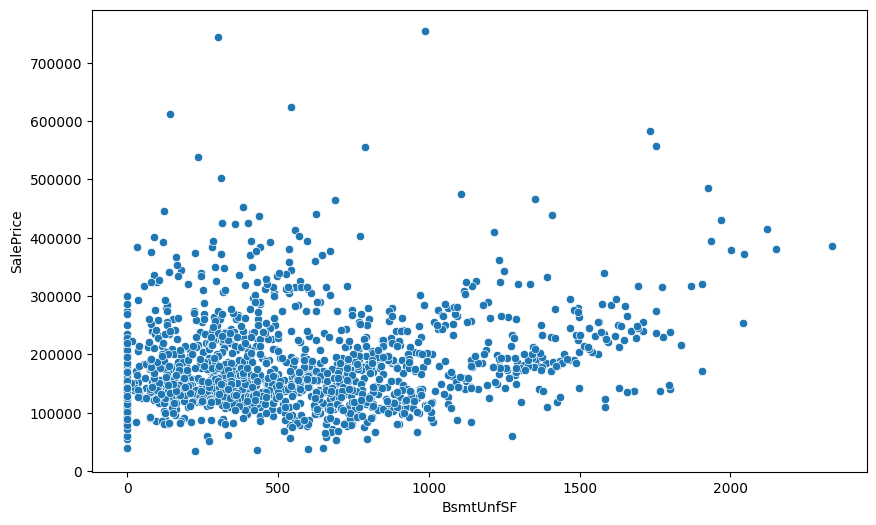

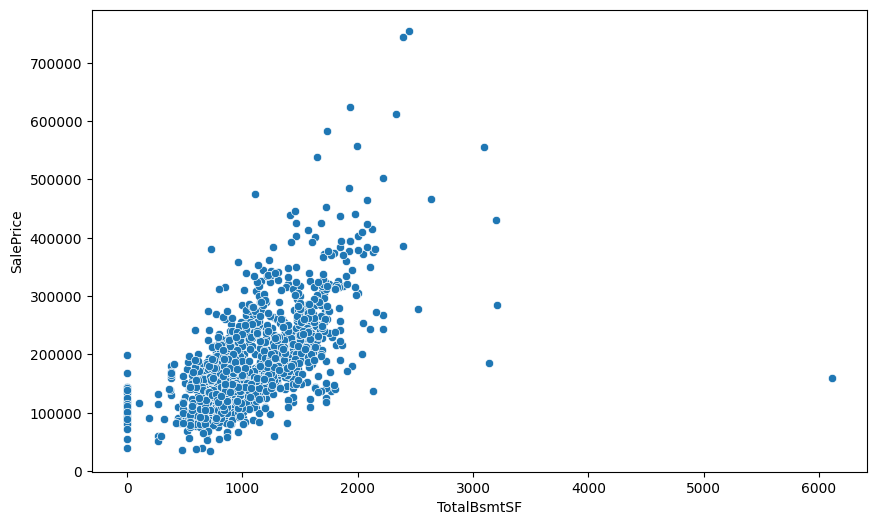

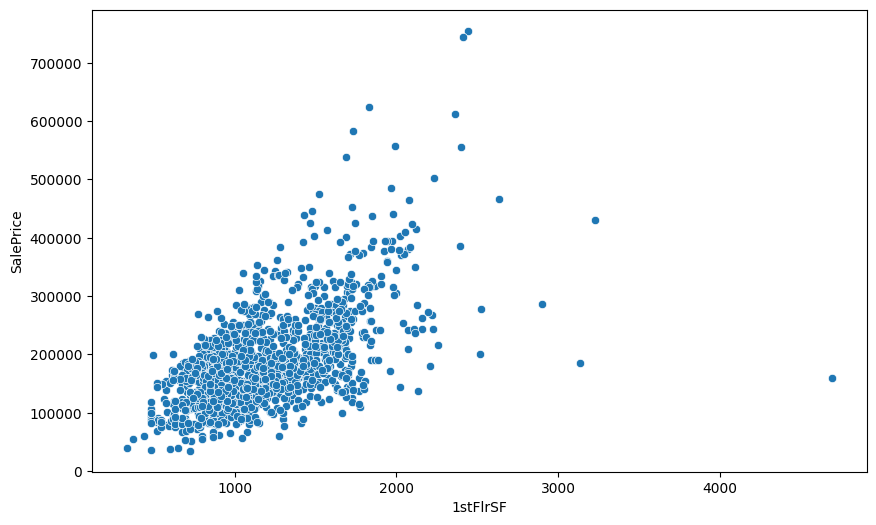

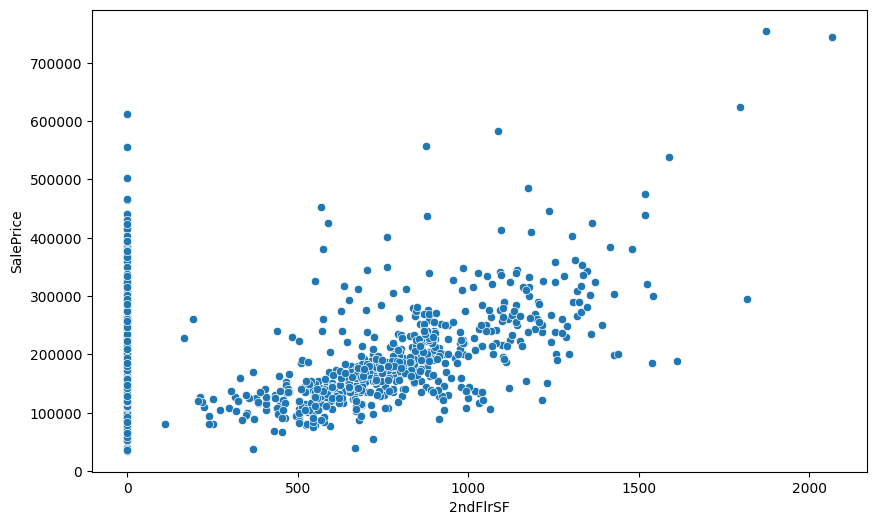

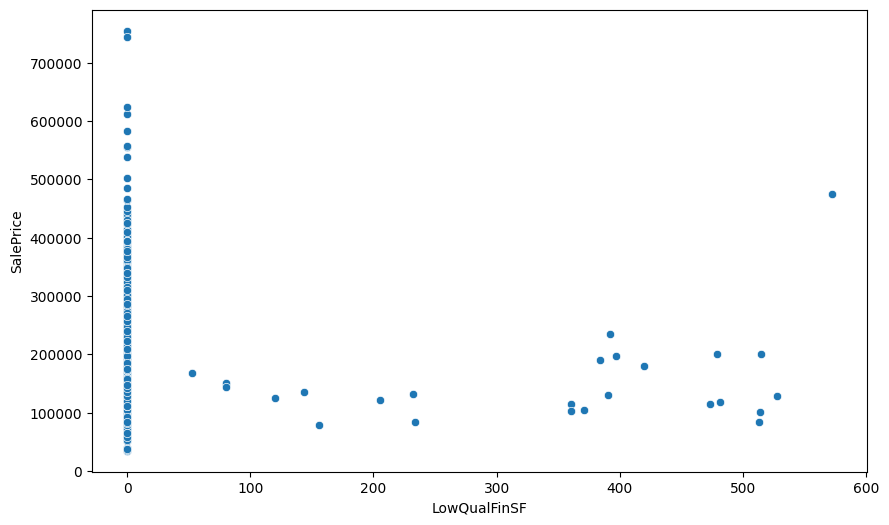

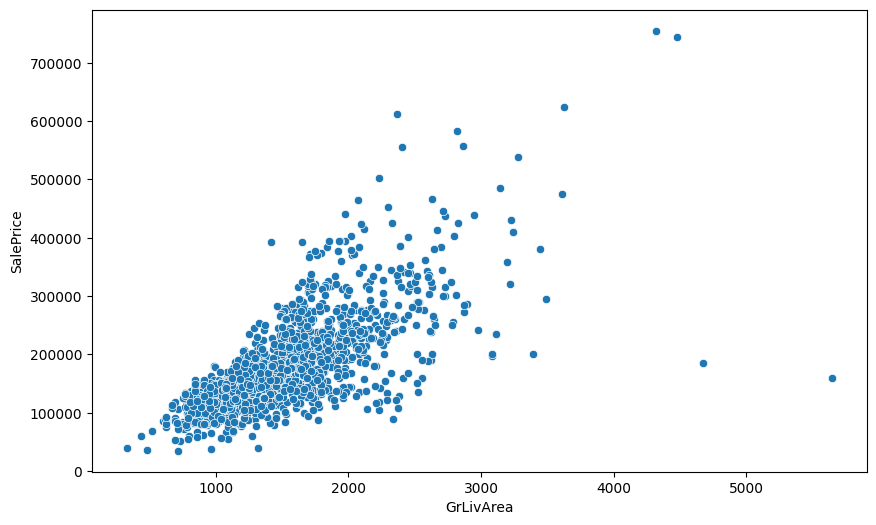

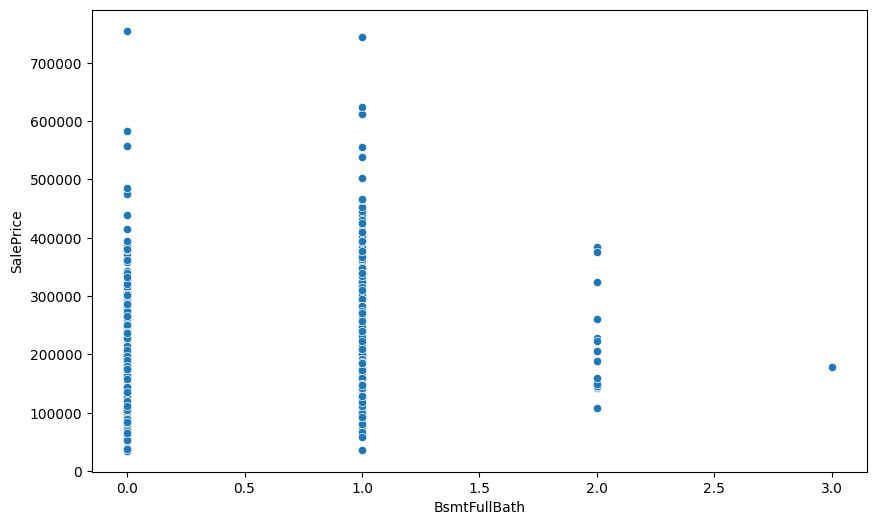

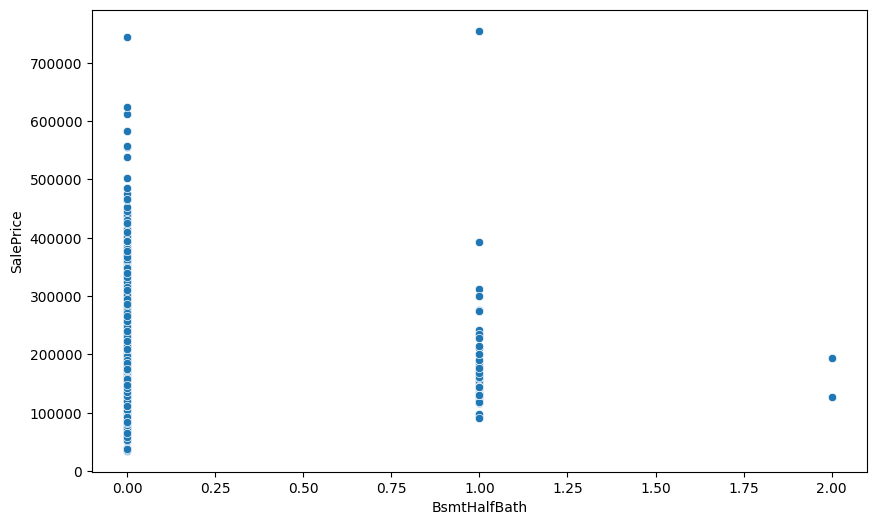

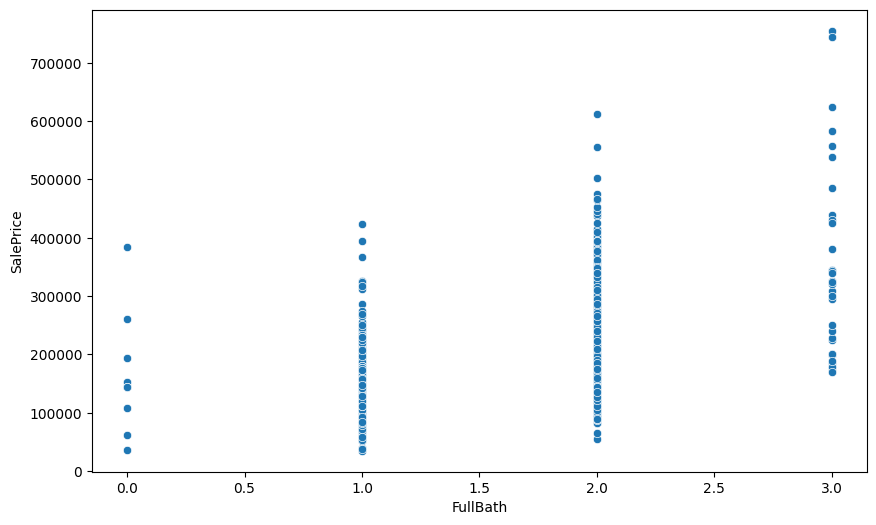

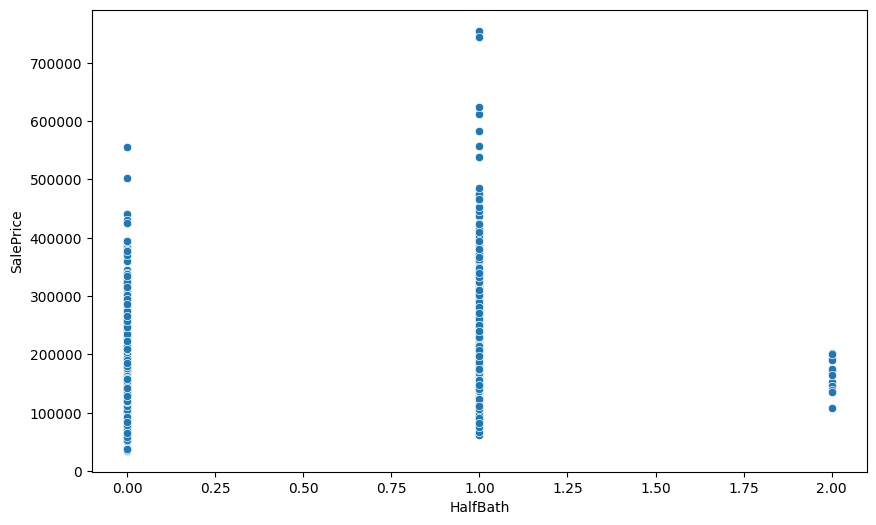

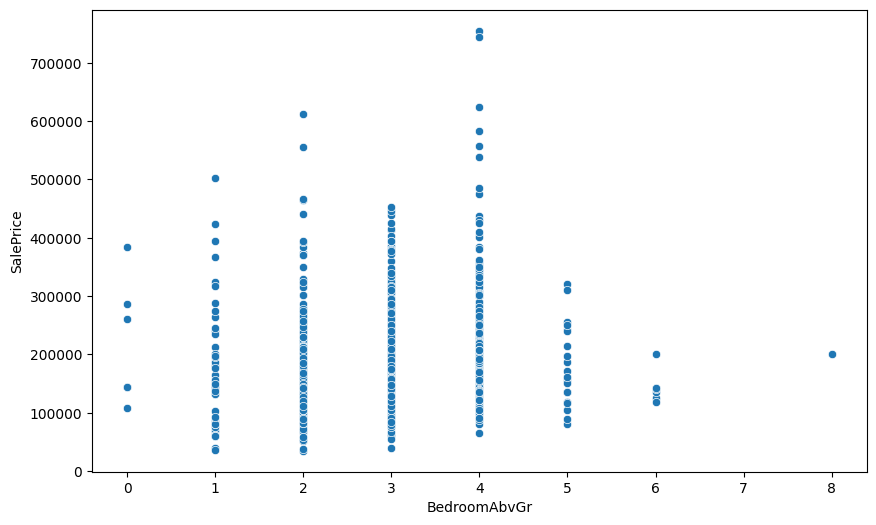

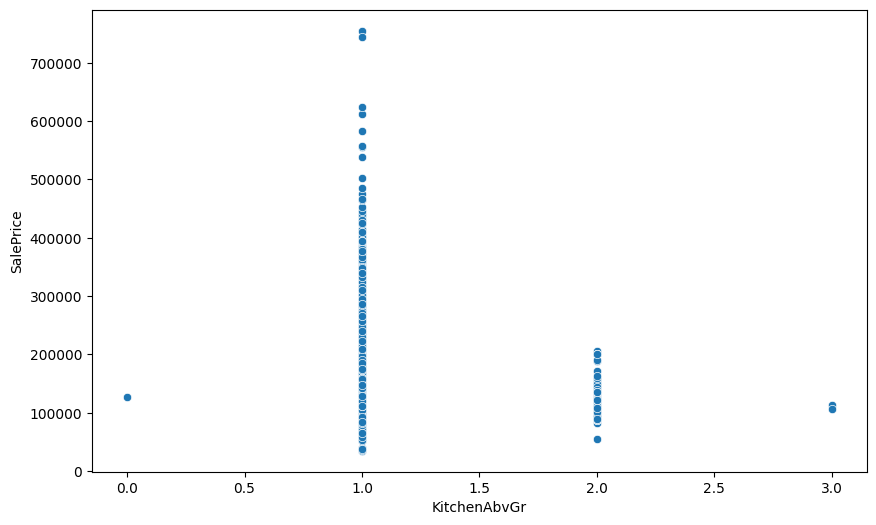

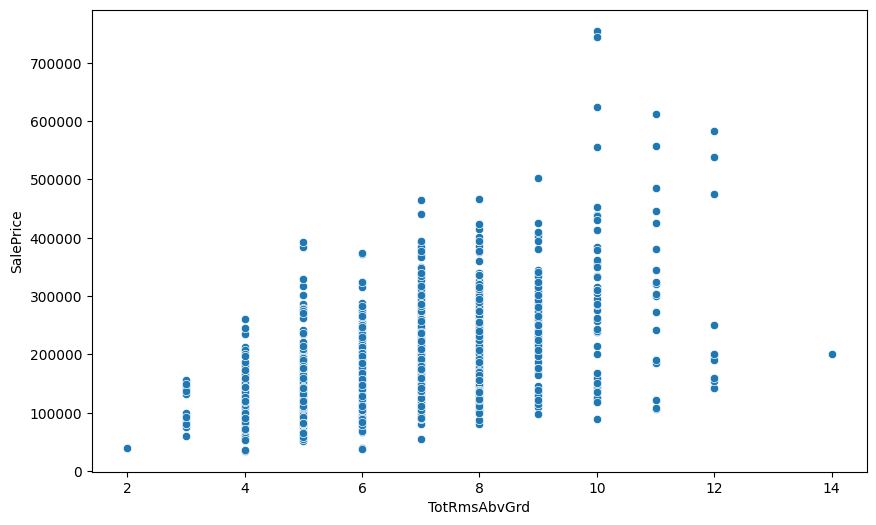

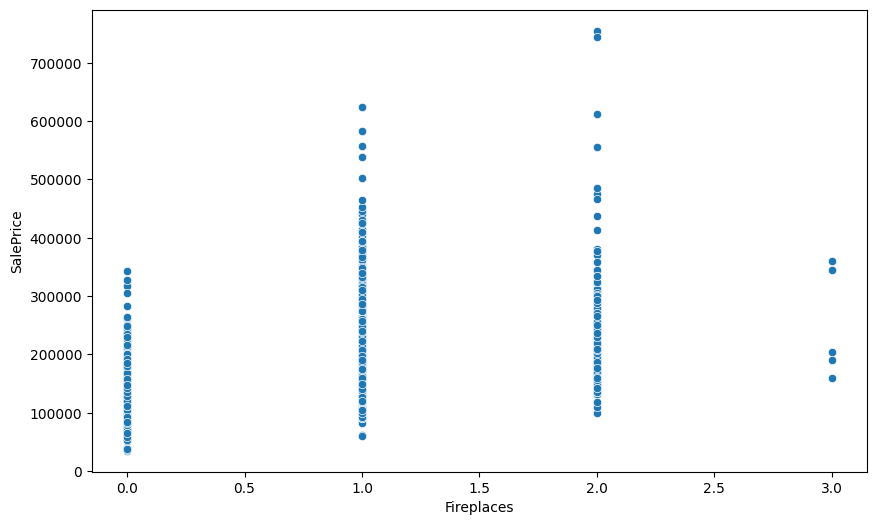

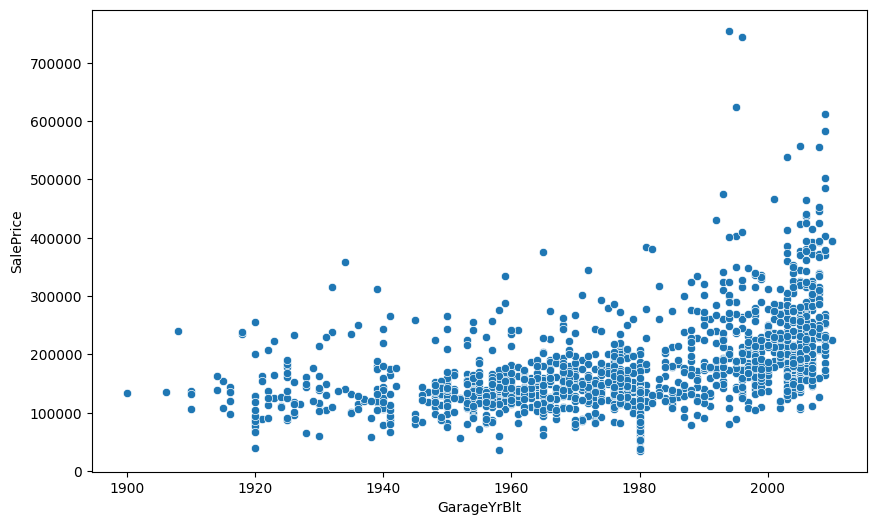

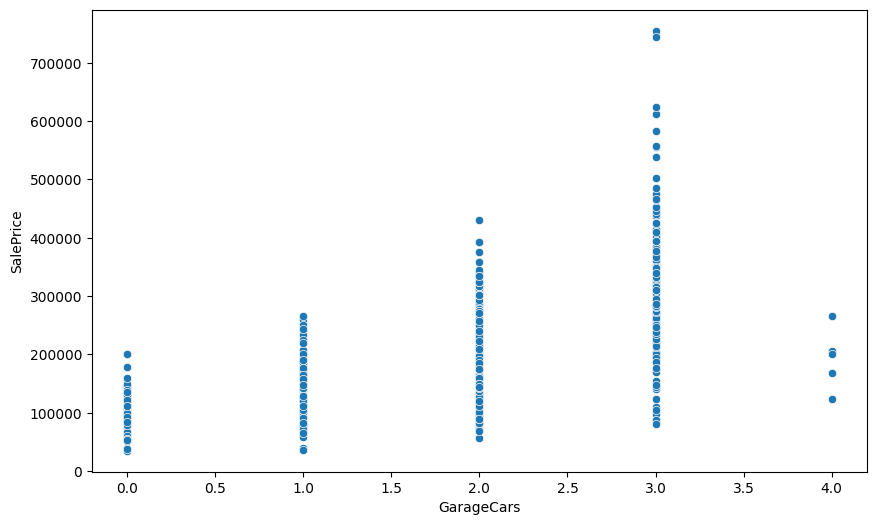

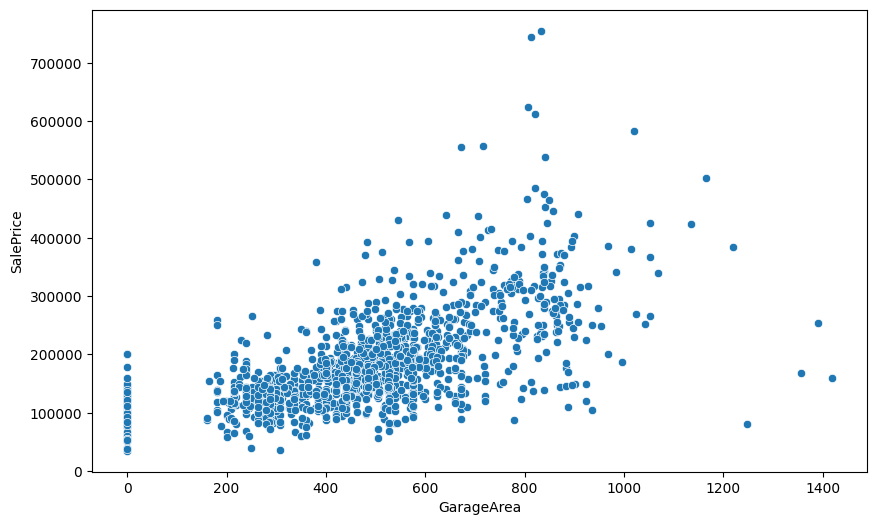

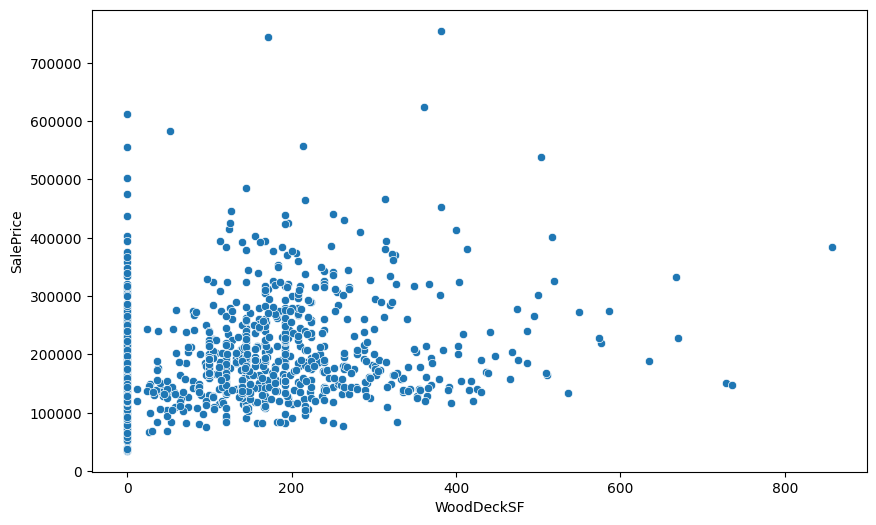

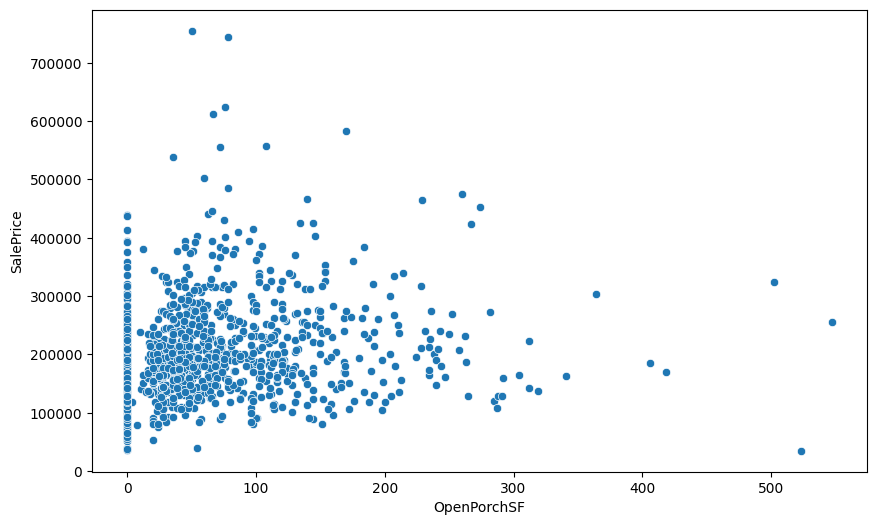

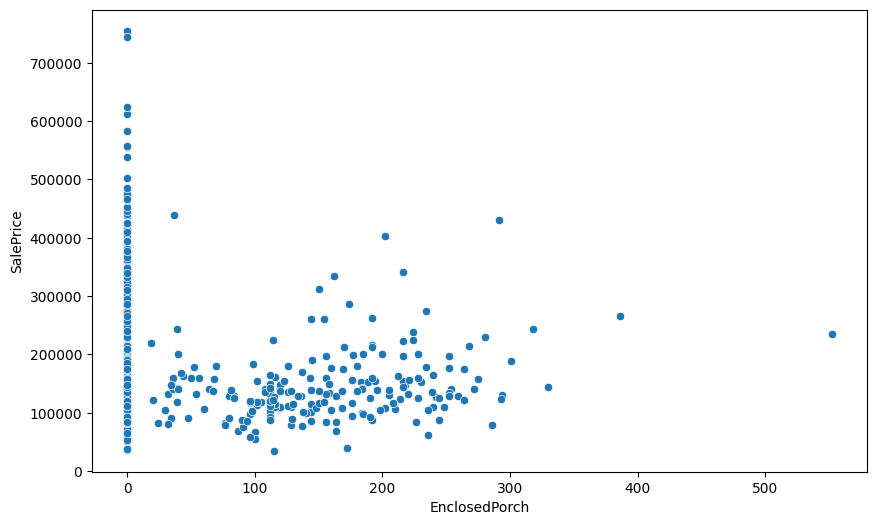

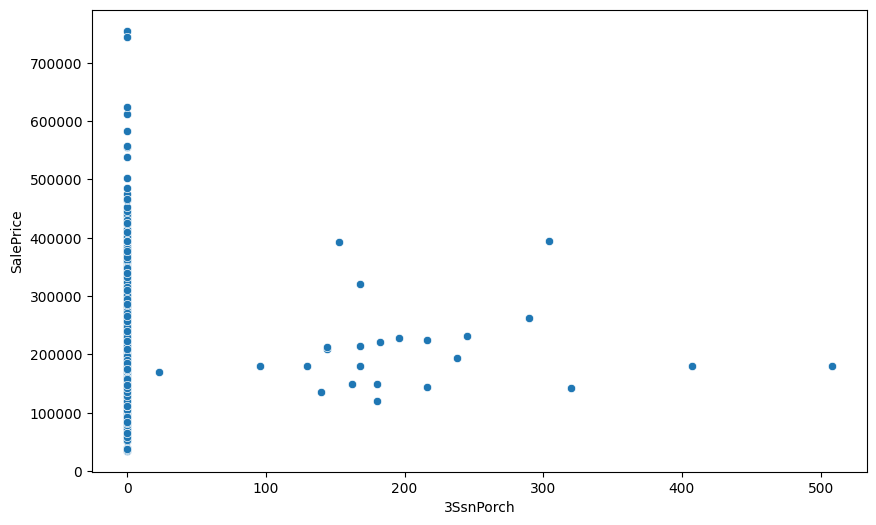

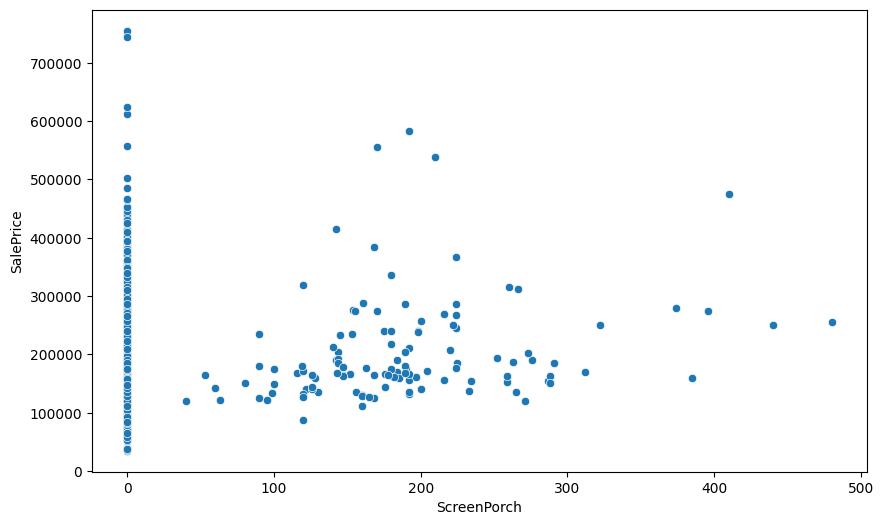

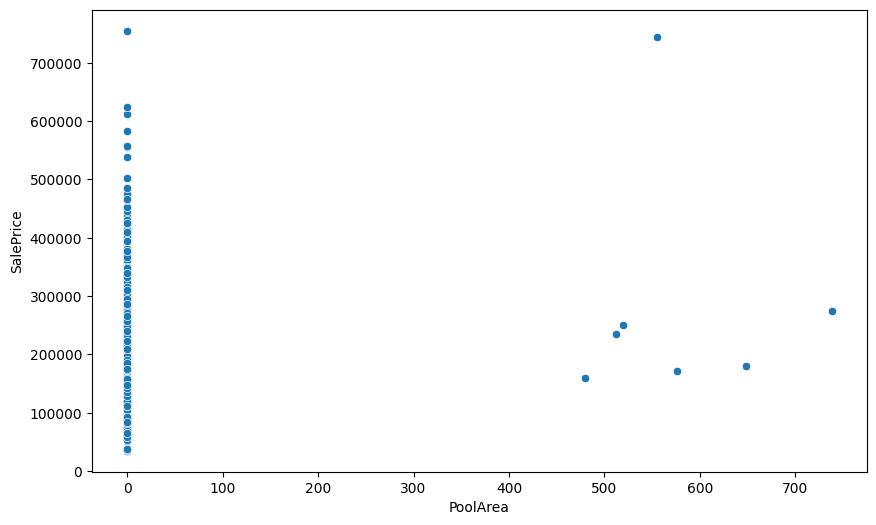

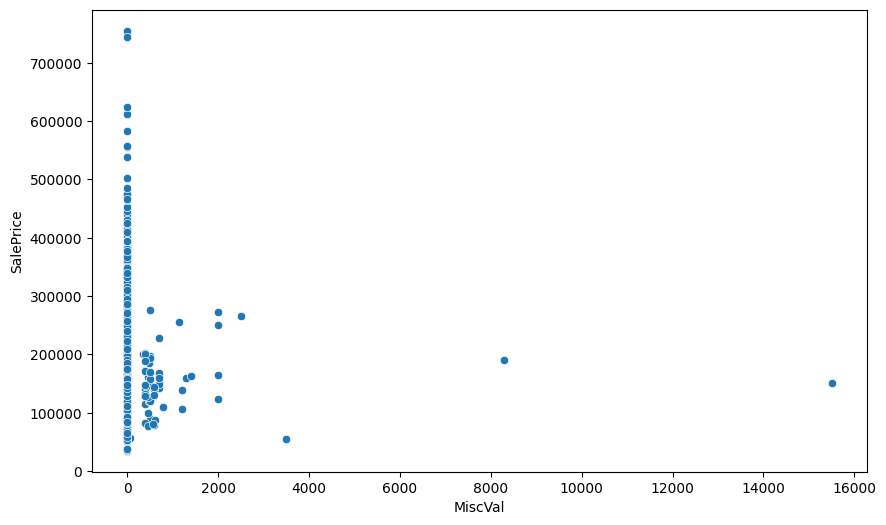

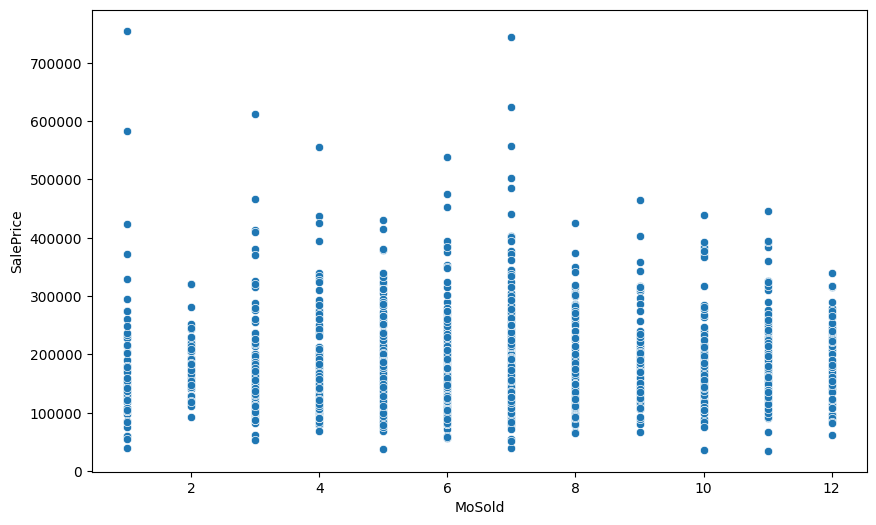

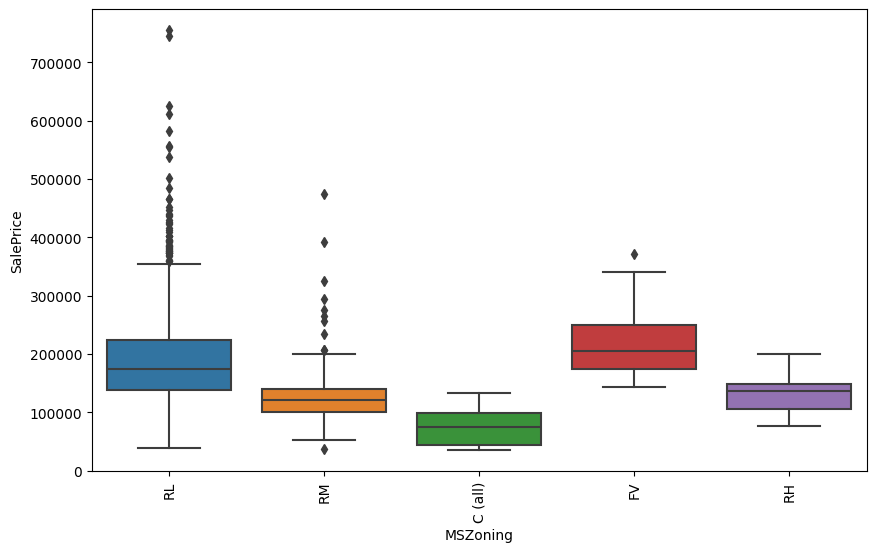

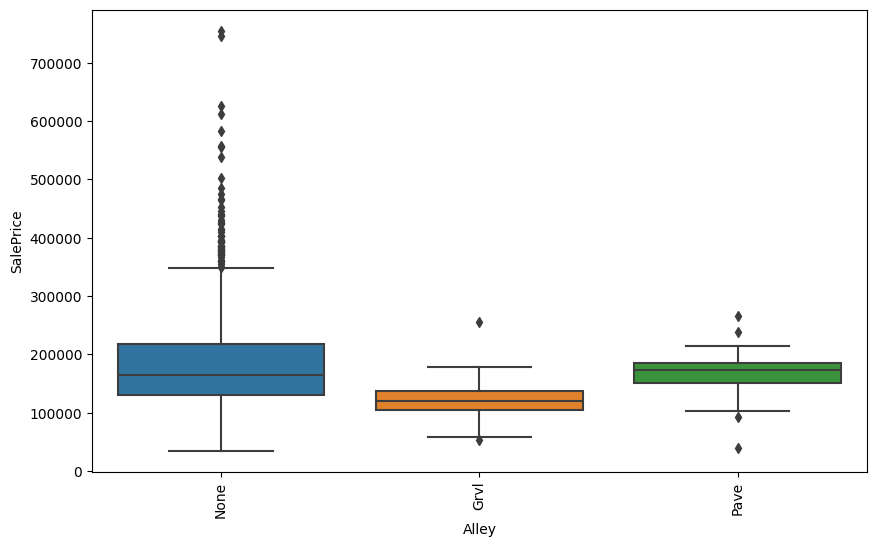

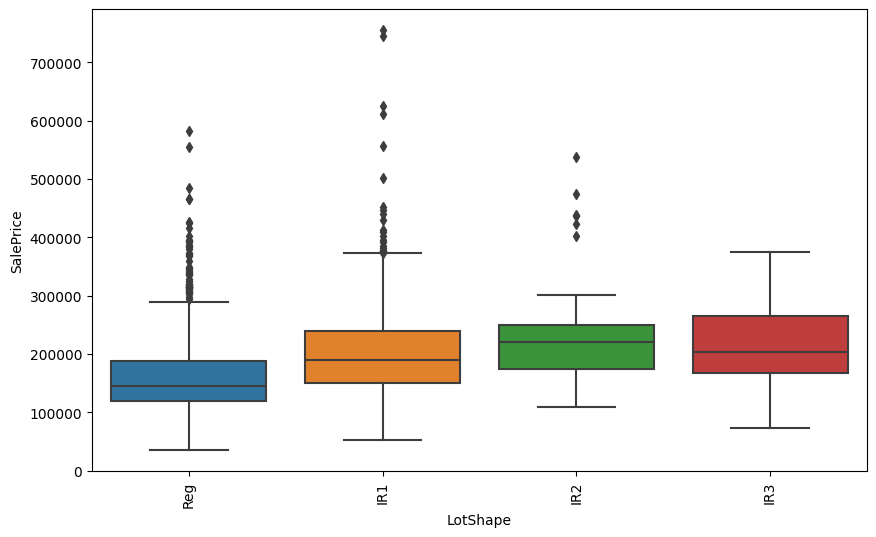

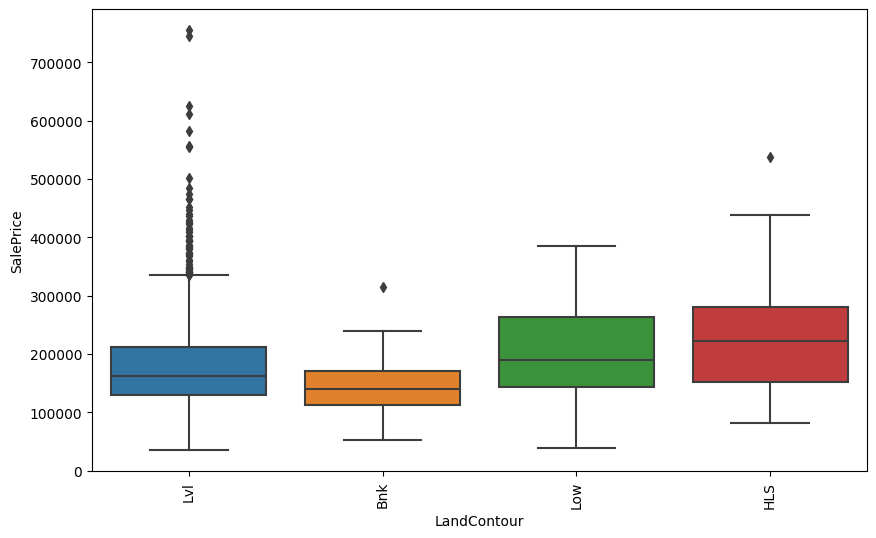

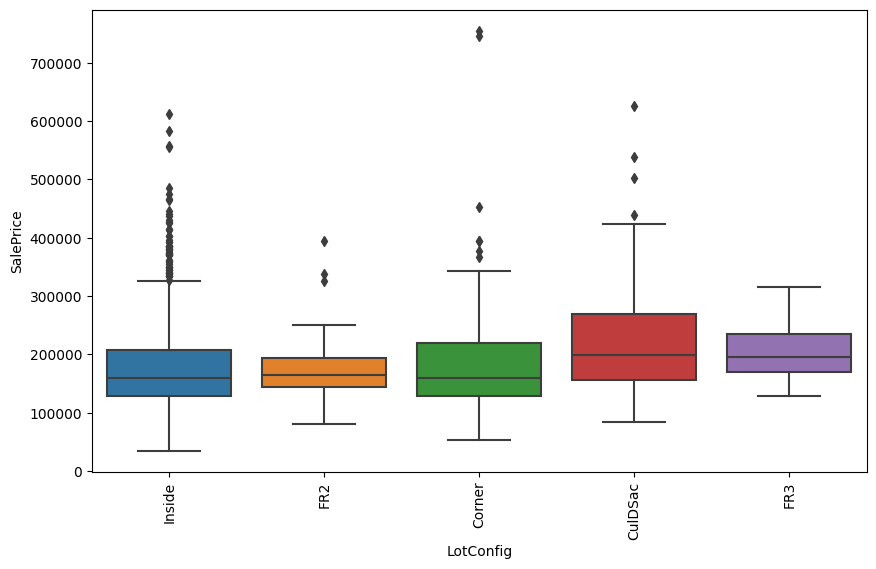

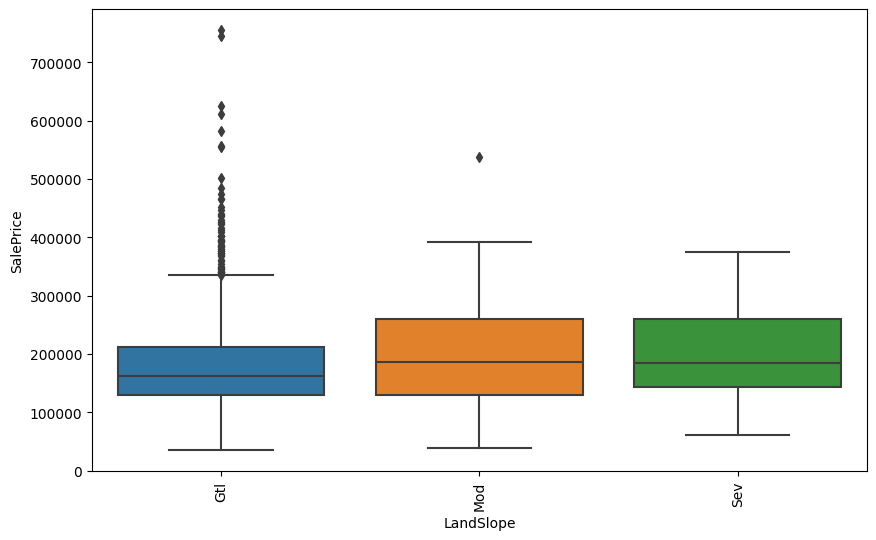

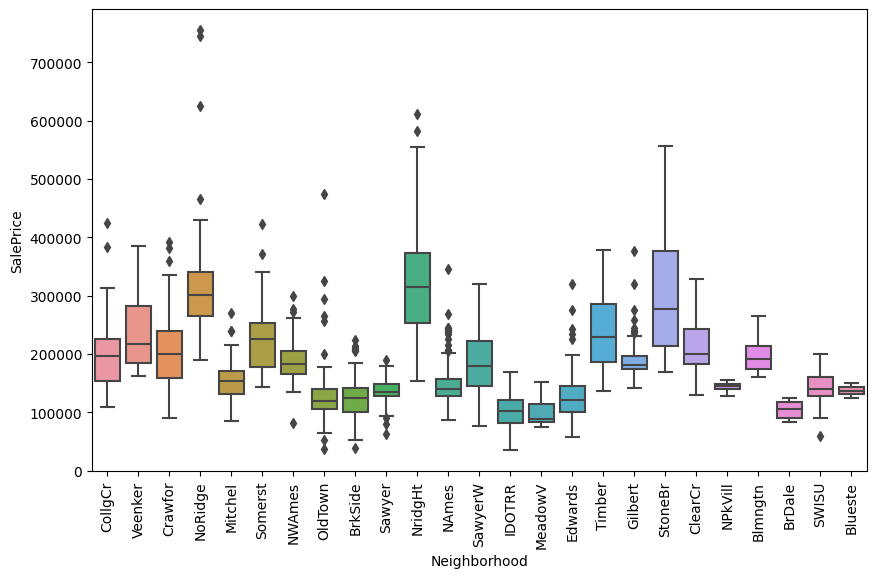

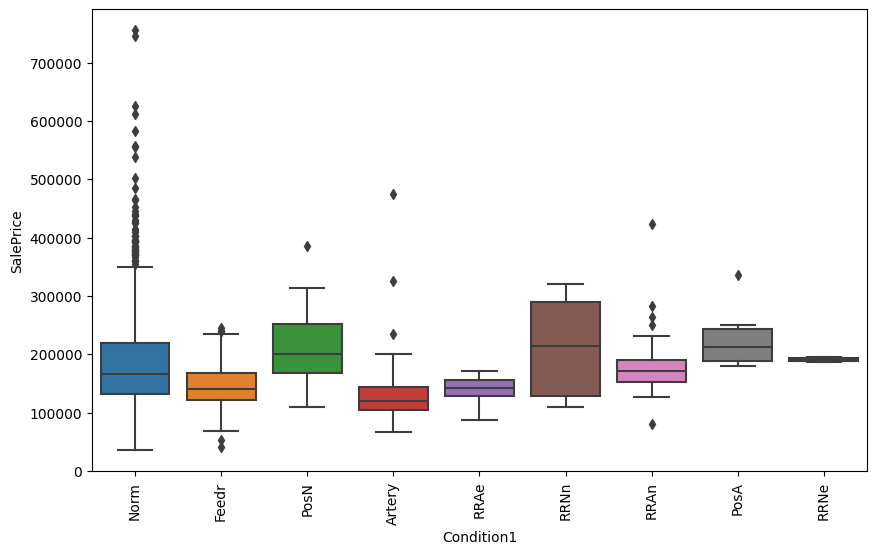

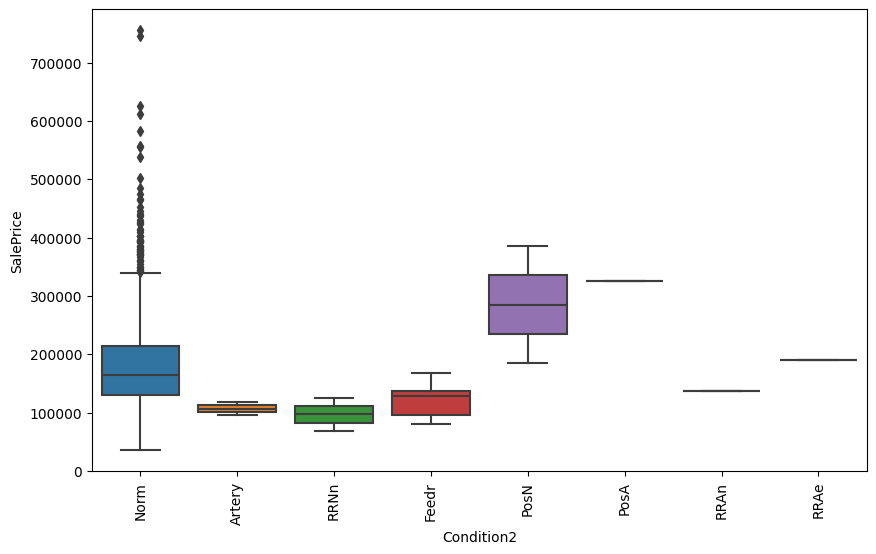

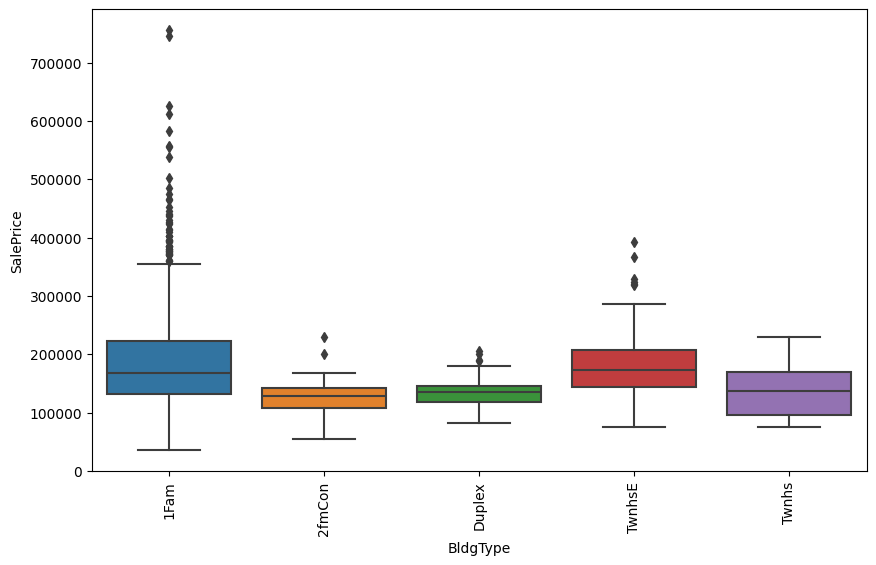

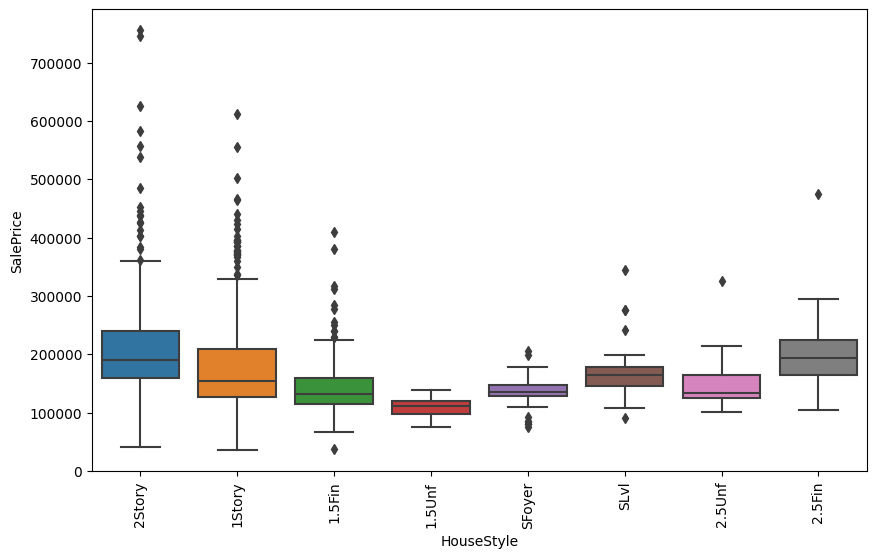

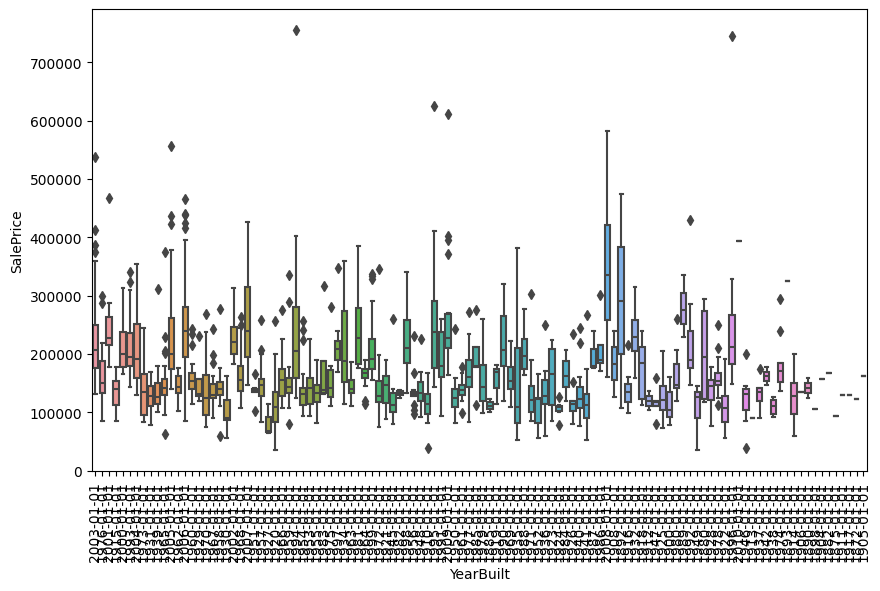

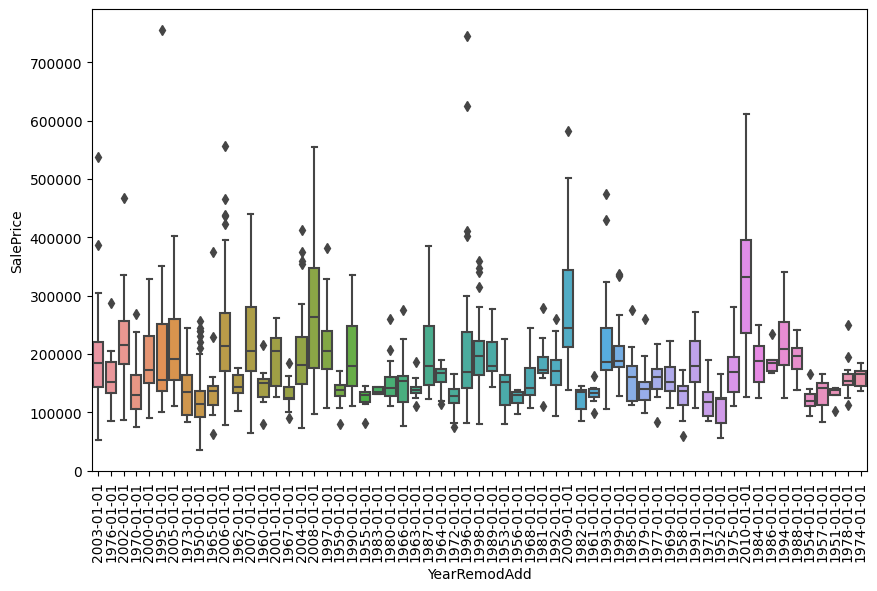

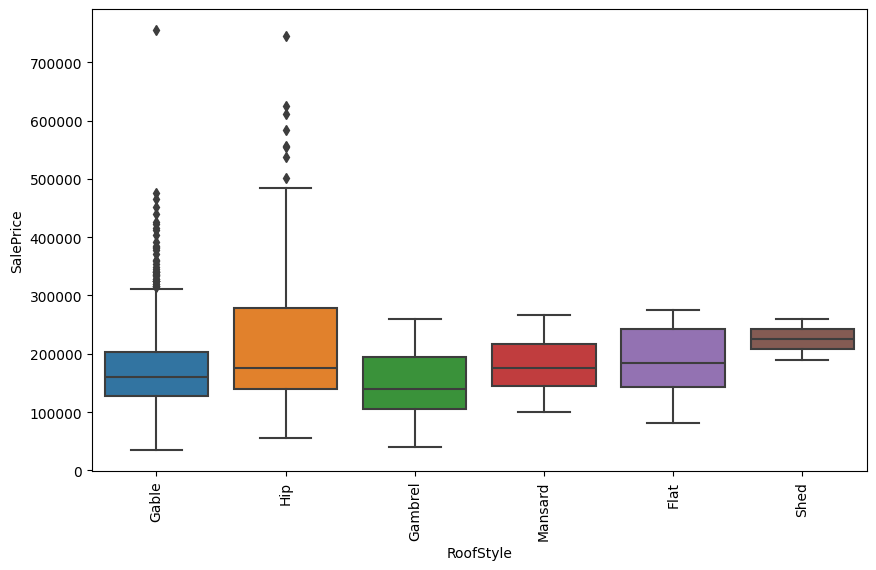

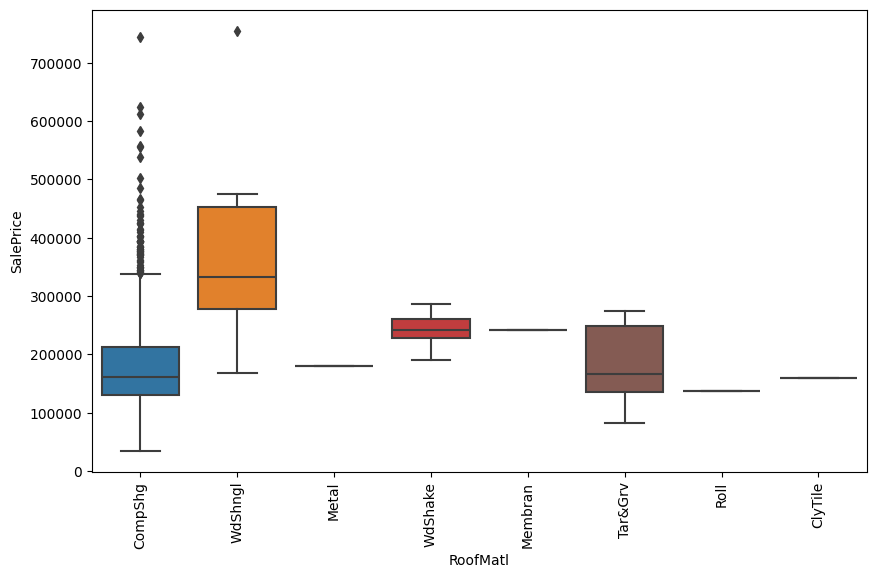

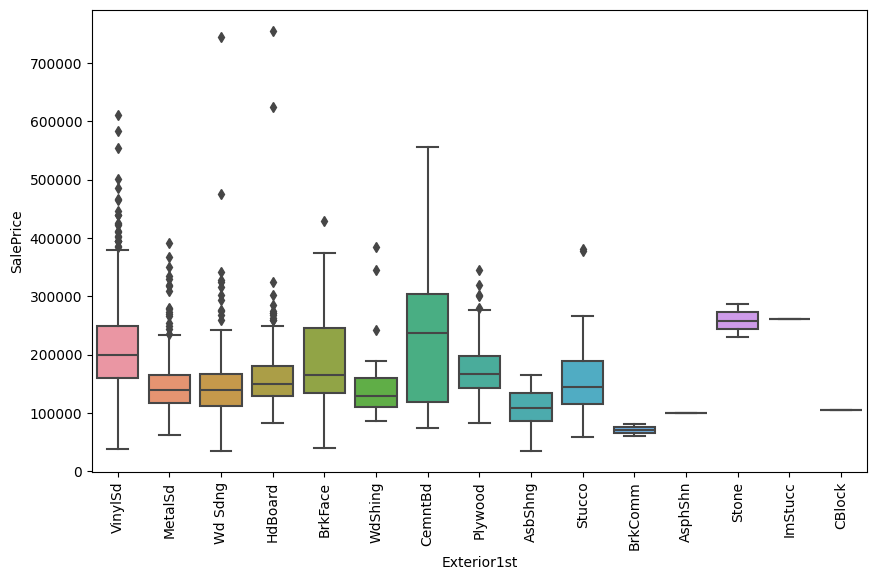

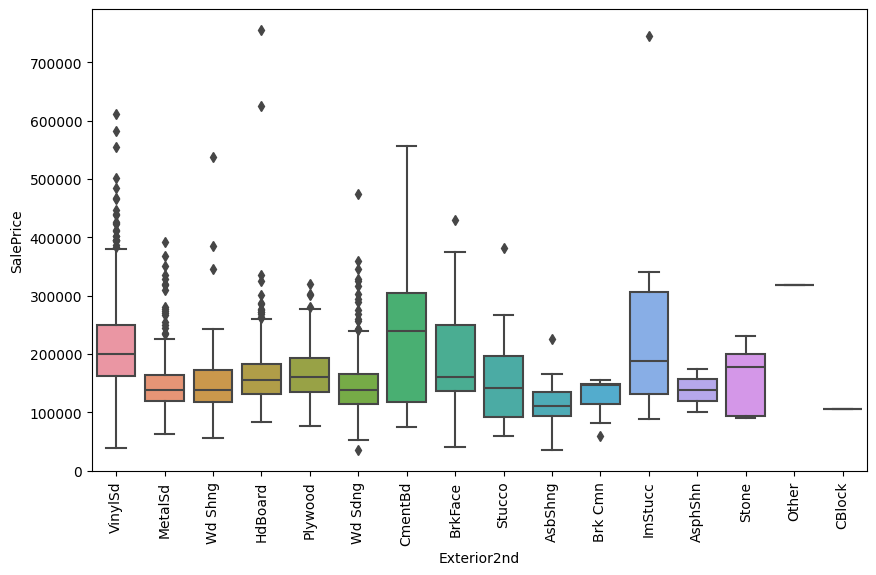

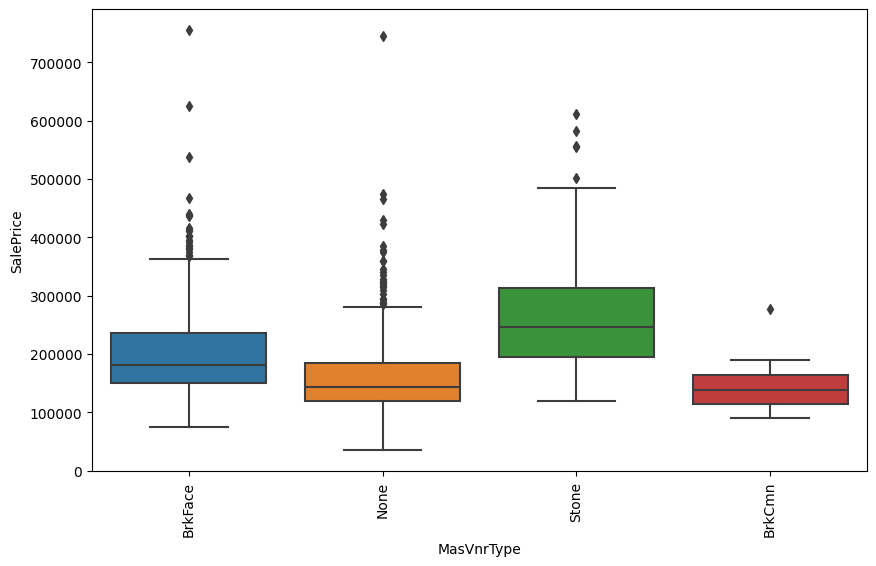

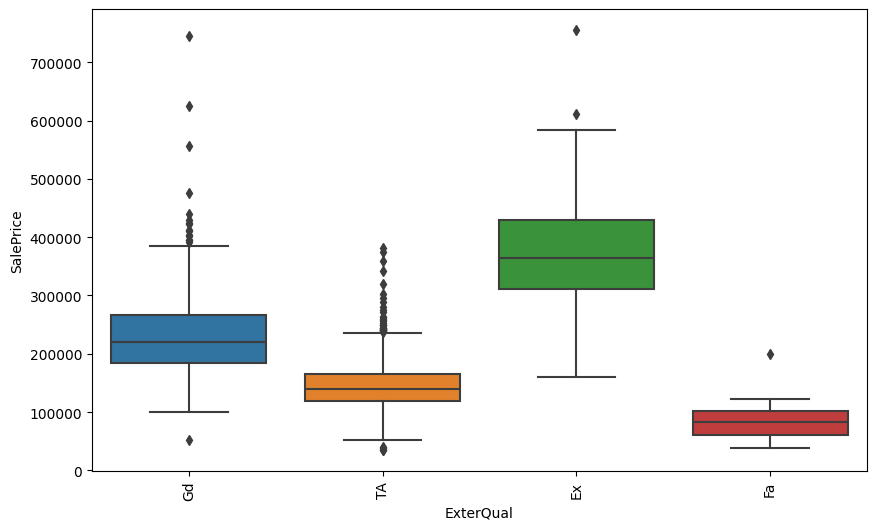

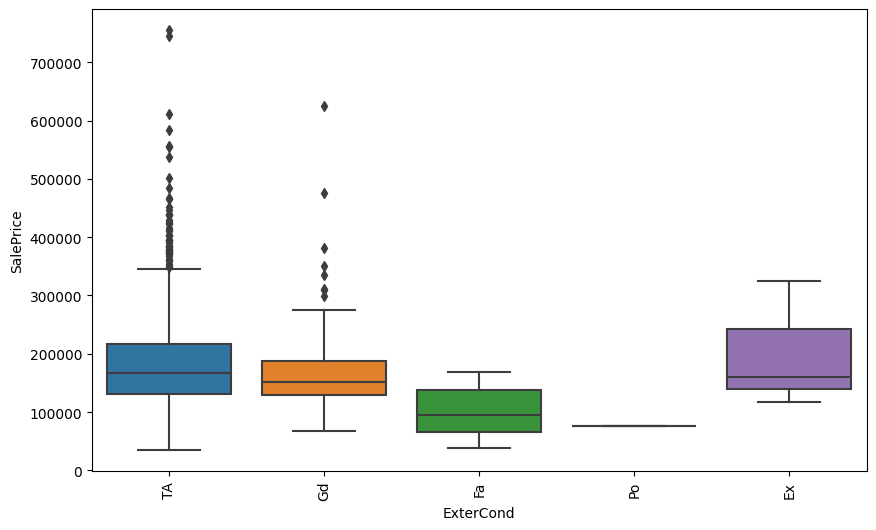

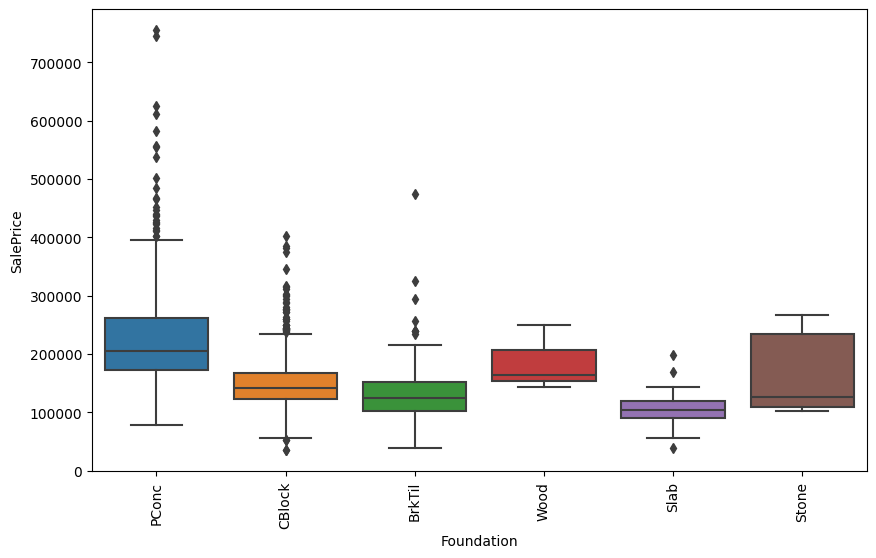

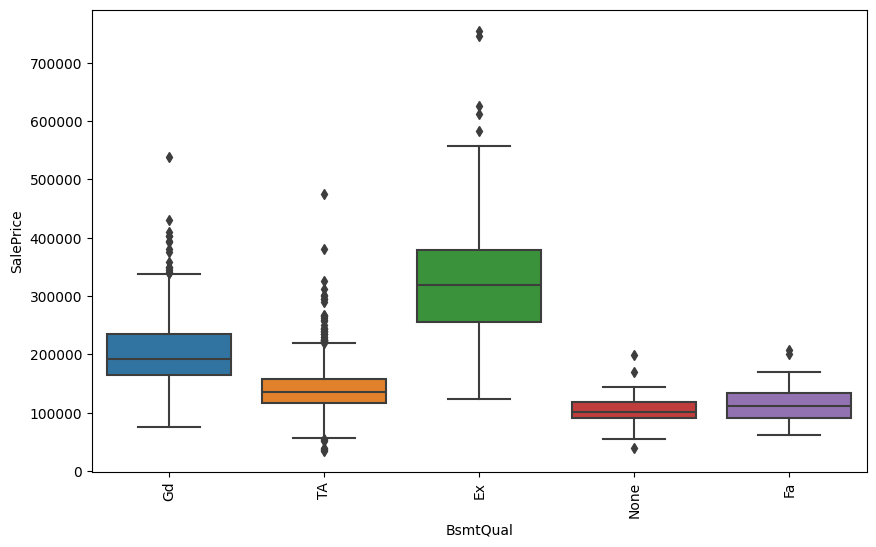

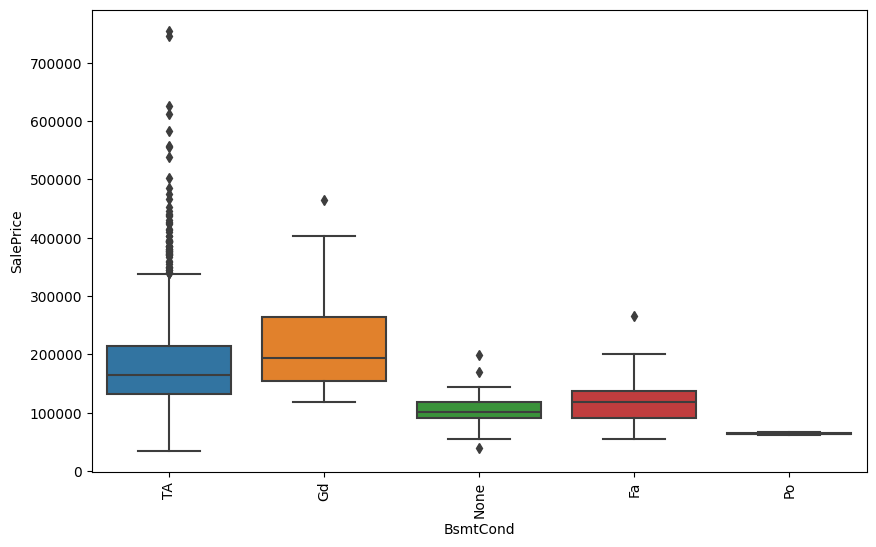

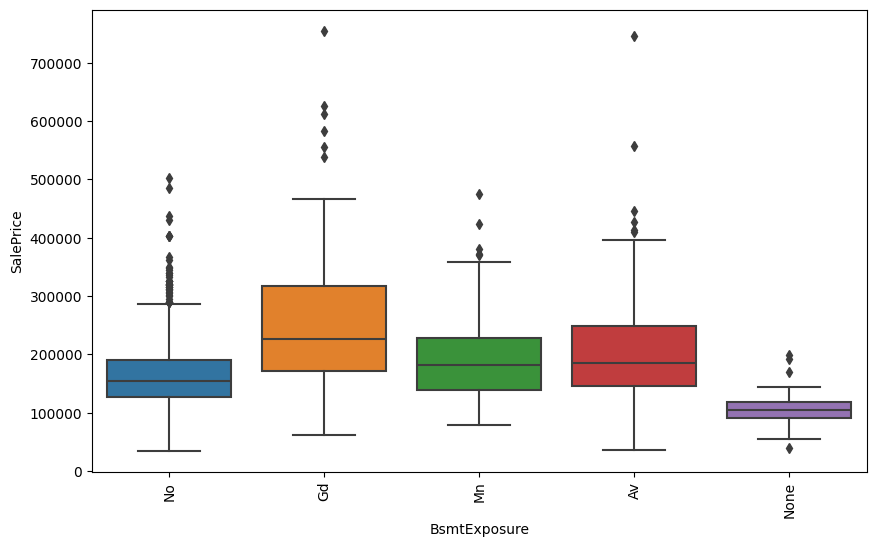

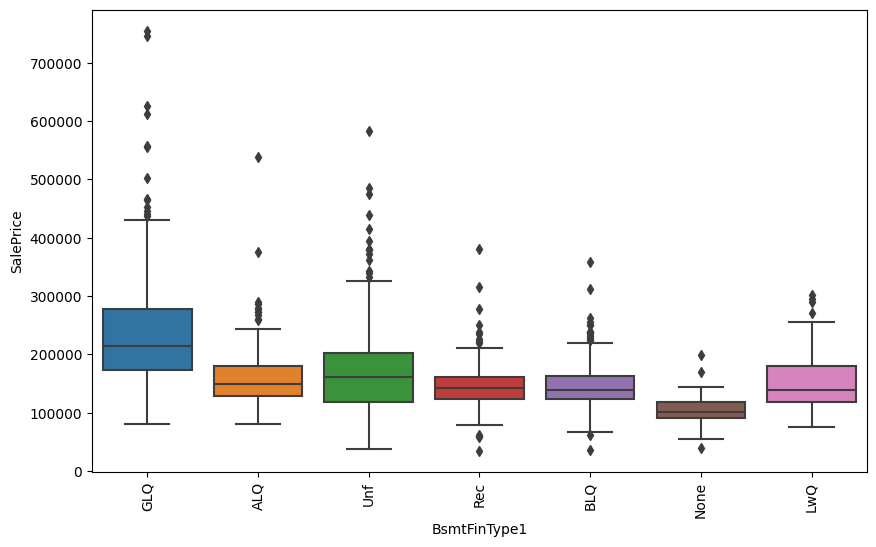

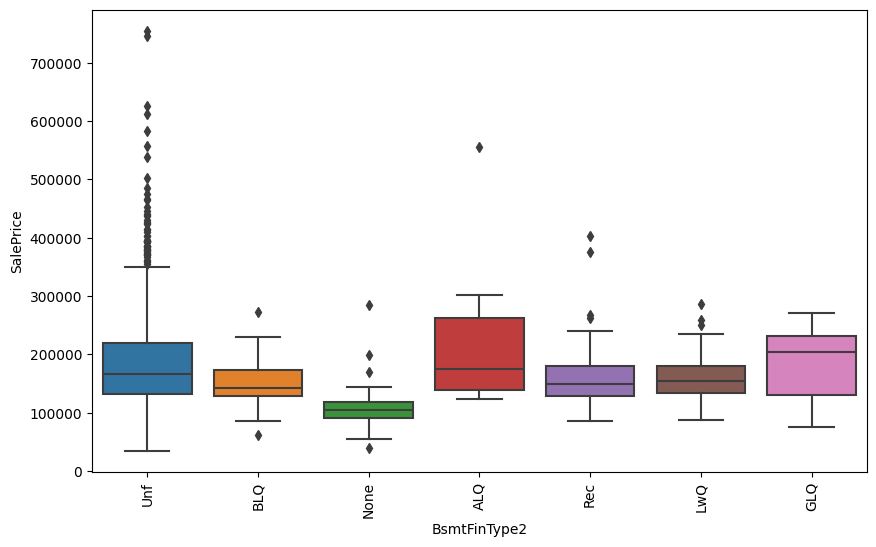

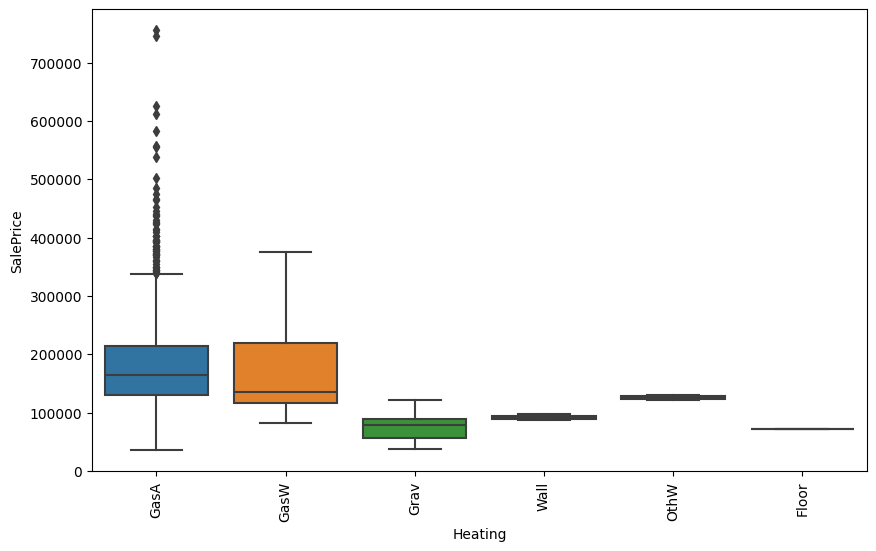

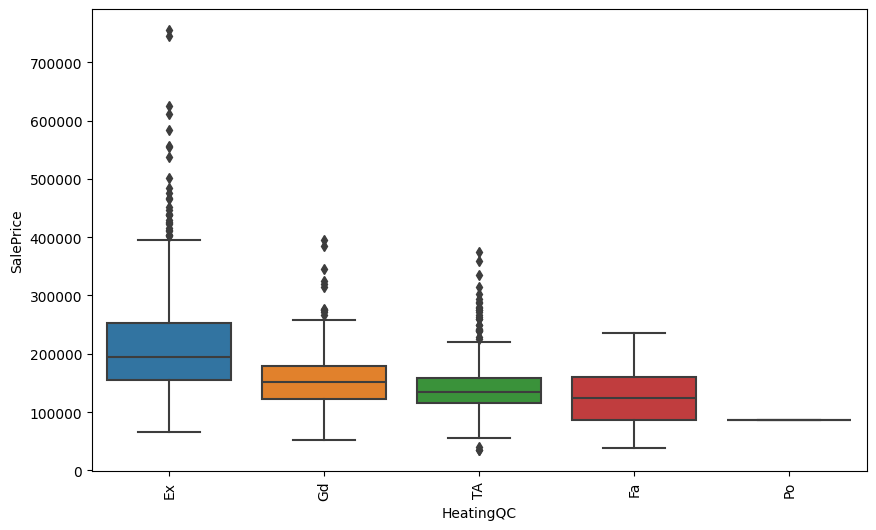

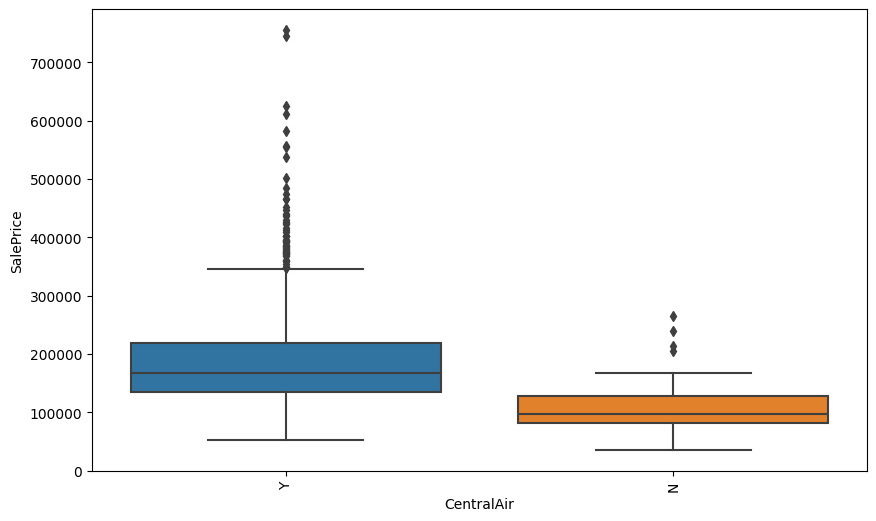

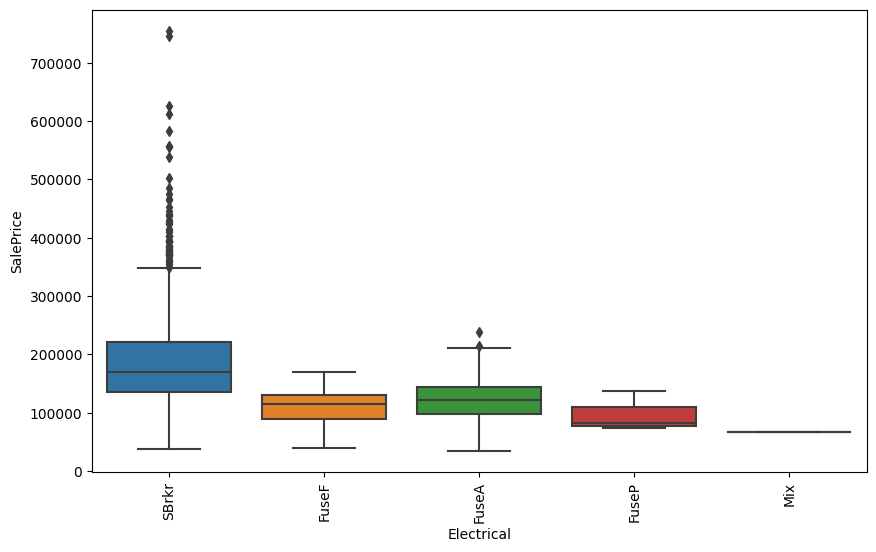

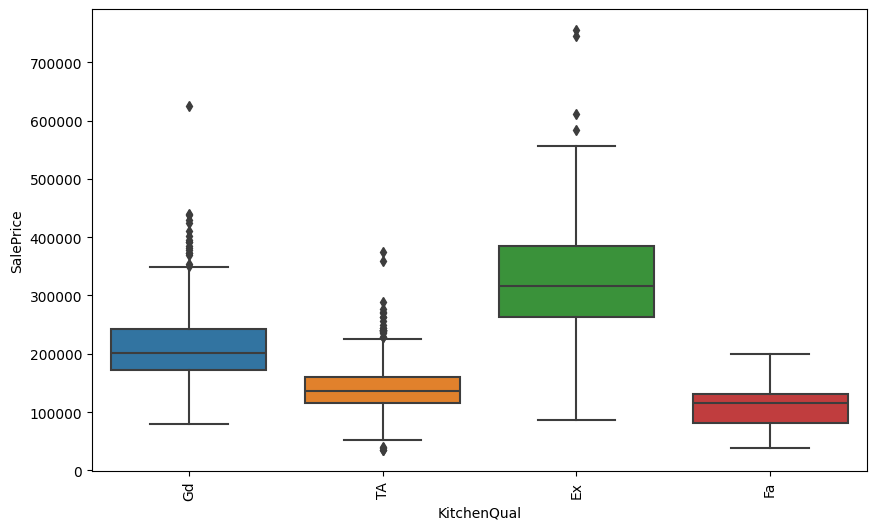

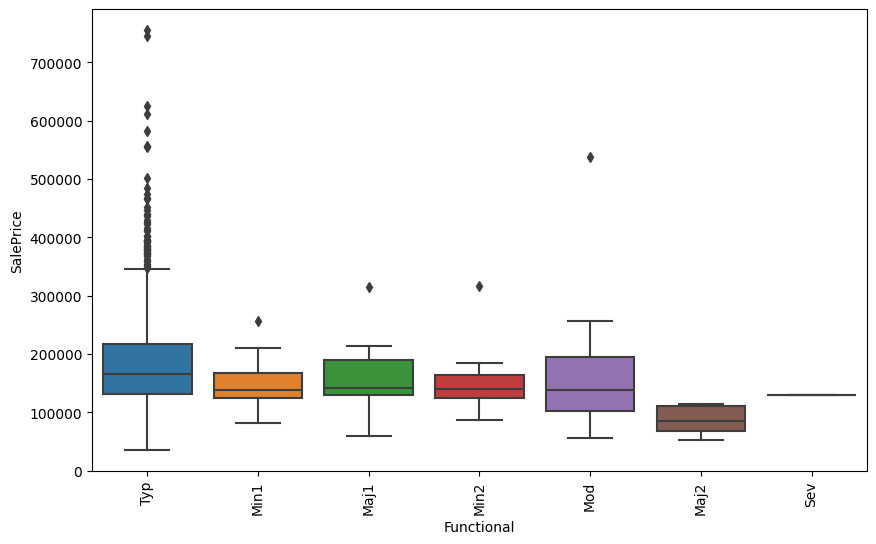

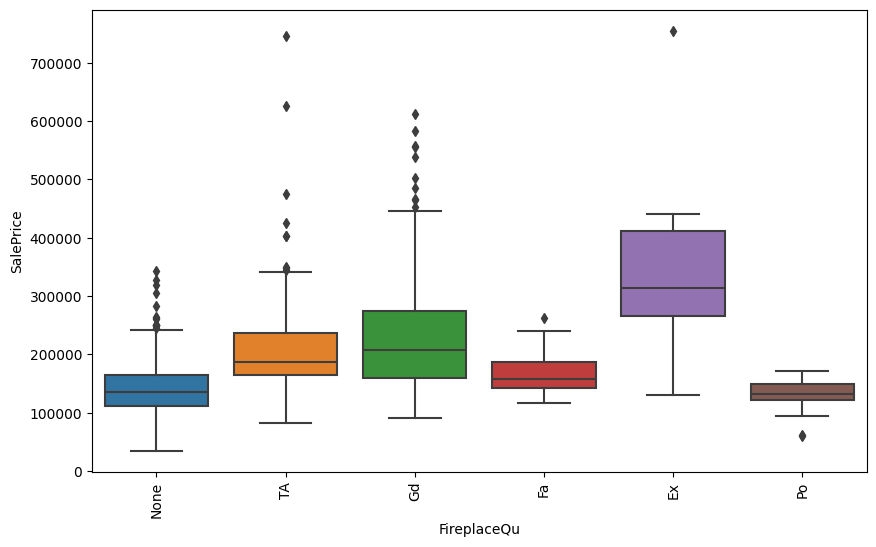

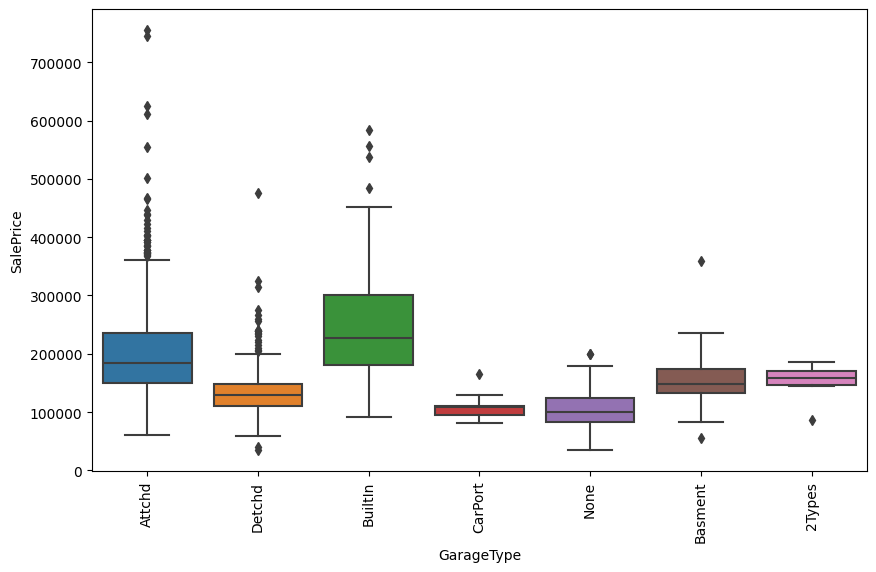

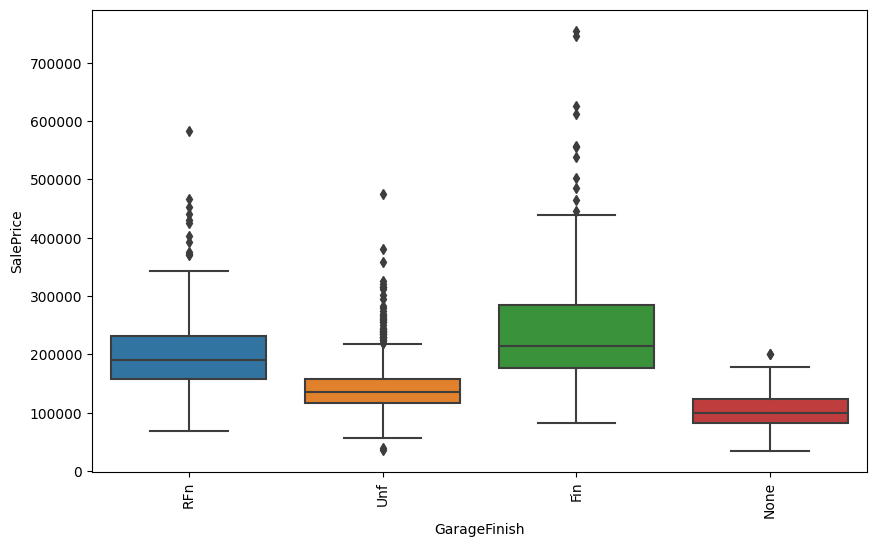

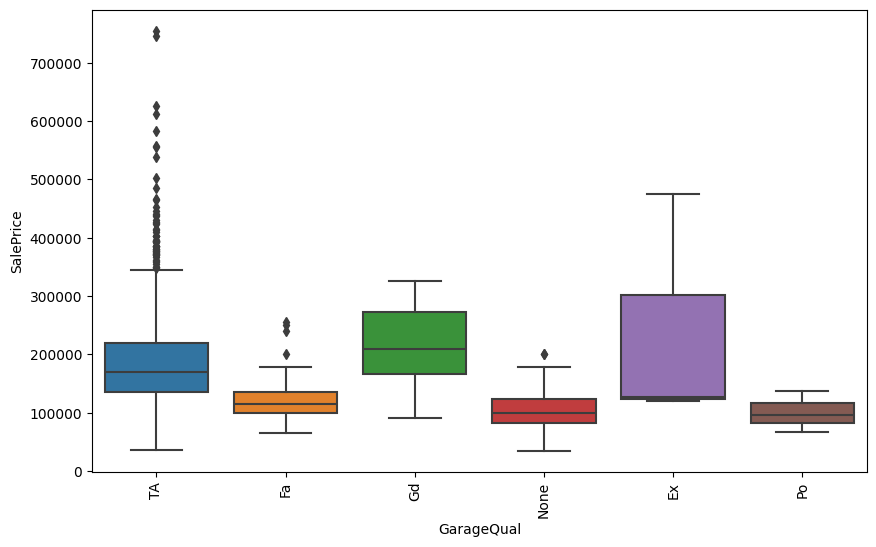

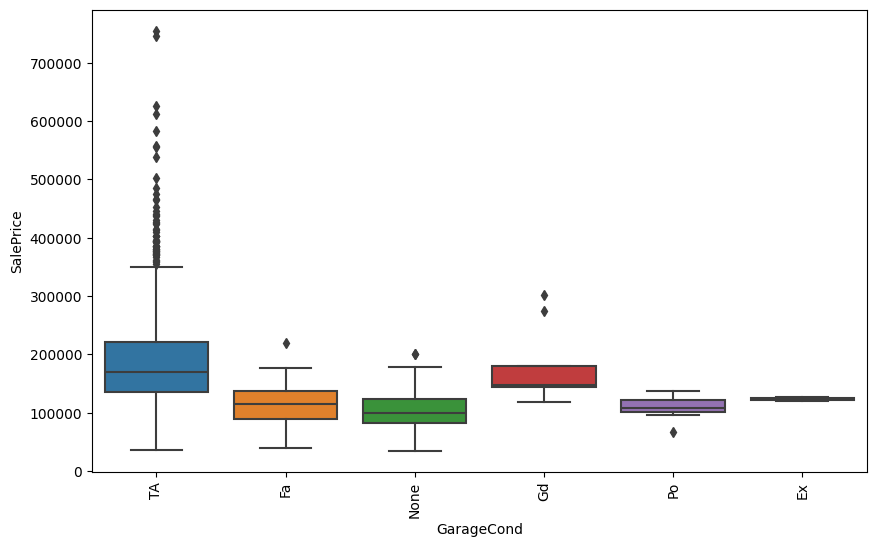

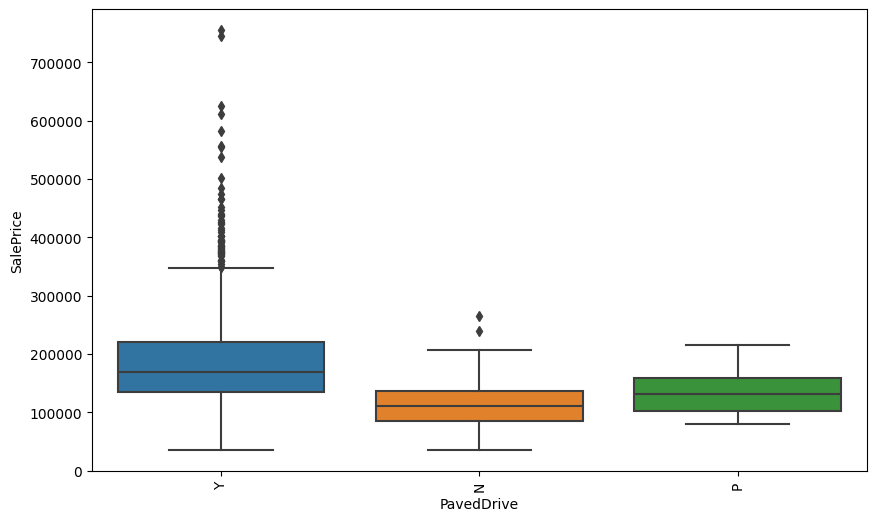

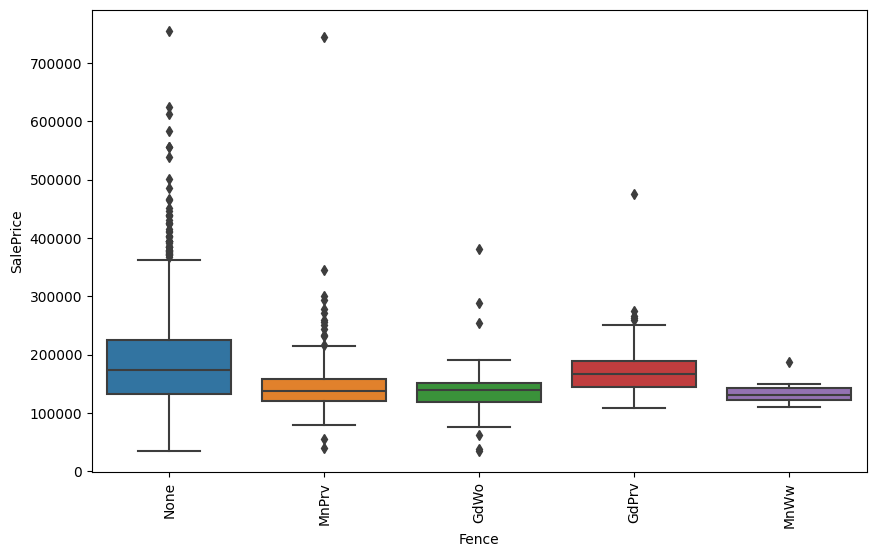

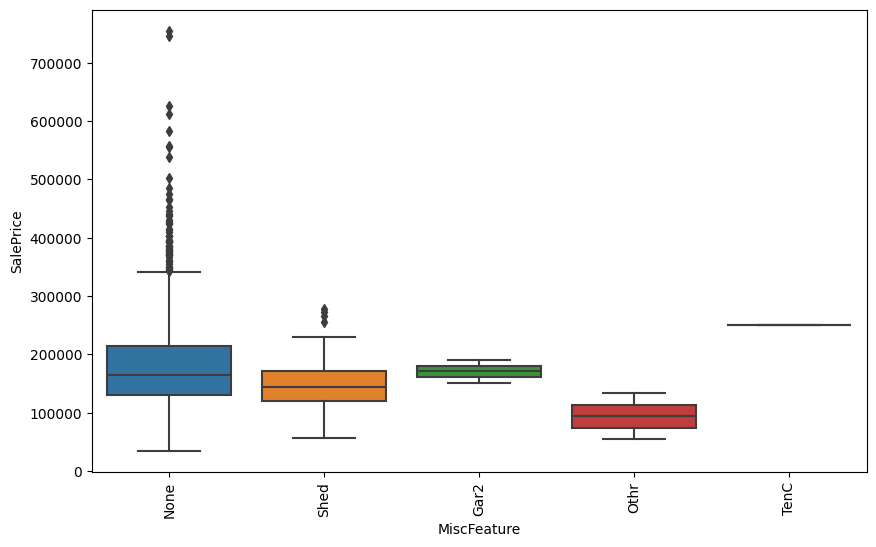

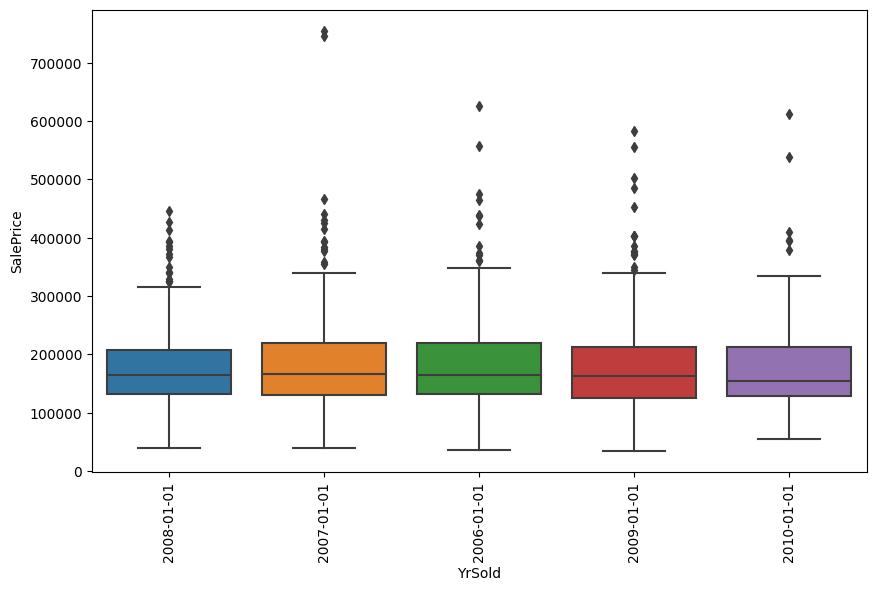

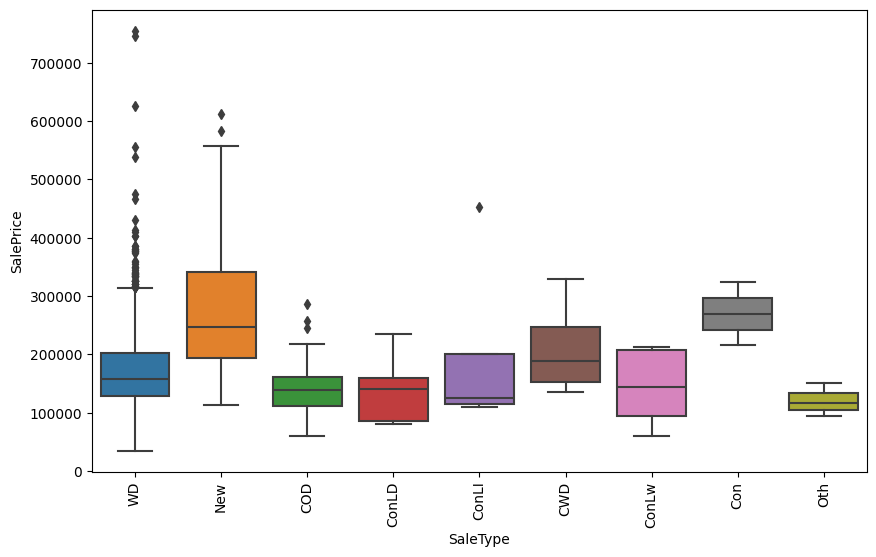

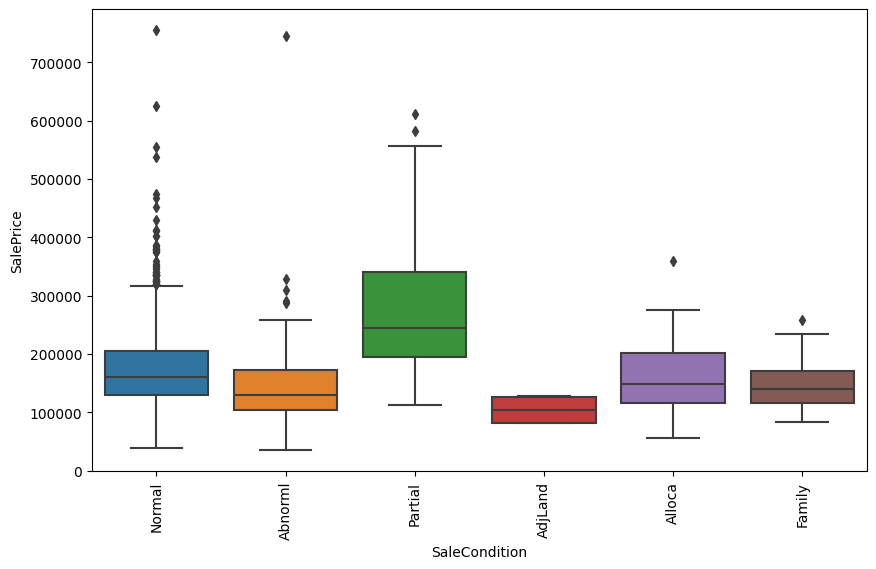

In [10]:
#numerical vs. SalePrice (target variable)
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('SalePrice')

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='SalePrice', data=train_data)
    plt.show()

#categorical vs. SalePrice (target variable)
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='SalePrice', data=train_data)
    plt.xticks(rotation=90)
    plt.show()

The visualizations above are the product of conducting a bivariate analysis, using scatterplots and boxplots to visualize the feature distributions with respect to our target feature, which is 'SalePrice'. These visualizations, like the ones for the univariate analysis, are always helpful to keep accessible to visually observe which catgorical features and their respective categorical values allow for more SalePrices to fall outisde of the interquartile range. The scatterplots especially help almost immediately establish a good idea of which numerical features have a postivie/negative or non-correlated relationship with SalePrice, which can be further expanded upon with correlation analysis.

### Correlation Analysis

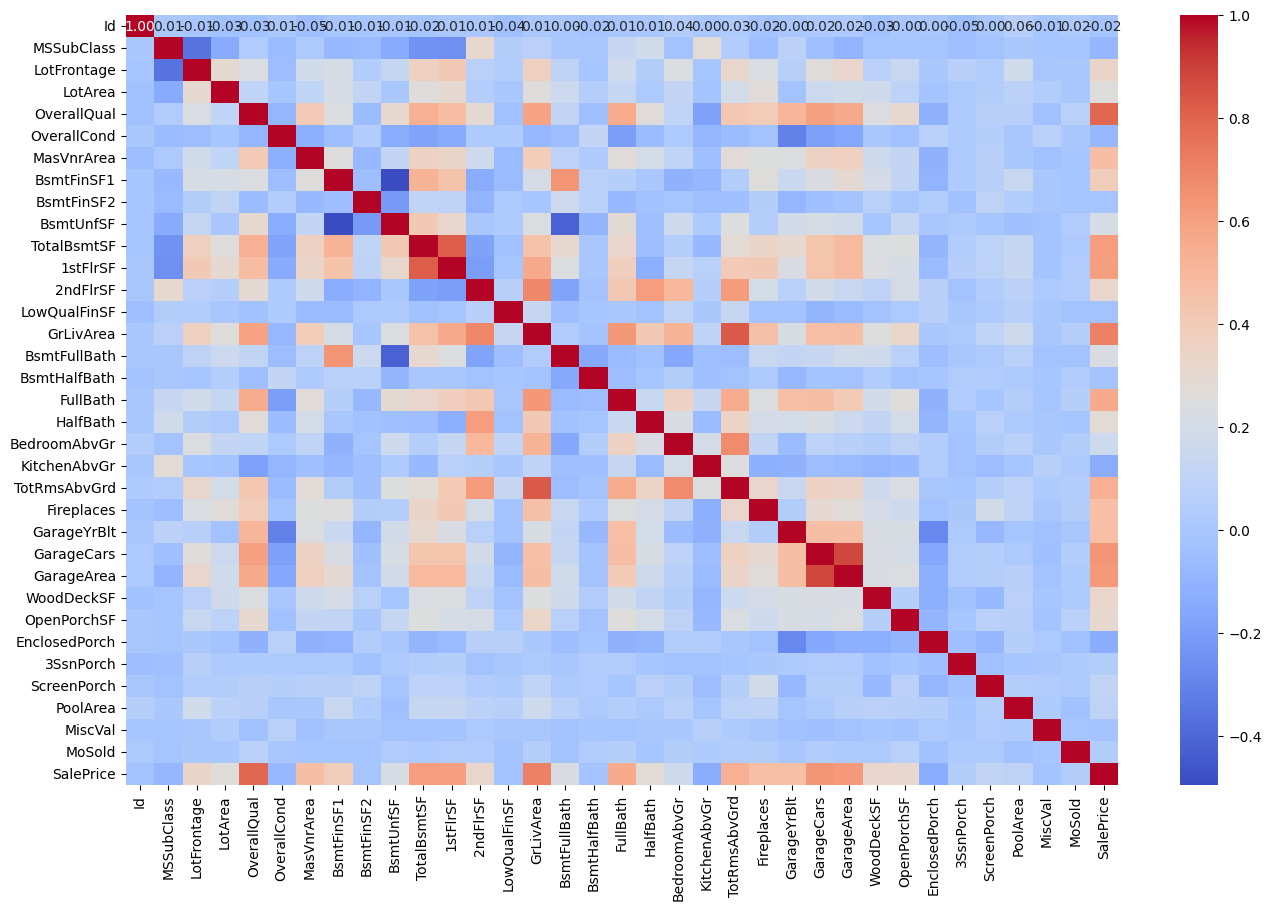

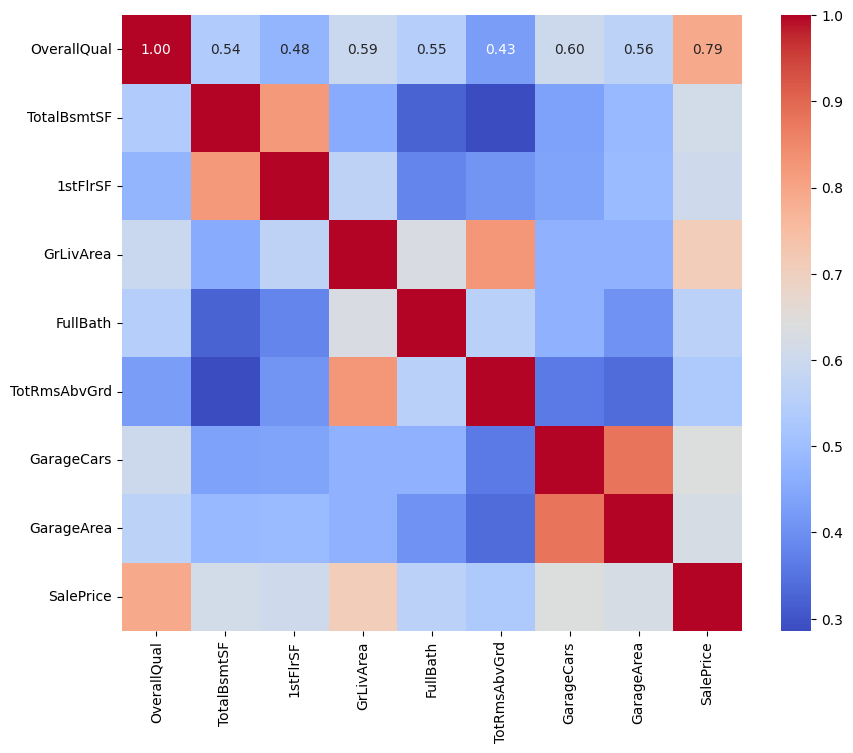

In [11]:
#creating the corr_matrix
train_data_numeric = train_data.select_dtypes(include=['int64', 'float64'])
corr_matrix = train_data_numeric.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

#correlations with SalePrice (target variable)
top_corr_features = corr_matrix.index[abs(corr_matrix['SalePrice']) > 0.5]
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[top_corr_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

The correlation heatmaps above represent a correlation matrix between the features. The second smaller heatmap is of interest especially as that shows the features with the top correlations with our target feature 'SalePrice'. Looking at the heatmap, features such as 'OverallQual', 'GarageCars', 'GarageArea', and 'GrLivArea' have strong/moderately strong positive correlations with SalePrice, which gives us a good idea of what features to pay the most attention to.

### Feature Engineering

In [12]:
#converting date strings to datetime
train_data['YrSold'] = pd.to_datetime(train_data['YrSold'], format='%Y-%m-%d')
train_data['YearBuilt'] = pd.to_datetime(train_data['YearBuilt'], format='%Y-%m-%d')
train_data['YearRemodAdd'] = pd.to_datetime(train_data['YearRemodAdd'], format='%Y-%m-%d')

#keeping just the years
train_data['YrSold'] = train_data['YrSold'].dt.year
train_data['YearBuilt'] = train_data['YearBuilt'].dt.year
train_data['YearRemodAdd'] = train_data['YearRemodAdd'].dt.year

In [13]:
#creating new features that represents existing data
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
train_data['TotalFinishedSF'] = train_data['BsmtFinSF1'] + train_data['BsmtFinSF2'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['RemodelAge'] = train_data['YrSold'] - train_data['YearRemodAdd']
train_data['OverallQualCond'] = train_data['OverallQual'] * train_data['OverallCond']
train_data['TotalPorchSF'] = train_data['OpenPorchSF'] + train_data['EnclosedPorch'] + train_data['3SsnPorch'] + train_data['ScreenPorch']
train_data['TotalGarageSize'] = train_data['GarageArea'] + train_data['GarageCars']
train_data['TotalBsmtSF'] = train_data['BsmtFinSF1'] + train_data['BsmtFinSF2'] + train_data['BsmtUnfSF']
train_data['OverallGrade'] = train_data['OverallQual'] * train_data['YearBuilt']
train_data['BathsPerBed'] = (train_data['FullBath'] + 0.5 * train_data['HalfBath']) / train_data['BedroomAbvGr']
train_data['LotFrontageToLotArea'] = train_data['LotFrontage'] / train_data['LotArea']

#neighborhood pricing feature
neighborhood_median_price = train_data.groupby('Neighborhood')['SalePrice'].median()
train_data['NeighborhoodMedianPrice'] = train_data['Neighborhood'].map(neighborhood_median_price)

#checking the new features
print(train_data[['TotalSF', 'HouseAge', 'OverallQualCond', 'TotalPorchSF', 'TotalGarageSize', 'OverallGrade', 'BathsPerBed', 'LotFrontageToLotArea', 
          'NeighborhoodMedianPrice']].head())

   TotalSF  HouseAge  OverallQualCond  TotalPorchSF  TotalGarageSize  \
0     2566         5               35            61              550   
1     2524        31               48             0              462   
2     2706         7               35            42              610   
3     2473        91               35           307              645   
4     3343         8               40            84              839   

   OverallGrade  BathsPerBed  LotFrontageToLotArea  NeighborhoodMedianPrice  
0         14021     0.833333              0.007692                 197200.0  
1         11856     0.666667              0.008333                 218000.0  
2         14007     0.833333              0.006044                 197200.0  
3         13405     0.333333              0.006283                 200624.0  
4         16000     0.625000              0.005891                 301500.0  


After inspecting the data closely, it became clear that there were features that could indeed be aggregated. This is useful for this specific dataset as the sheer amount of features is large, and it would be computatively more efficient to aggregate some of them to mitigate the risk of failing to capture the variance that the individual features would explain, and can still explain if they are combined. The best example of this is creating the new feature 'TotalSF' out of the individual features that capture the square footage of the basement and different floors. 

### Handling Outliers

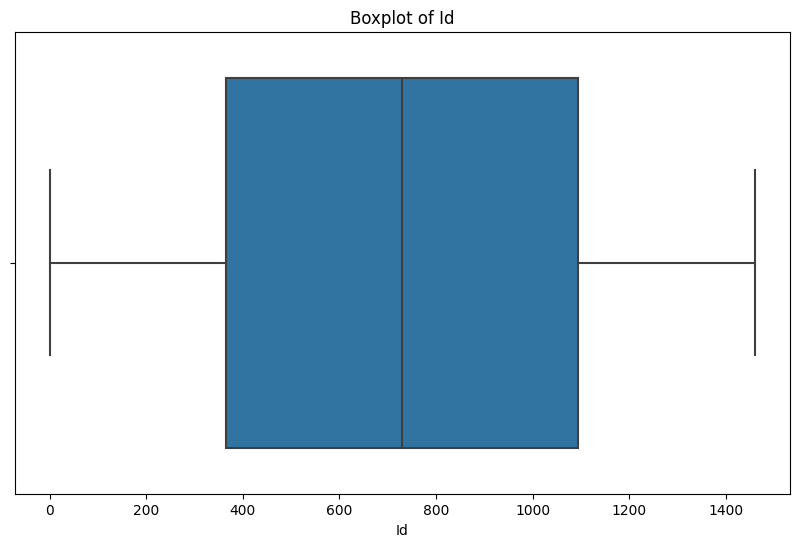

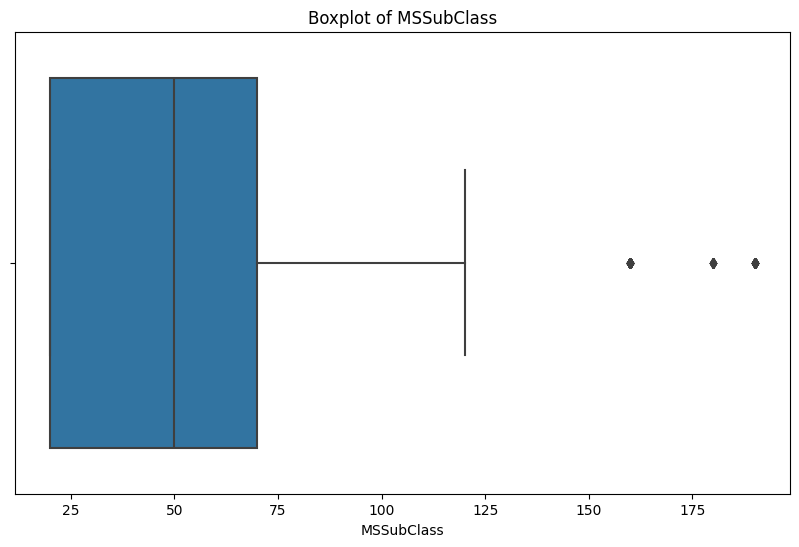

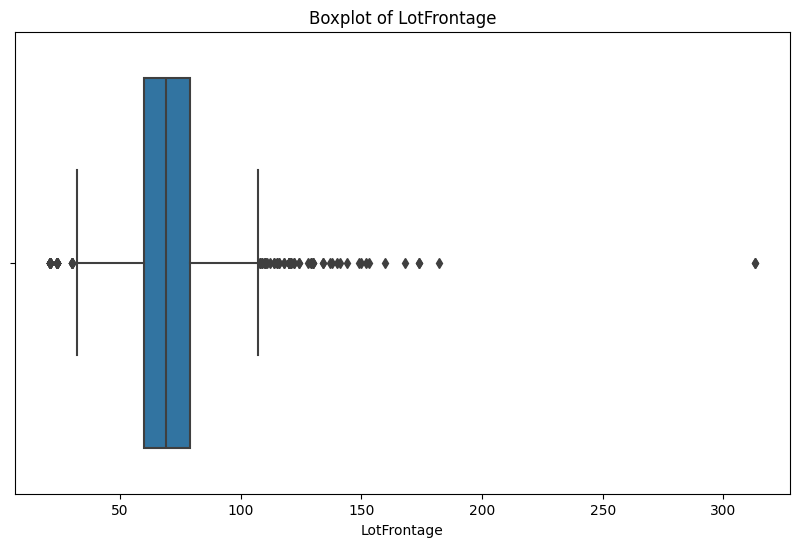

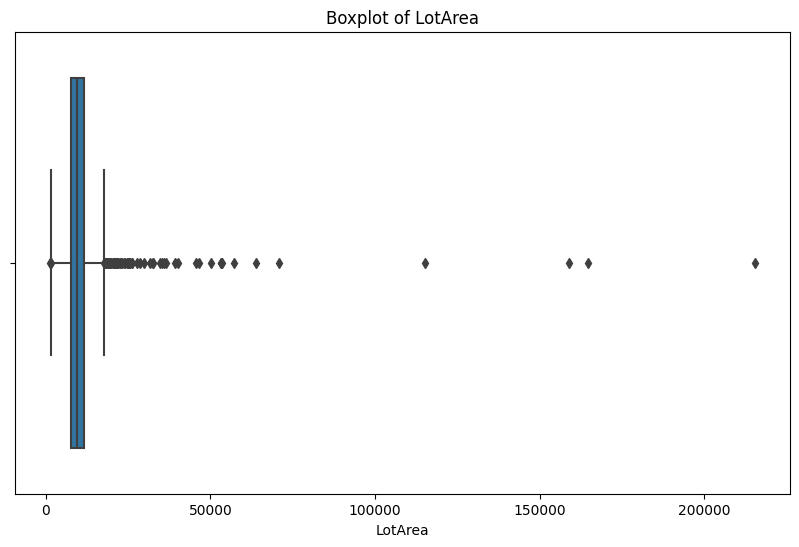

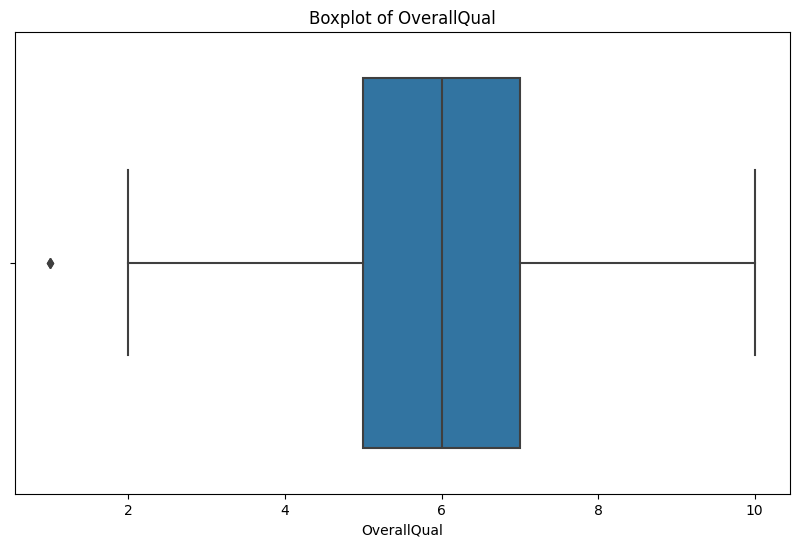

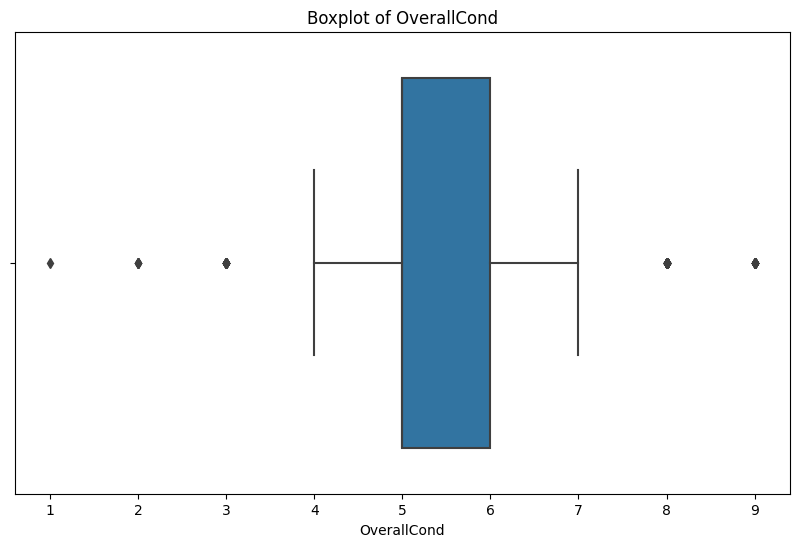

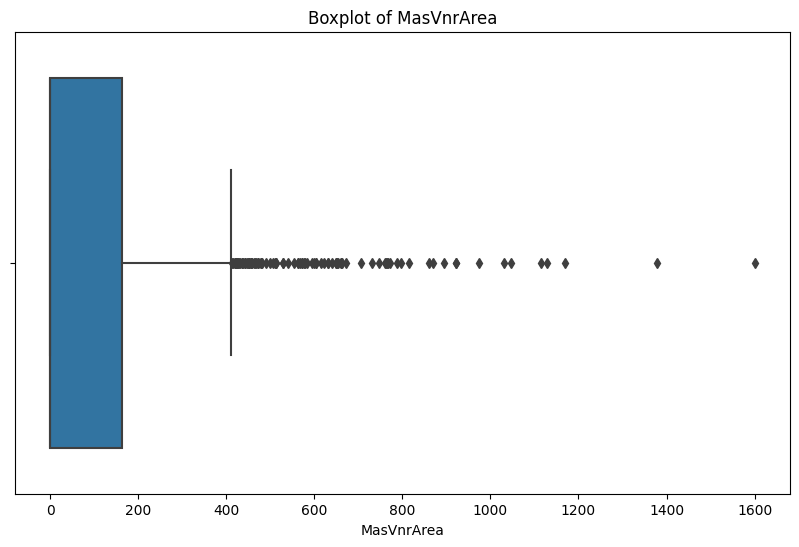

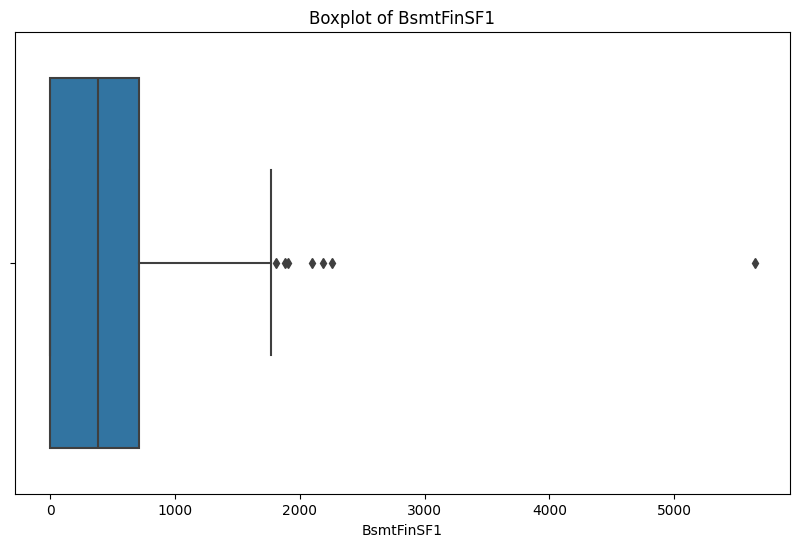

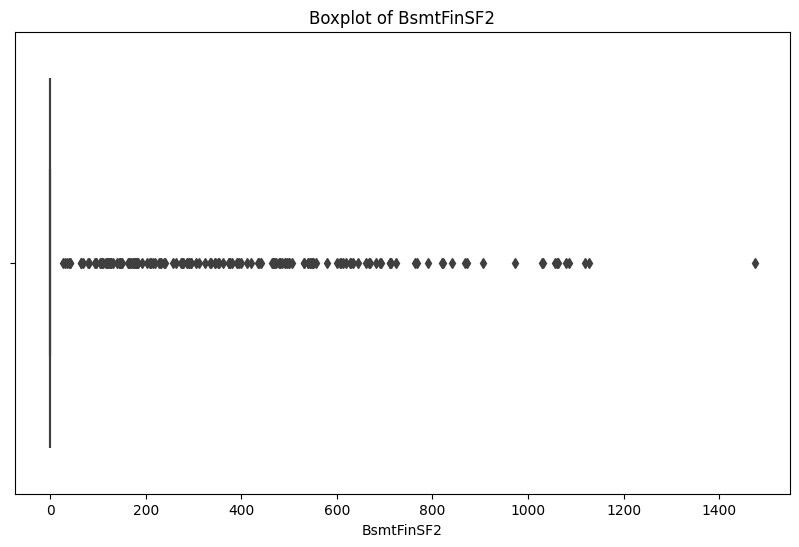

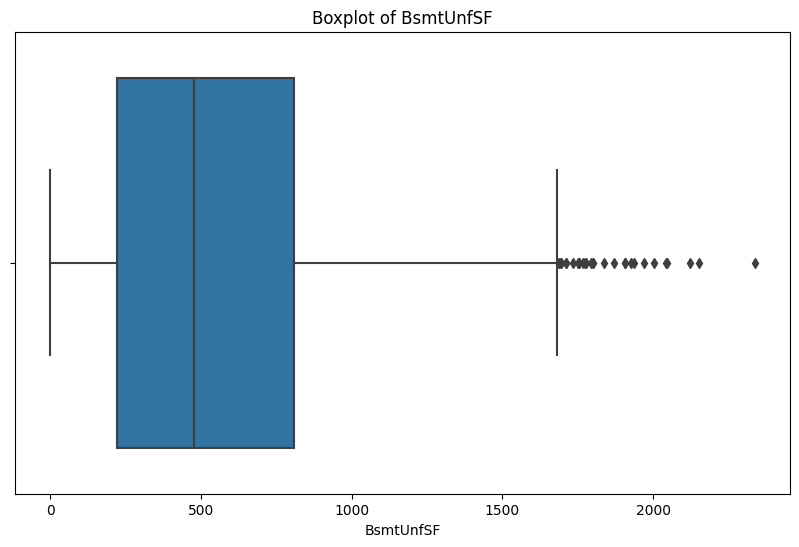

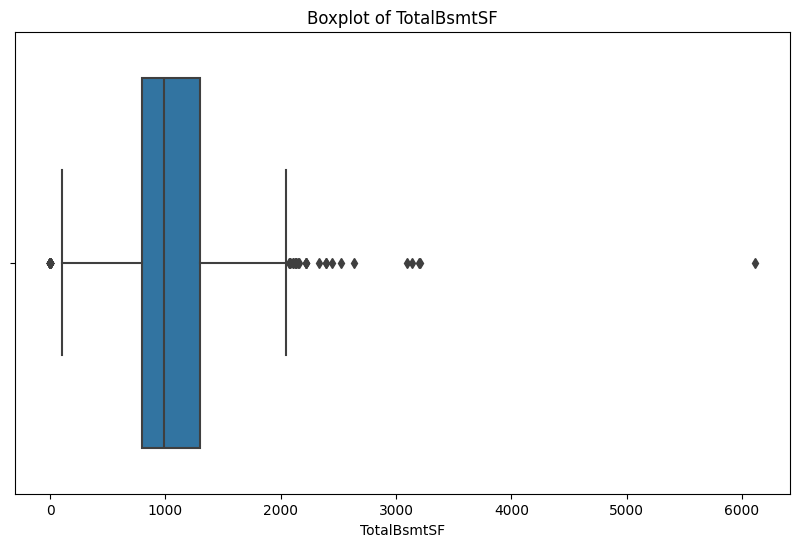

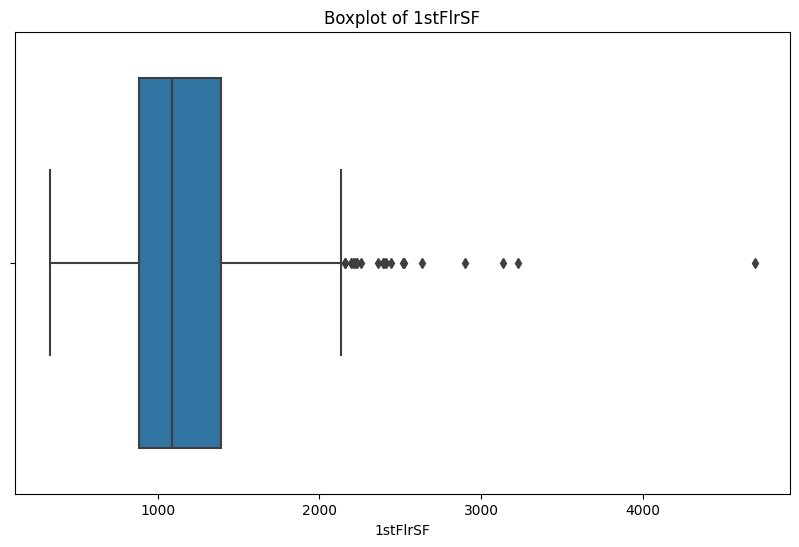

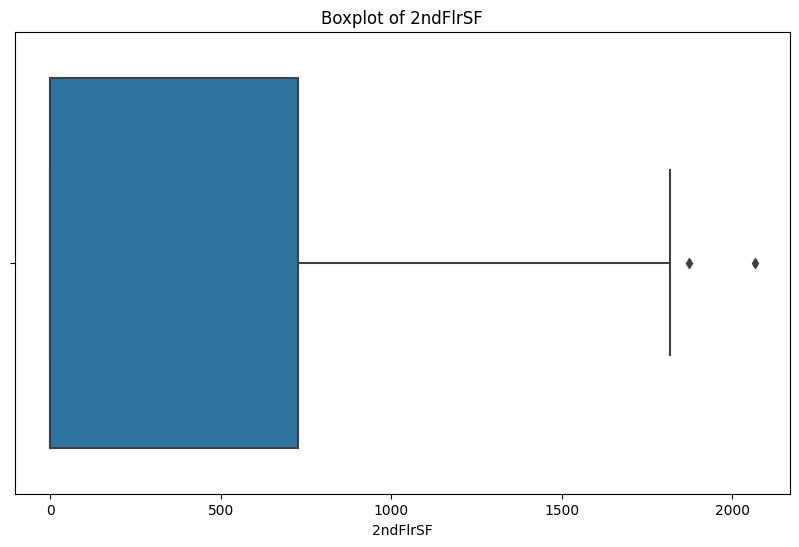

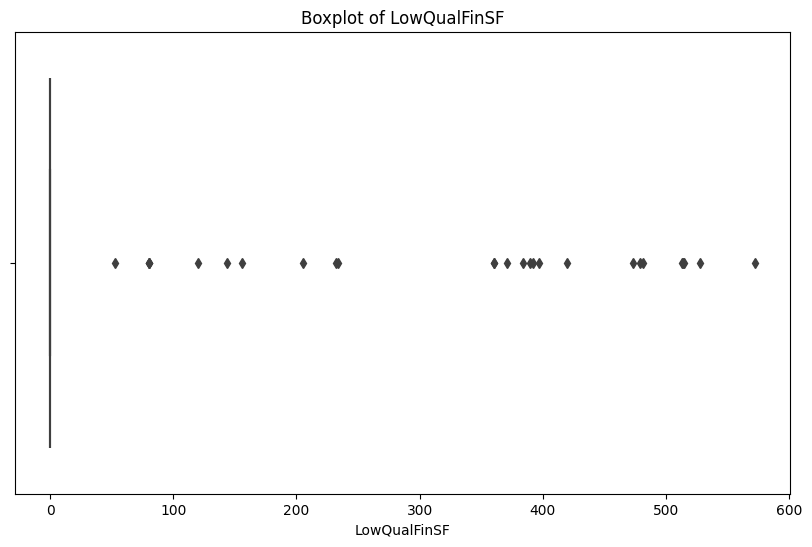

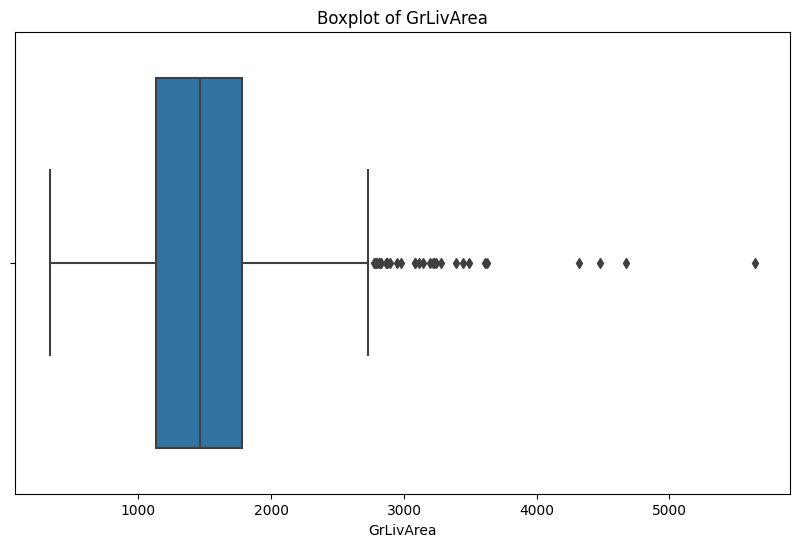

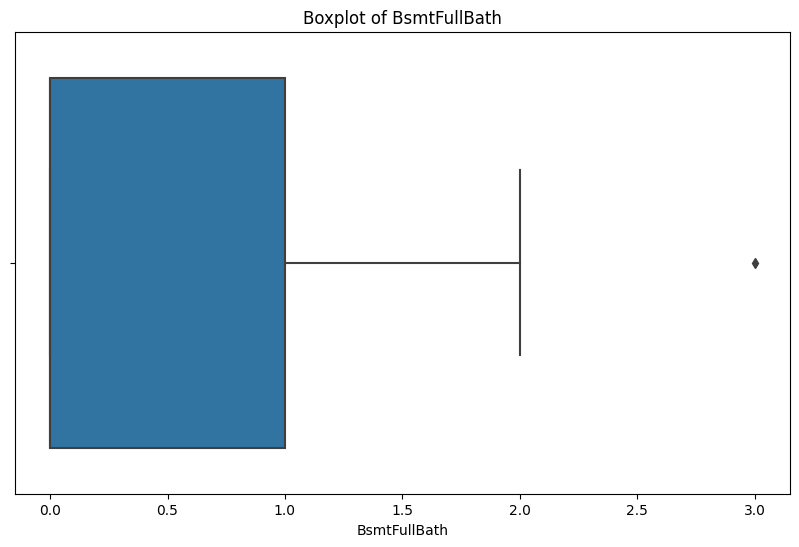

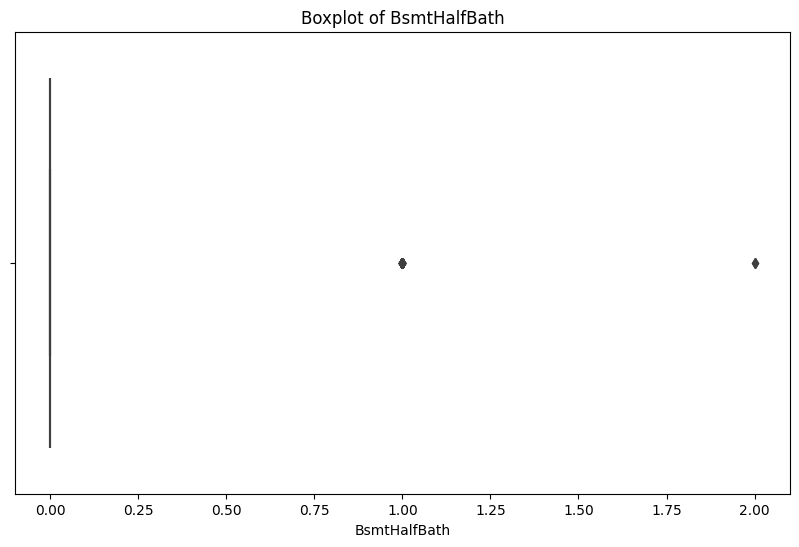

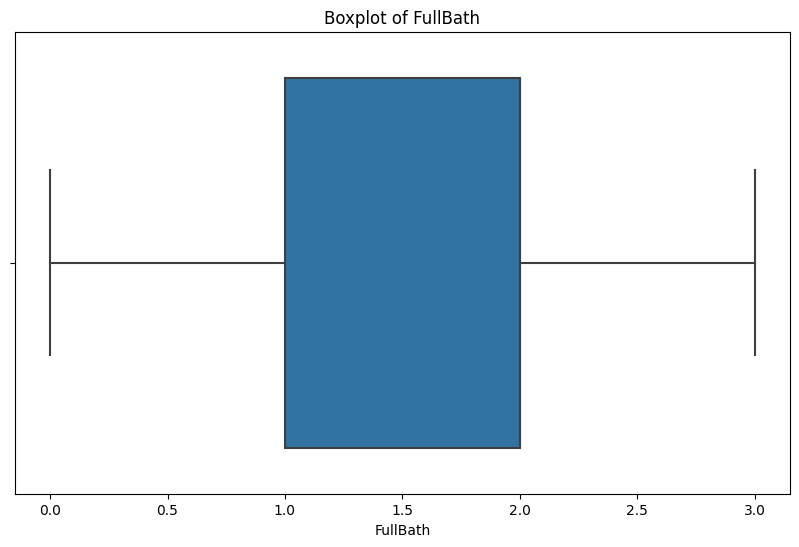

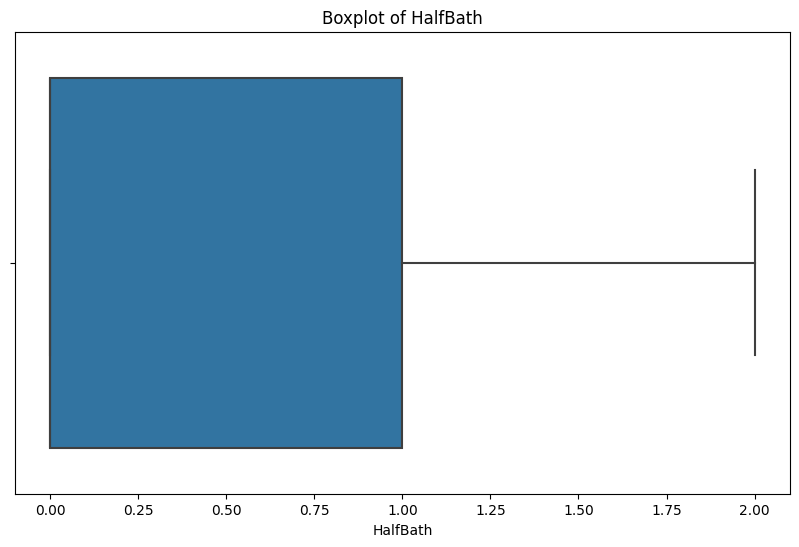

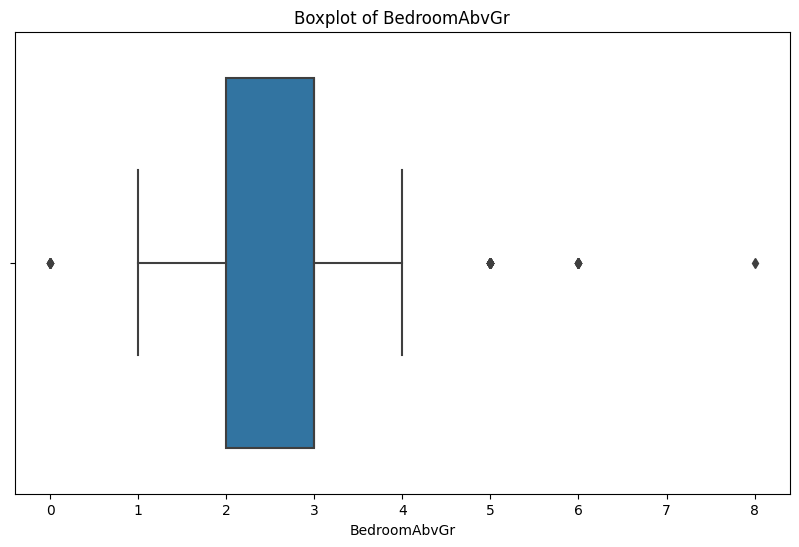

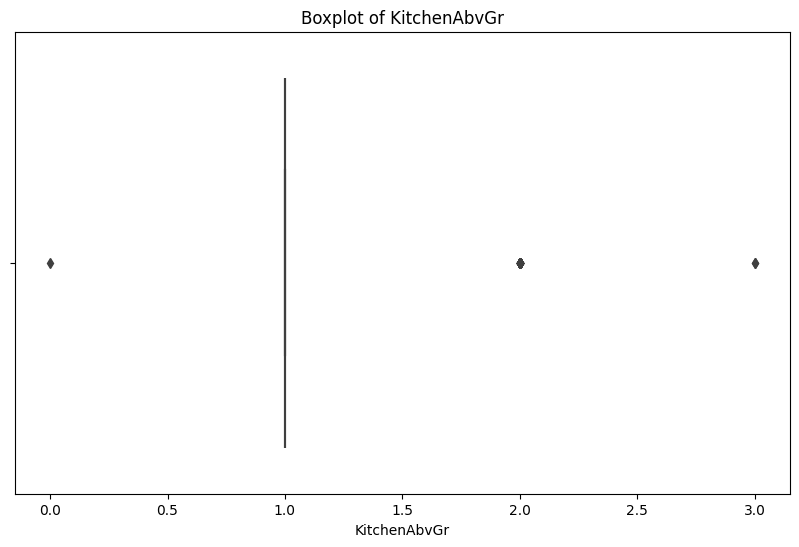

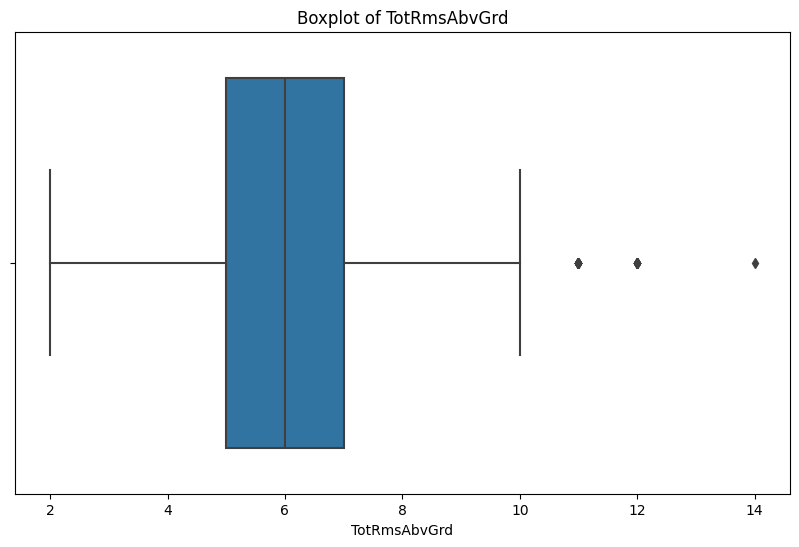

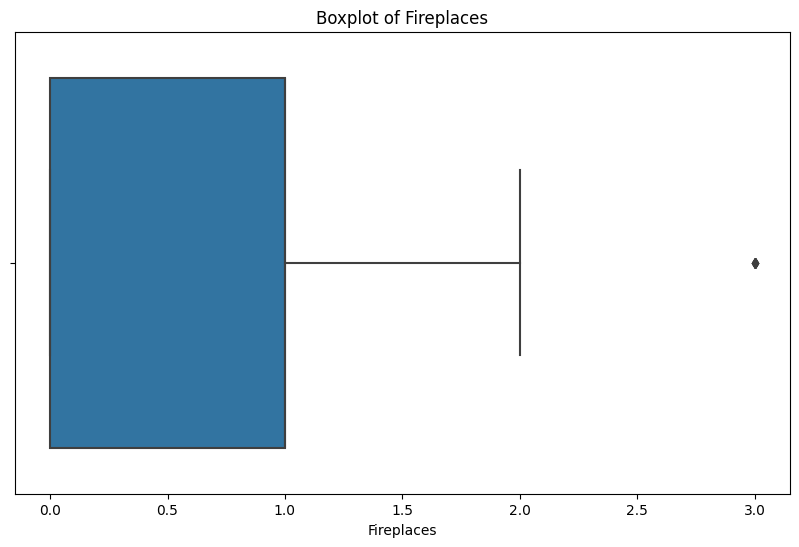

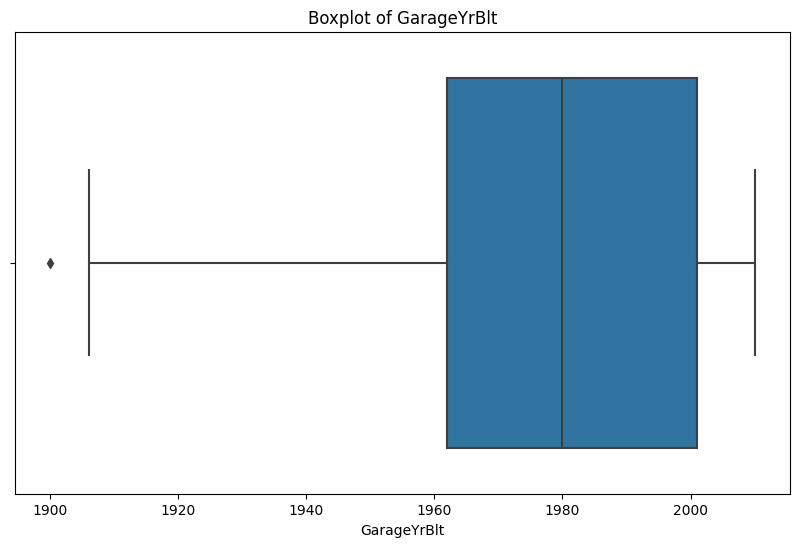

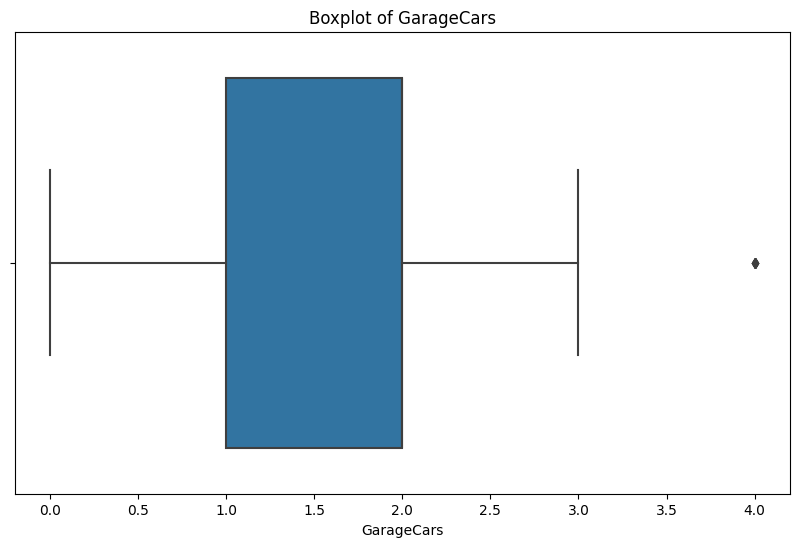

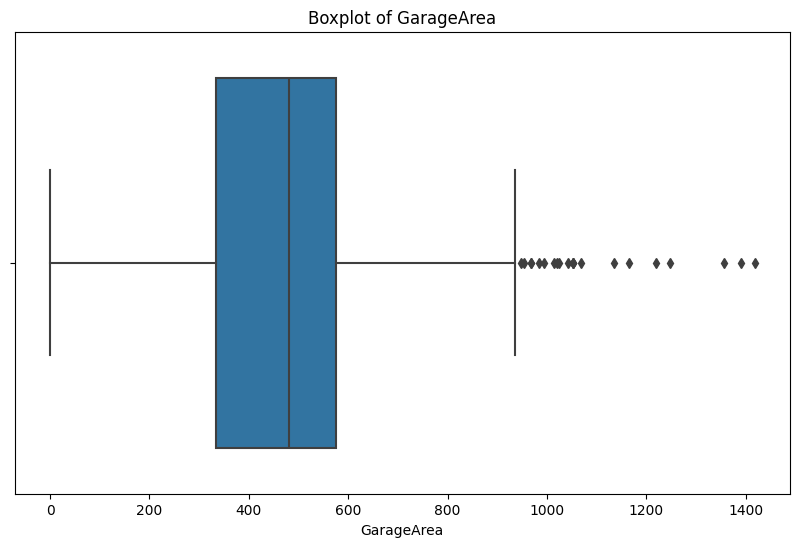

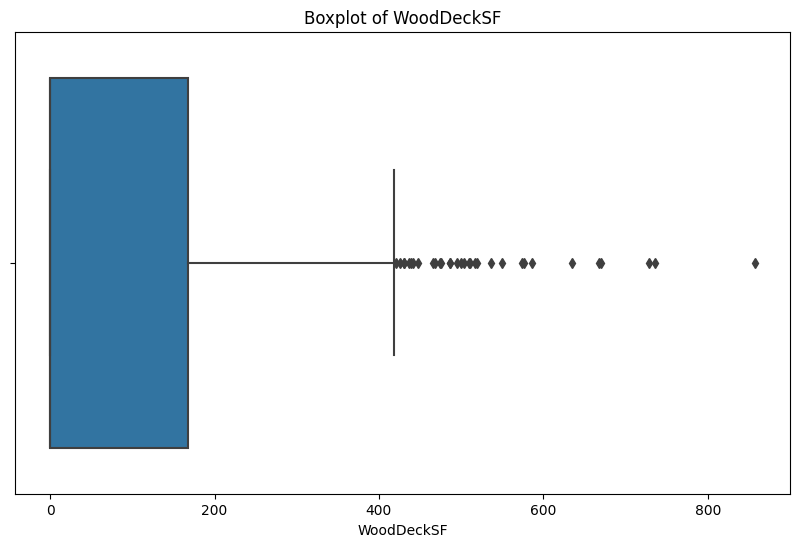

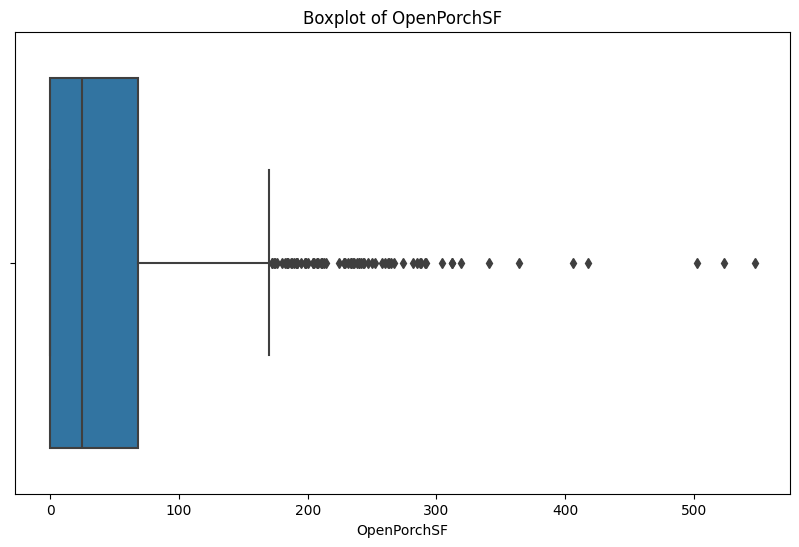

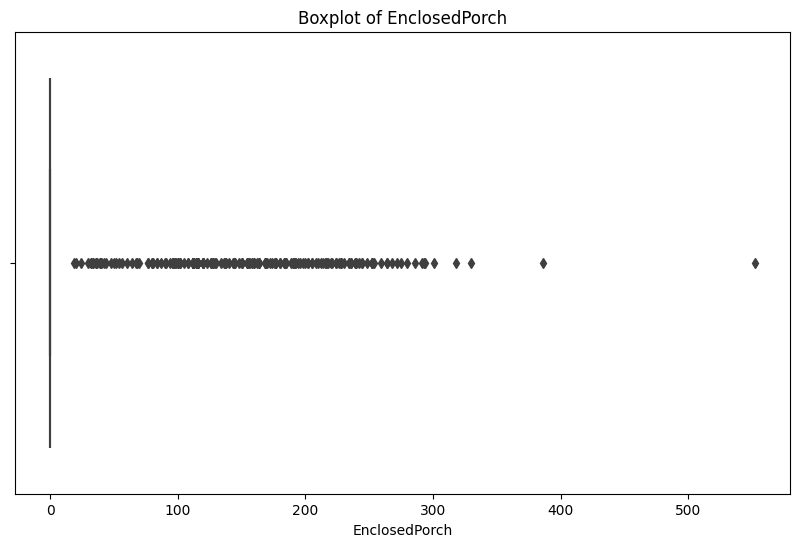

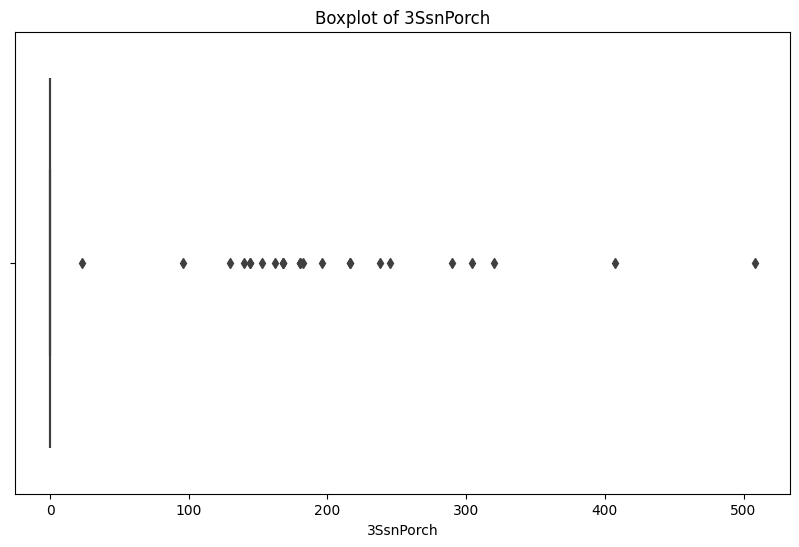

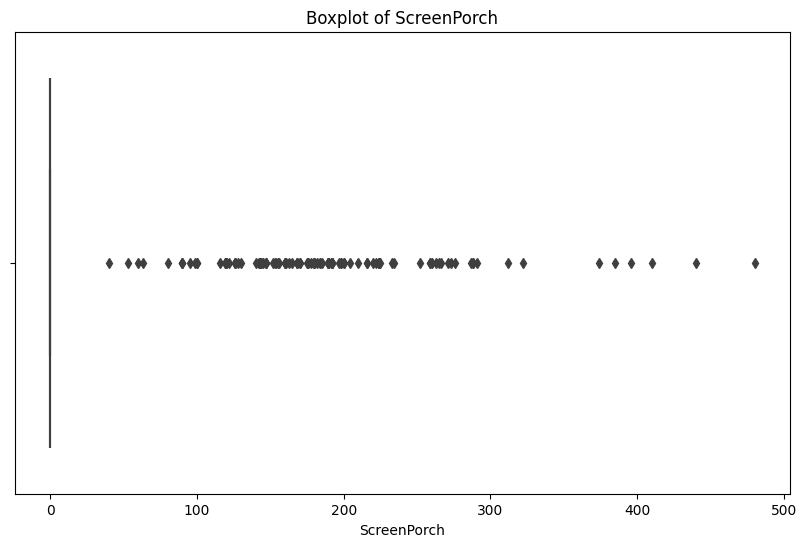

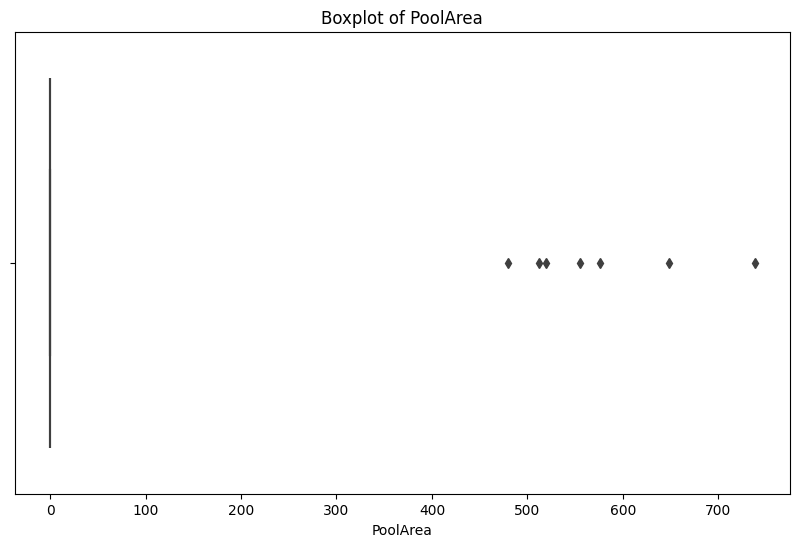

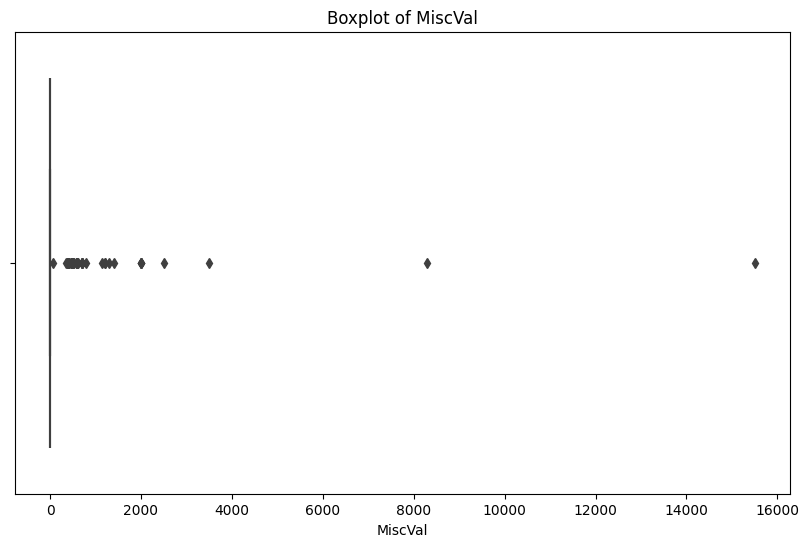

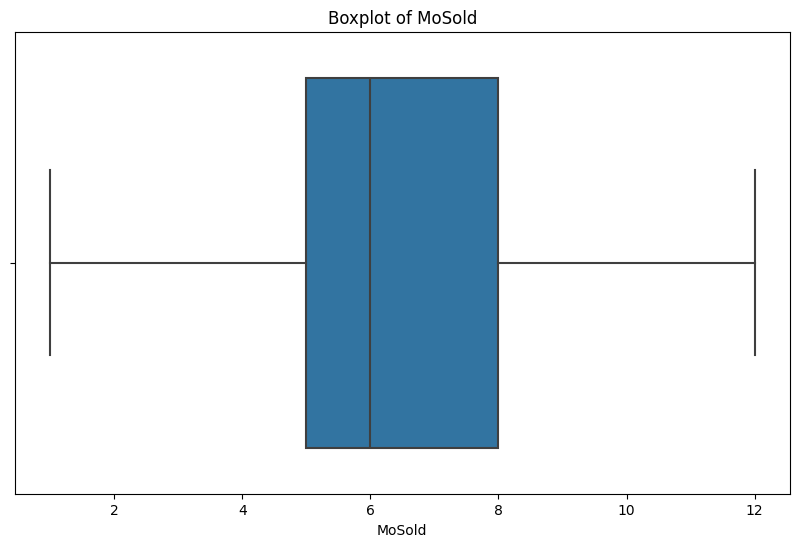

In [14]:
#boxplotting for outlier detection
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

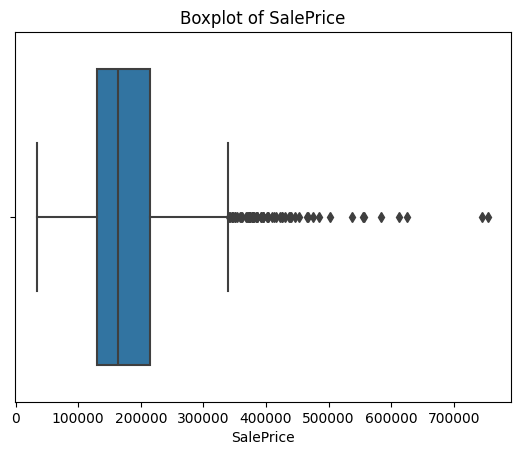

In [15]:
#boxplotting SalePrice as well (target variable)
sns.boxplot(x=train_data['SalePrice'])
plt.title(f'Boxplot of SalePrice')
plt.xlabel("SalePrice")
plt.show()

In [16]:
#removing outliers
##GrLivArea - removing houses with more than 4000 sqft of above ground living area
train_data = train_data[train_data['GrLivArea'] < 4000]
##TotalBsmtSF - removing houses with more than 3000 sqft of total basement sqft
train_data = train_data[train_data['TotalBsmtSF'] < 3000]
##SalePrice was also a potential candidate to remove outliers however due to possible of the presence of high-end properties, it will be retained

Obvious outliers that were identifies in the data fell into the GrLivArea and TotalBsmtSF features. There were a low amount of outliers in these two features but it was important to remove them as these properties prove to be relatively rare in the area and likely are not representative of the overall Ames Iowa housing market. This is also a good way to reduce variance in the data early on in hopes of having a more robust and stable model later on.

### Pairplot Analysis

C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

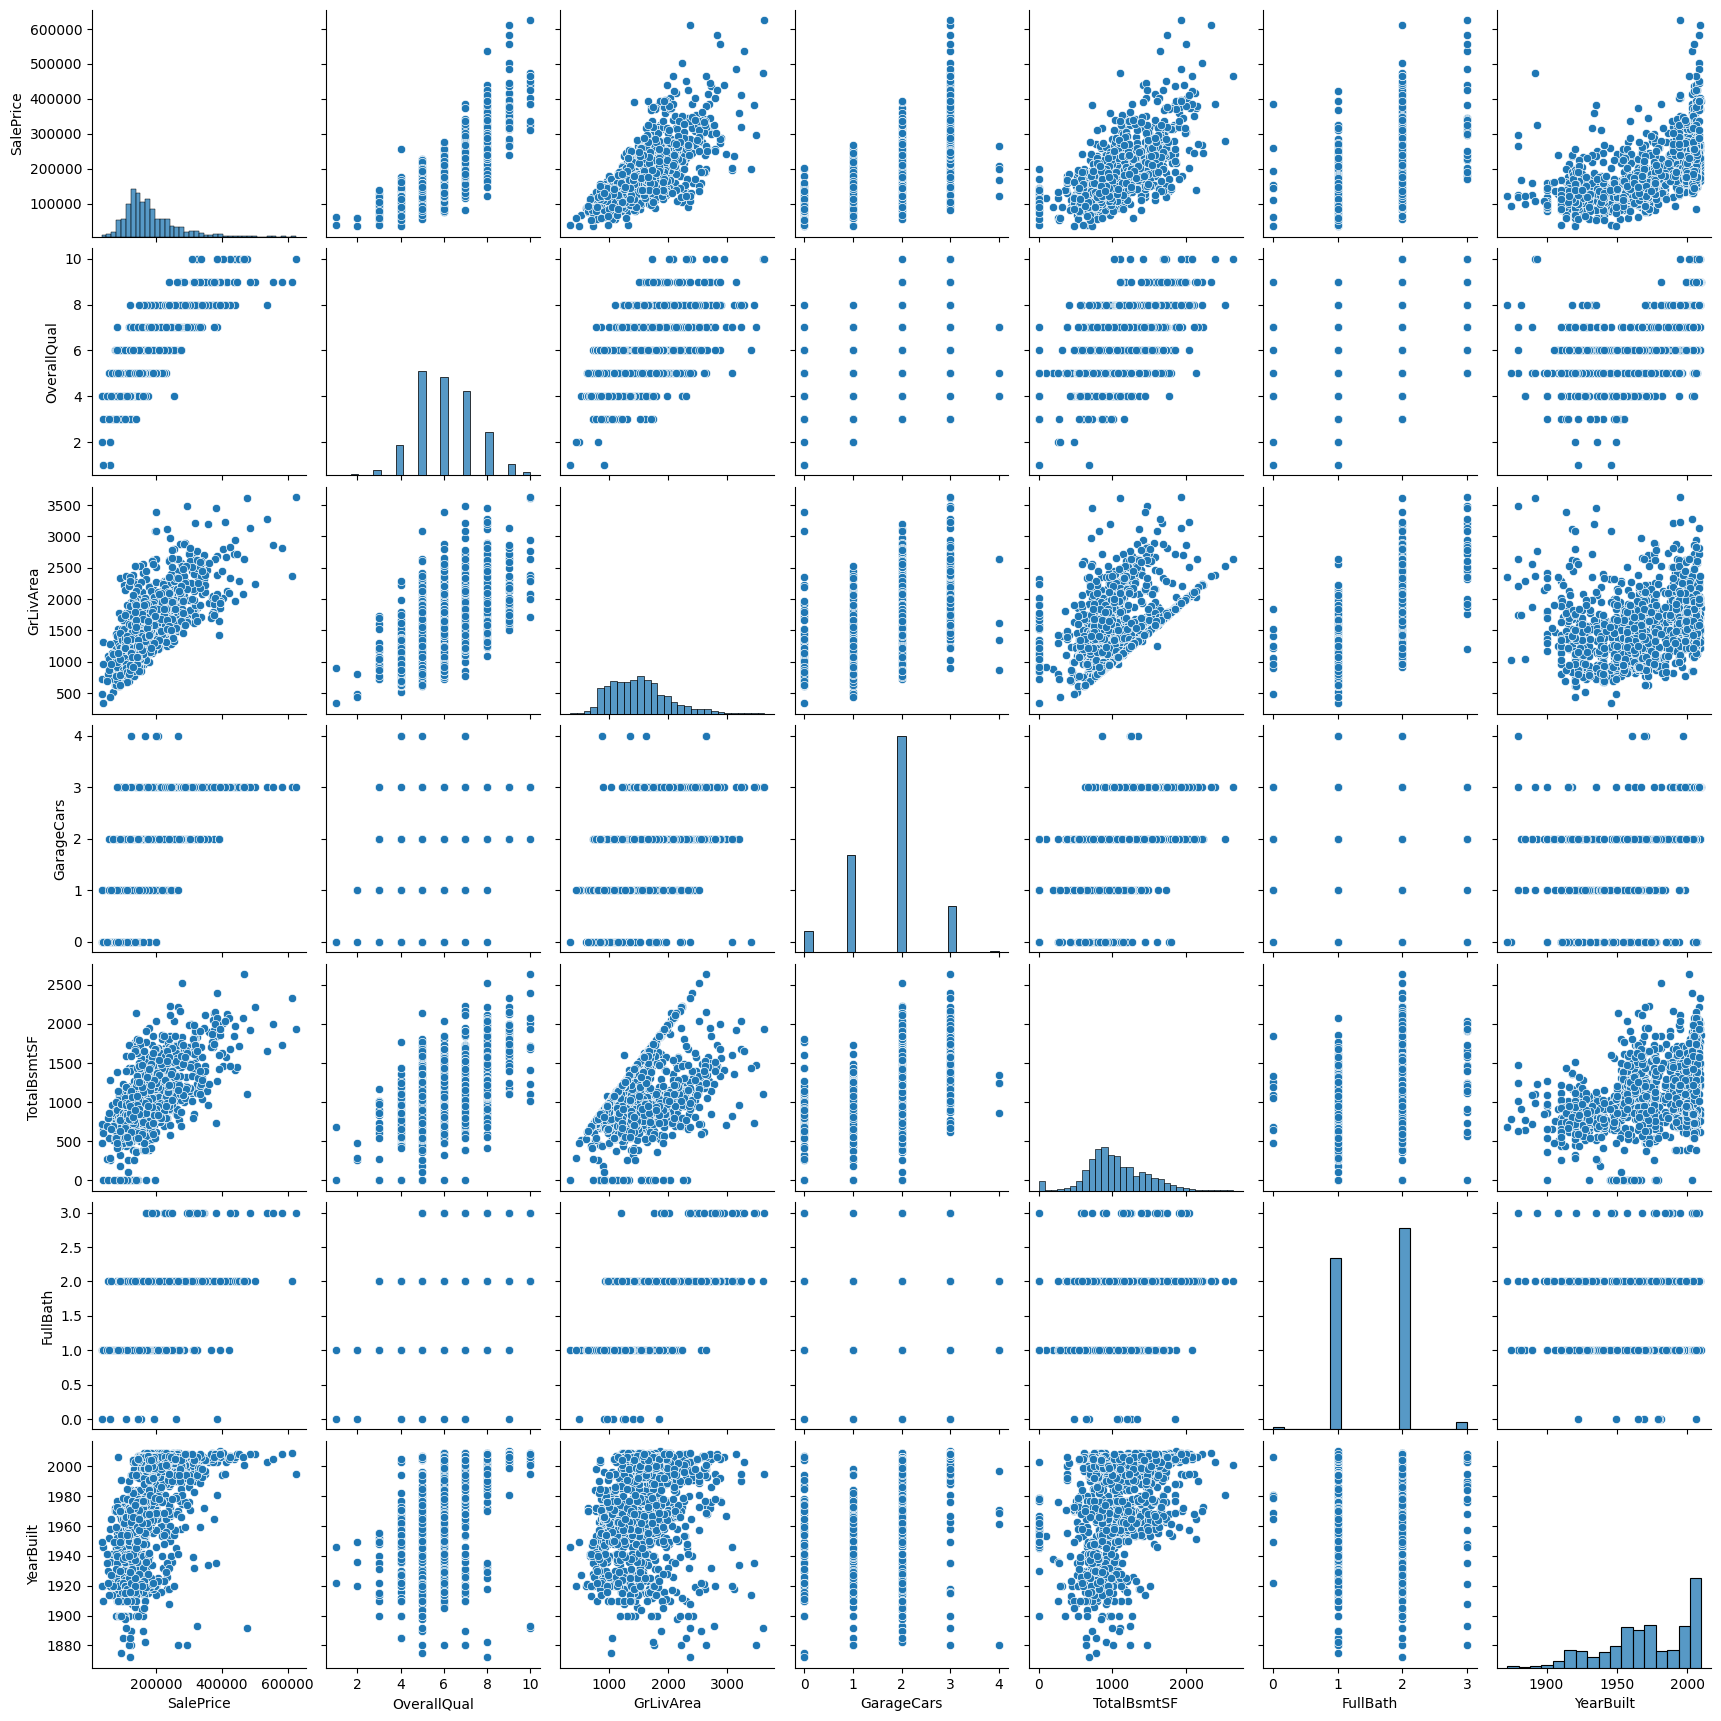

In [17]:
#original important features
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[selected_features])
plt.show()

C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

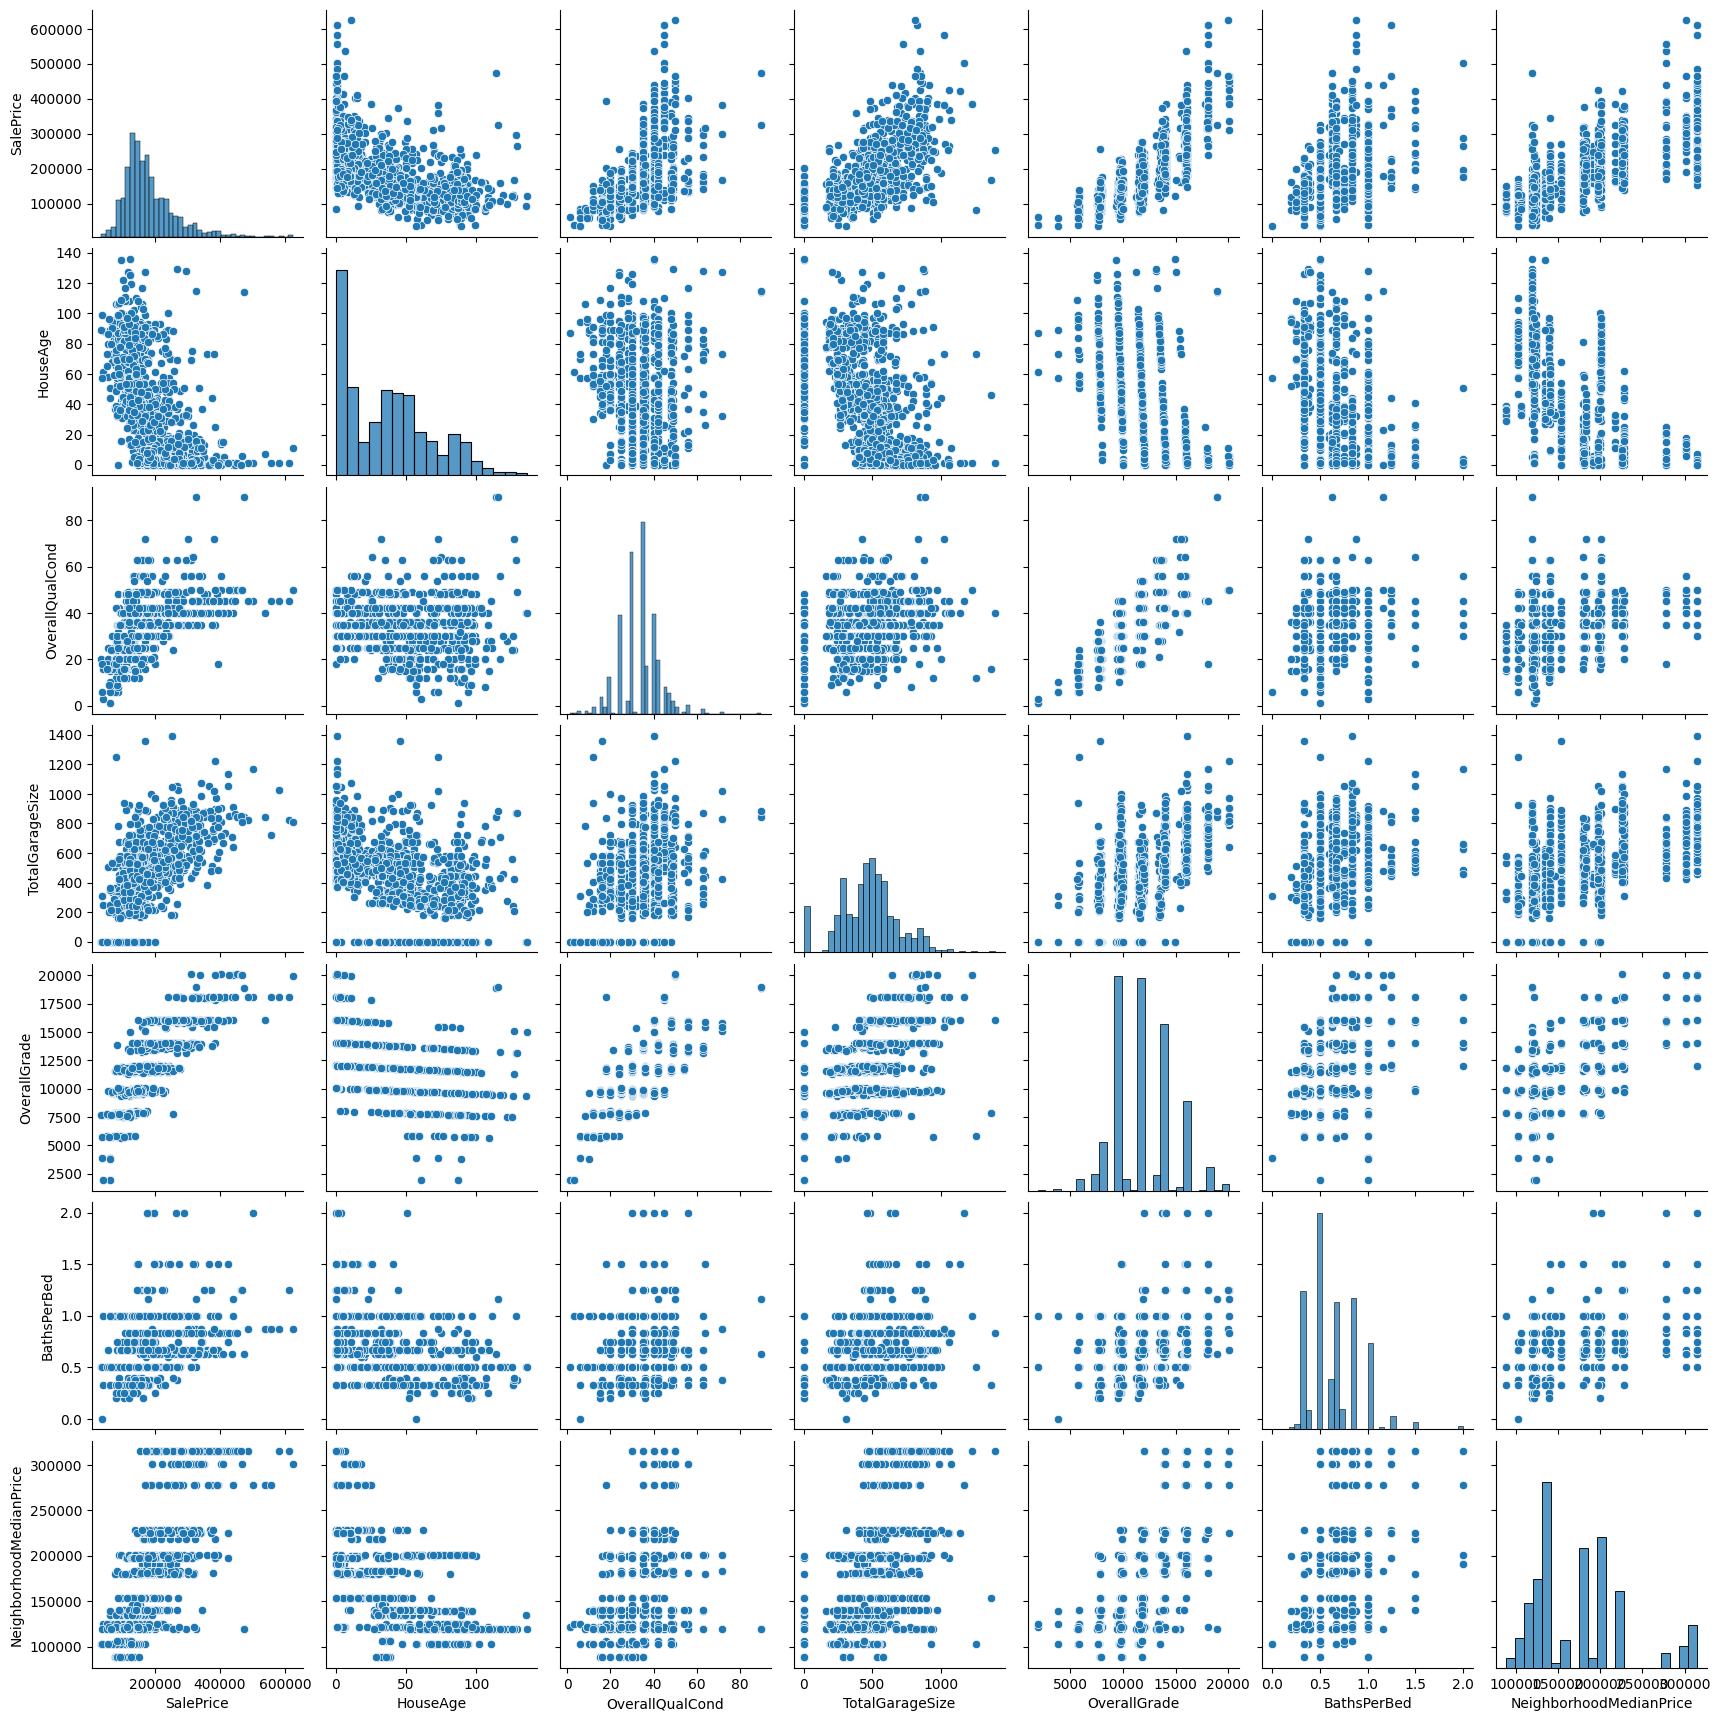

In [18]:
#seemingly important feature engineered features
selected_features = ['SalePrice', 'HouseAge', 'OverallQualCond', 'TotalGarageSize', 'OverallGrade', 'BathsPerBed', 'NeighborhoodMedianPrice']
sns.pairplot(train_data[selected_features])
plt.show()

These pairplot analysis charts are a final way to look at direct relationships between the most important features and the target feature 'SalePrice'. It's with these sort of charts that we can see the example that 'HouseAge' has an overall negative relationship with SalePrice, which checks out with the first group of pairplotted charts where a later YearBuilt value typically correlated with a higher SalePrice. This is why conducting pairplot analysis is useful to confirm that the newly engineered features don't show a surprising difference in relation to our target feature as compared to their original more segregated counterparts.

In [19]:
#save the data
datapath = '../data'
file_name = 'train_data_step3_features.csv'
file_path = os.path.join(datapath, file_name)
train_data.to_csv(file_path, index=False)